In [2]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [3]:
# make plot work
#ENV["GRDIR"]=""
#Pkg.build("GR")

In [4]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete_Adj.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
#phenotypes= dropmissing(phenotypes, :Died)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [4]:
Died_model_equations = "Died_Adj = intercept + Batch + EntryAge + NurPenBatch"
Died_R=1.00000
Died_model=build_model(Died_model_equations,Died_R);

In [5]:
set_covariate(Died_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [6]:
Died_G1=0.277714E-01
set_random(Died_model,"NurPenBatch",Died_G1)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.521784 seconds (37.77 k allocations: 10.393 GiB, 0.10% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [8]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [9]:
Died_G3=0.909307E-01
@time add_genotypes(Died_model,M,Died_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 14.574227 seconds (8.06 M allocations: 15.986 GiB, 1.45% gc time)


4.0f0

In [10]:
@time Died_outB=runMCMC(Died_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi= 0.999, estimatePi=true, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

The folder results is created to save results.
Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
The number of observations with both genotypes and phenotypes used in the analysis is 3181.

The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.000546



A Linear Mixed Model was build using model equations:

Died_Adj = intercept + Batch + EntryAge + NurPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436

MCMC Information:

chain_length                                  50000
burnin                                         5000
starting_value                                 true
printout_frequency                

running MCMC ...100%|███████████████████████████████████| Time: 6:34:52




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


23731.752854 seconds (90.18 G allocations: 1.776 TiB, 1.05% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"  => 1×3 DataFrame…
  "heritability"        => 1×3 DataFrame…
  "location parameters" => 488×5 DataFrame…
  "residual variance"   => 1×3 DataFrame…
  "marker effects geno" => 435172×5 DataFrame…
  "EBV_Died_Adj"        => 3205×3 DataFrame…
  "genetic_variance"    => 1×3 DataFrame…
  "pi_geno"             => 1×3 DataFrame…

In [11]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Died
,Int64,Float64
1,1,0.0785241
2,2,0.0826021
3,3,0.0922568
4,4,0.0812819
5,5,0.0863117
6,6,0.090341
7,7,0.0985591
8,8,0.102101
9,9,0.0952378


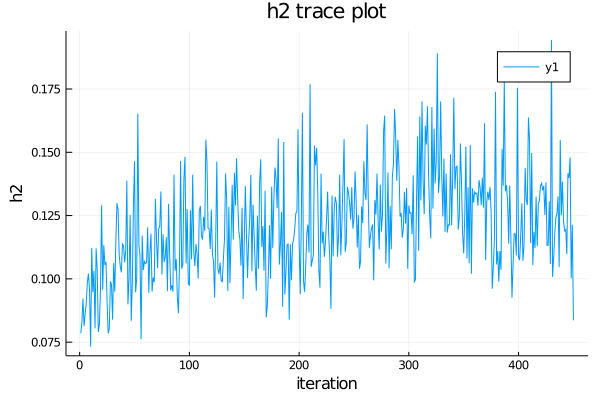

In [12]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [3]:
@time Died_outB,Died_winVarProps = GWAS("results/MCMC_samples_marker_effects_geno_Died_Adj.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:20:57


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 0.000595689    │ 0.000625653 │ 9.86     │ 0.593333   │ 0.593333  │
│ 2    │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 0.000163069    │ 0.000378213 │ 2.47     │ 0.228889   │ 0.411111  │
│ 3    │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 0.000106574    │ 0.000296824 │ 1.73     │ 0.157778   │ 0.326667  │
│ 4    │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 0.000104149    │ 0.000296867 │ 2.02     │ 0.151111   │ 0.282778  │
│ 5    │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 7.87632e-5     │ 0.000257182 │ 1.57     │ 0.122222   │ 0.250667  │
│ 6    │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 7.45333e-5     │ 0.000259087 │ 1.04     │ 0.12       │ 0.228889  │
│ 7    │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 4.90459e-5     │ 0.000203105 │ 0.74     │ 0.106667   │ 0.211429  │
│ 8    │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 3.65282e-5     │ 0.000142117 │ 0.61     │ 0.0933333  │ 0.196667  │
│ 9    │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 4.28131e-5     │ 0.000168475 │ 0.58     │ 0.0911111  │ 0.184938  │
│ 10   │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 7.05582e-5     │ 0.000264292 │ 0.93     │ 0.0911111  │ 0.175556  │
│ 11   │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 4.18546e-5     │ 0.00018184  │ 0.7      │ 0.0844444  │ 0.167273  │
│ 12   │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 2.90288e-5     │ 0.000125894 │ 0.35     │ 0.0822222  │ 0.160185  │
│ 13   │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 3.83633e-5     │ 0.000168902 │ 0.56     │ 0.08       │ 0.154017  │
│ 14   │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 2.47751e-5     │ 0.000114439 │ 0.36     │ 0.0777778  │ 0.148571  │
│ 15   │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 3.19584e-5     │ 0.000147637 │ 0.51     │ 0.0755556  │ 0.143704  │
│ 16   │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 2.38017e-5     │ 0.000110184 │ 0.43     │ 0.0755556  │ 0.139444  │
│ 17   │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 2.1886e-5      │ 0.000100232 │ 0.29     │ 0.0733333  │ 0.135556  │
│ 18   │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 3.42798e-5     │ 0.000165541 │ 0.57     │ 0.0711111  │ 0.131975  │
│ 19   │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 2.46644e-5     │ 0.000114364 │ 0.35     │ 0.0688889  │ 0.128655  │
│ 20   │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 3.56793e-5     │ 0.000164412 │ 0.68     │ 0.0688889  │ 0.125667  │
│ 21   │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 2.93446e-5     │ 0.000137816 │ 0.4      │ 0.0666667  │ 0.122857  │
│ 22   │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 2.51923e-5     │ 0.000126719 │ 0.31     │ 0.0622222  │ 0.120101  │
│ 23   │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.82016e-5     │ 0.000110184 │ 0.26     │ 0.0622222  │ 0.117585  │
│ 24   │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 2.76749e-5     │ 0.00013574  │ 0.39     │ 0.0622222  │ 0.115278  │
│ 25   │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 2.52808e-5     │ 0.000125009 │ 0.42     │ 0.0622222  │ 0.113156  │
│ 26   │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 2.2571e-5      │ 0.000112867 │ 0.34     │ 0.0622222  │ 0.111197  │
│ 27   │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.63873e-5     │ 9.06558e-5  │ 0.21     │ 0.0622222  │ 0.109383  │
│ 28   │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 2.50013e-5     │ 0.000142661 │ 0.36     │ 0.0622222  │ 0.107698  │
│ 29   │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 2.67439e-5     │ 0.000125908 │ 0.46     │ 0.06       │ 0.106054  │
│ 30   │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.8161e-5      │ 9.1535e-5   │ 0.37     │ 0.06       │ 0.104519  │
│ 31   │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 1.2914e-5      │ 7.92307e-5  │ 0.23     │ 0.0577778  │ 0.103011  │
│ 32   │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 3.57631e-5     │ 0.000185056 │ 0.63     │ 0.0555556  │ 0.101528  │
│ 33   │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 2.27498e-5     │ 0.000121783 │ 0.39     │ 0.0555556  │ 0.100135  │
│ 34   │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 3.8526e-5      │ 0.000203063 │ 0.61     │ 0.0555556  │ 0.0988235 │
│ 35   │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 2.00395e-5     │ 0.000107049 │ 0.41     │ 0.0555556  │ 0.0975873 │
│ 36   │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 2.02776e-5     │ 0.000107474 │ 0.26     │ 0.0555556  │ 0.0964198 │
│ 37   │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 1.34223e-5     │ 7.50729e-5  │ 0.17     │ 0.0533333  │ 0.0952553 │
│ 38   │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 1.70328e-5     │ 9.58625e-5  │ 0.24     │ 0.0511111  │ 0.0940936 │
│ 39   │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.62167e-5     │ 9.65386e-5  │ 0.25     │ 0.0511111  │ 0.0929915 │
│ 40   │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 1.75074e-5     │ 9.2652e-5   │ 0.29     │ 0.0511111  │ 0.0919444 │
│ 41   │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 1.22796e-5     │ 7.25627e-5  │ 0.21     │ 0.0511111  │ 0.0909485 │
│ 42   │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 1.59021e-5     │ 8.54432e-5  │ 0.25     │ 0.0511111  │ 0.09      │
│ 43   │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.391e-5       │ 7.91408e-5  │ 0.21     │ 0.0488889  │ 0.0890439 │
│ 44   │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 1.15562e-5     │ 7.08663e-5  │ 0.23     │ 0.0466667  │ 0.0880808 │
│ 45   │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 1.0365e-5      │ 6.74755e-5  │ 0.15     │ 0.0466667  │ 0.0871605 │
│ 46   │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 1.77895e-5     │ 9.50702e-5  │ 0.31     │ 0.0466667  │ 0.0862802 │
│ 47   │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.25582e-5     │ 8.03376e-5  │ 0.21     │ 0.0466667  │ 0.0854374 │
│ 48   │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.6297e-5      │ 9.30532e-5  │ 0.26     │ 0.0466667  │ 0.0846296 │
│ 49   │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 9.98451e-6     │ 6.07567e-5  │ 0.14     │ 0.0466667  │ 0.0838549 │
│ 50   │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 1.63582e-5     │ 0.000102013 │ 0.23     │ 0.0466667  │ 0.0831111 │
│ 51   │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 7.98582e-6     │ 4.93968e-5  │ 0.1      │ 0.0444444  │ 0.0823529 │
│ 52   │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.73981e-5     │ 9.86556e-5  │ 0.22     │ 0.0444444  │ 0.0816239 │
│ 53   │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.32041e-5     │ 8.52507e-5  │ 0.22     │ 0.0444444  │ 0.0809224 │
│ 54   │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.70762e-5     │ 9.94864e-5  │ 0.28     │ 0.0444444  │ 0.0802469 │
│ 55   │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 8.81406e-6     │ 5.72092e-5  │ 0.11     │ 0.0422222  │ 0.0795556 │
│ 56   │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 1.12281e-5     │ 7.28098e-5  │ 0.15     │ 0.0422222  │ 0.0788889 │
│ 57   │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 9.51746e-6     │ 6.43891e-5  │ 0.16     │ 0.0422222  │ 0.0782456 │
│ 58   │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 8.95824e-6     │ 6.62429e-5  │ 0.12     │ 0.0422222  │ 0.0776245 │
│ 59   │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 2.05364e-5     │ 0.000146788 │ 0.28     │ 0.0422222  │ 0.0770245 │
│ 60   │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 5.03188e-6     │ 3.10142e-5  │ 0.09     │ 0.0422222  │ 0.0764444 │
│ 61   │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 1.41922e-5     │ 8.23741e-5  │ 0.23     │ 0.0422222  │ 0.0758834 │
│ 62   │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.89622e-5     │ 0.000114321 │ 0.25     │ 0.0422222  │ 0.0753405 │
│ 63   │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 1.56135e-5     │ 0.00010137  │ 0.24     │ 0.0422222  │ 0.0748148 │
│ 64   │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 5.55395e-6     │ 3.59835e-5  │ 0.12     │ 0.04       │ 0.0742708 │
│ 65   │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 1.59233e-5     │ 9.3006e-5   │ 0.22     │ 0.04       │ 0.0737436 │
│ 66   │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.13128e-5     │ 6.67481e-5  │ 0.15     │ 0.04       │ 0.0732323 │
│ 67   │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.29488e-5     │ 8.25269e-5  │ 0.21     │ 0.0377778  │ 0.0727032 │
│ 68   │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 7.96872e-6     │ 5.50645e-5  │ 0.1      │ 0.0377778  │ 0.0721895 │
│ 69   │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 8.74807e-6     │ 5.51954e-5  │ 0.11     │ 0.0377778  │ 0.0716908 │
│ 70   │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 8.95477e-6     │ 5.91171e-5  │ 0.1      │ 0.0377778  │ 0.0712063 │
│ 71   │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 5.78824e-6     │ 4.28721e-5  │ 0.06     │ 0.0377778  │ 0.0707355 │
│ 72   │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 6.71133e-6     │ 4.95486e-5  │ 0.11     │ 0.0377778  │ 0.0702778 │
│ 73   │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.437e-5       │ 9.57415e-5  │ 0.28     │ 0.0377778  │ 0.0698326 │
│ 74   │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 8.75798e-6     │ 5.84342e-5  │ 0.15     │ 0.0377778  │ 0.0693994 │
│ 75   │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 6.6035e-6      │ 4.48802e-5  │ 0.11     │ 0.0377778  │ 0.0689778 │
│ 76   │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 8.7416e-6      │ 6.78504e-5  │ 0.17     │ 0.0377778  │ 0.0685673 │
│ 77   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 7.12953e-6     │ 4.90281e-5  │ 0.11     │ 0.0377778  │ 0.0681674 │
│ 78   │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 1.14247e-5     │ 7.90697e-5  │ 0.14     │ 0.0377778  │ 0.0677778 │
│ 79   │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.32971e-5     │ 8.15475e-5  │ 0.2      │ 0.0377778  │ 0.067398  │
│ 80   │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.44477e-5     │ 9.14041e-5  │ 0.3      │ 0.0377778  │ 0.0670278 │
│ 81   │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 1.56497e-5     │ 0.000104737 │ 0.28     │ 0.0377778  │ 0.0666667 │
│ 82   │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.53294e-5     │ 0.000102185 │ 0.27     │ 0.0377778  │ 0.0663144 │
│ 83   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 1.29614e-5     │ 8.19454e-5  │ 0.2      │ 0.0355556  │ 0.0659438 │
│ 84   │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 3.74787e-6     │ 2.65443e-5  │ 0.06     │ 0.0355556  │ 0.065582  │
│ 85   │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 7.37219e-6     │ 4.61774e-5  │ 0.12     │ 0.0355556  │ 0.0652288 │
│ 86   │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.40006e-5     │ 0.000106494 │ 0.22     │ 0.0355556  │ 0.0648837 │
│ 87   │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 6.89838e-6     │ 4.6654e-5   │ 0.14     │ 0.0355556  │ 0.0645466 │
│ 88   │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 8.15851e-6     │ 5.51173e-5  │ 0.1      │ 0.0355556  │ 0.0642172 │
│ 89   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 6.80062e-6     │ 4.25085e-5  │ 0.13     │ 0.0355556  │ 0.0638951 │
│ 90   │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 9.37625e-6     │ 6.42375e-5  │ 0.19     │ 0.0355556  │ 0.0635802 │
│ 91   │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 9.74569e-6     │ 6.69702e-5  │ 0.14     │ 0.0355556  │ 0.0632723 │
│ 92   │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 4.20531e-6     │ 2.99898e-5  │ 0.07     │ 0.0355556  │ 0.062971  │
│ 93   │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 4.59494e-6     │ 3.45315e-5  │ 0.07     │ 0.0333333  │ 0.0626523 │
│ 94   │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 9.44354e-6     │ 6.83897e-5  │ 0.1      │ 0.0333333  │ 0.0623404 │
│ 95   │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 7.04657e-6     │ 5.24806e-5  │ 0.1      │ 0.0333333  │ 0.0620351 │
│ 96   │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 8.22259e-6     │ 6.83268e-5  │ 0.08     │ 0.0333333  │ 0.0617361 │
│ 97   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 9.25499e-6     │ 6.69479e-5  │ 0.23     │ 0.0333333  │ 0.0614433 │
│ 98   │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 9.05359e-6     │ 7.06971e-5  │ 0.11     │ 0.0333333  │ 0.0611565 │
│ 99   │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 7.36994e-6     │ 6.06182e-5  │ 0.11     │ 0.0333333  │ 0.0608754 │
│ 100  │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 5.34962e-6     │ 3.68438e-5  │ 0.1      │ 0.0333333  │ 0.0606    │
│ 101  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.03212e-5     │ 7.44669e-5  │ 0.14     │ 0.0333333  │ 0.06033   │
│ 102  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 9.10491e-6     │ 6.69004e-5  │ 0.11     │ 0.0333333  │ 0.0600654 │
│ 103  │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 8.56759e-6     │ 7.05667e-5  │ 0.14     │ 0.0333333  │ 0.0598058 │
│ 104  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 8.13574e-6     │ 5.56137e-5  │ 0.12     │ 0.0333333  │ 0.0595513 │
│ 105  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 7.5264e-6      │ 5.30355e-5  │ 0.12     │ 0.0333333  │ 0.0593016 │
│ 106  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 1.04323e-5     │ 7.84079e-5  │ 0.14     │ 0.0333333  │ 0.0590566 │
│ 107  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 1.45303e-5     │ 9.96116e-5  │ 0.23     │ 0.0333333  │ 0.0588162 │
│ 108  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 3.80501e-6     │ 2.94451e-5  │ 0.11     │ 0.0311111  │ 0.0585597 │
│ 109  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.05074e-5     │ 7.42817e-5  │ 0.16     │ 0.0311111  │ 0.0583078 │
│ 110  │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 8.88114e-6     │ 7.12311e-5  │ 0.15     │ 0.0311111  │ 0.0580606 │
│ 111  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.10705e-5     │ 8.0425e-5   │ 0.17     │ 0.0311111  │ 0.0578178 │
│ 112  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 9.86807e-6     │ 7.23508e-5  │ 0.1      │ 0.0311111  │ 0.0575794 │
│ 113  │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 1.02351e-5     │ 7.14334e-5  │ 0.16     │ 0.0311111  │ 0.0573451 │
│ 114  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 8.93735e-6     │ 8.04659e-5  │ 0.13     │ 0.0311111  │ 0.057115  │
│ 115  │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 8.21075e-6     │ 6.10002e-5  │ 0.11     │ 0.0311111  │ 0.0568889 │
│ 116  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 4.88401e-6     │ 3.61515e-5  │ 0.06     │ 0.0311111  │ 0.0566667 │
│ 117  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 1.22202e-5     │ 0.000100632 │ 0.17     │ 0.0311111  │ 0.0564482 │
│ 118  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 4.90607e-6     │ 4.21926e-5  │ 0.06     │ 0.0311111  │ 0.0562335 │
│ 119  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 5.25287e-6     │ 4.27797e-5  │ 0.06     │ 0.0311111  │ 0.0560224 │
│ 120  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 9.01996e-6     │ 7.35234e-5  │ 0.13     │ 0.0311111  │ 0.0558148 │
│ 121  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 5.30379e-6     │ 3.97844e-5  │ 0.08     │ 0.0288889  │ 0.0555923 │
│ 122  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 2.89027e-6     │ 2.53714e-5  │ 0.04     │ 0.0288889  │ 0.0553734 │
│ 123  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 2.44979e-6     │ 1.81829e-5  │ 0.06     │ 0.0288889  │ 0.0551581 │
│ 124  │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 8.52274e-6     │ 6.43779e-5  │ 0.1      │ 0.0288889  │ 0.0549462 │
│ 125  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 2.63346e-6     │ 2.12527e-5  │ 0.04     │ 0.0288889  │ 0.0547378 │
│ 126  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 4.25789e-6     │ 2.97571e-5  │ 0.06     │ 0.0288889  │ 0.0545326 │
│ 127  │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 8.56149e-6     │ 6.53674e-5  │ 0.13     │ 0.0288889  │ 0.0543307 │
│ 128  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.0142e-5      │ 8.93081e-5  │ 0.2      │ 0.0288889  │ 0.0541319 │
│ 129  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 7.28822e-6     │ 5.69519e-5  │ 0.11     │ 0.0288889  │ 0.0539363 │
│ 130  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 5.83253e-6     │ 4.02526e-5  │ 0.14     │ 0.0288889  │ 0.0537436 │
│ 131  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 4.34311e-6     │ 3.29252e-5  │ 0.06     │ 0.0288889  │ 0.0535539 │
│ 132  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 6.20469e-6     │ 5.18305e-5  │ 0.13     │ 0.0288889  │ 0.053367  │
│ 133  │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 2.33823e-6     │ 1.73923e-5  │ 0.03     │ 0.0288889  │ 0.053183  │
│ 134  │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 3.79983e-6     │ 3.1848e-5   │ 0.05     │ 0.0288889  │ 0.0530017 │
│ 135  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 8.28676e-6     │ 6.13752e-5  │ 0.15     │ 0.0288889  │ 0.052823  │
│ 136  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 9.47692e-6     │ 8.26624e-5  │ 0.13     │ 0.0288889  │ 0.0526471 │
│ 137  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 5.02066e-6     │ 4.0103e-5   │ 0.07     │ 0.0288889  │ 0.0524736 │
│ 138  │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 5.70418e-6     │ 5.23448e-5  │ 0.07     │ 0.0288889  │ 0.0523027 │
│ 139  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.03958e-5     │ 8.28878e-5  │ 0.16     │ 0.0288889  │ 0.0521343 │
│ 140  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 5.1685e-6      │ 3.51095e-5  │ 0.09     │ 0.0288889  │ 0.0519683 │
│ 141  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 8.43597e-6     │ 8.22258e-5  │ 0.1      │ 0.0288889  │ 0.0518046 │
│ 142  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 6.24346e-6     │ 4.76025e-5  │ 0.09     │ 0.0288889  │ 0.0516432 │
│ 143  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 6.7175e-6      │ 5.19481e-5  │ 0.08     │ 0.0288889  │ 0.0514841 │
│ 144  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 9.3582e-6      │ 7.41685e-5  │ 0.2      │ 0.0288889  │ 0.0513272 │
│ 145  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 9.59975e-6     │ 0.000100278 │ 0.11     │ 0.0288889  │ 0.0511724 │
│ 146  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 6.71864e-6     │ 6.07818e-5  │ 0.08     │ 0.0288889  │ 0.0510198 │
│ 147  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 6.62639e-6     │ 5.68618e-5  │ 0.1      │ 0.0288889  │ 0.0508692 │
│ 148  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 4.69847e-6     │ 3.61188e-5  │ 0.06     │ 0.0266667  │ 0.0507057 │
│ 149  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 7.90356e-6     │ 7.269e-5    │ 0.11     │ 0.0266667  │ 0.0505444 │
│ 150  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 1.06406e-5     │ 8.34405e-5  │ 0.16     │ 0.0266667  │ 0.0503852 │
│ 151  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 3.85763e-6     │ 2.91856e-5  │ 0.1      │ 0.0266667  │ 0.0502281 │
│ 152  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 5.39757e-6     │ 6.41524e-5  │ 0.06     │ 0.0266667  │ 0.0500731 │
│ 153  │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 2.9726e-6      │ 2.1496e-5   │ 0.06     │ 0.0266667  │ 0.0499201 │
│ 154  │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 2.25839e-6     │ 1.66143e-5  │ 0.04     │ 0.0266667  │ 0.0497691 │
│ 155  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 7.24178e-6     │ 5.35263e-5  │ 0.13     │ 0.0266667  │ 0.0496201 │
│ 156  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 2.5347e-6      │ 2.21032e-5  │ 0.06     │ 0.0266667  │ 0.0494729 │
│ 157  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 7.4426e-6      │ 5.50179e-5  │ 0.14     │ 0.0266667  │ 0.0493277 │
│ 158  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 3.27358e-6     │ 2.58934e-5  │ 0.05     │ 0.0266667  │ 0.0491842 │
│ 159  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 6.49544e-6     │ 5.02948e-5  │ 0.09     │ 0.0266667  │ 0.0490426 │
│ 160  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 7.04156e-6     │ 8.12214e-5  │ 0.12     │ 0.0266667  │ 0.0489028 │
│ 161  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 3.56343e-6     │ 2.92532e-5  │ 0.05     │ 0.0266667  │ 0.0487647 │
│ 162  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 5.47459e-6     │ 4.18377e-5  │ 0.1      │ 0.0266667  │ 0.0486283 │
│ 163  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 5.1062e-6      │ 3.87152e-5  │ 0.07     │ 0.0266667  │ 0.0484935 │
│ 164  │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 4.38726e-6     │ 4.06273e-5  │ 0.06     │ 0.0266667  │ 0.0483604 │
│ 165  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 6.60405e-6     │ 5.75749e-5  │ 0.12     │ 0.0266667  │ 0.048229  │
│ 166  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 4.94267e-6     │ 3.91579e-5  │ 0.07     │ 0.0266667  │ 0.0480991 │
│ 167  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 2.94002e-6     │ 2.38342e-5  │ 0.04     │ 0.0266667  │ 0.0479707 │
│ 168  │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 2.37584e-6     │ 2.28212e-5  │ 0.09     │ 0.0266667  │ 0.0478439 │
│ 169  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 3.21721e-6     │ 2.69636e-5  │ 0.05     │ 0.0266667  │ 0.0477186 │
│ 170  │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 4.92415e-6     │ 3.78903e-5  │ 0.07     │ 0.0266667  │ 0.0475948 │
│ 171  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 2.12062e-6     │ 1.84579e-5  │ 0.04     │ 0.0266667  │ 0.0474724 │
│ 172  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 4.26551e-6     │ 4.1522e-5   │ 0.05     │ 0.0266667  │ 0.0473514 │
│ 173  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 4.97528e-6     │ 4.21501e-5  │ 0.09     │ 0.0266667  │ 0.0472319 │
│ 174  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 8.50204e-6     │ 7.04947e-5  │ 0.12     │ 0.0266667  │ 0.0471137 │
│ 175  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 4.36117e-6     │ 3.53783e-5  │ 0.08     │ 0.0266667  │ 0.0469968 │
│ 176  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 2.01515e-6     │ 1.53033e-5  │ 0.03     │ 0.0266667  │ 0.0468813 │
│ 177  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 3.68261e-6     │ 3.57002e-5  │ 0.05     │ 0.0266667  │ 0.0467671 │
│ 178  │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 2.93277e-6     │ 2.30856e-5  │ 0.05     │ 0.0266667  │ 0.0466542 │
│ 179  │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 4.07257e-6     │ 3.73615e-5  │ 0.08     │ 0.0266667  │ 0.0465425 │
│ 180  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 5.31983e-6     │ 4.96366e-5  │ 0.07     │ 0.0266667  │ 0.0464321 │
│ 181  │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 5.21898e-6     │ 4.48719e-5  │ 0.09     │ 0.0266667  │ 0.0463229 │
│ 182  │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 8.72919e-6     │ 8.86542e-5  │ 0.4      │ 0.0266667  │ 0.0462149 │
│ 183  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 3.65901e-6     │ 3.15673e-5  │ 0.05     │ 0.0266667  │ 0.0461081 │
│ 184  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 6.63316e-6     │ 6.1105e-5   │ 0.08     │ 0.0266667  │ 0.0460024 │
│ 185  │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 3.19019e-6     │ 3.23936e-5  │ 0.05     │ 0.0266667  │ 0.0458979 │
│ 186  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 2.32912e-6     │ 2.04795e-5  │ 0.03     │ 0.0266667  │ 0.0457945 │
│ 187  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 5.1758e-6      │ 4.28526e-5  │ 0.08     │ 0.0266667  │ 0.0456922 │
│ 188  │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 3.34432e-6     │ 3.17271e-5  │ 0.05     │ 0.0266667  │ 0.045591  │
│ 189  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 6.32752e-6     │ 5.57219e-5  │ 0.08     │ 0.0266667  │ 0.0454909 │
│ 190  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 2.78802e-6     │ 2.43807e-5  │ 0.11     │ 0.0266667  │ 0.0453918 │
│ 191  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 6.92262e-6     │ 6.3095e-5   │ 0.1      │ 0.0266667  │ 0.0452938 │
│ 192  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 4.93109e-6     │ 3.66009e-5  │ 0.07     │ 0.0266667  │ 0.0451968 │
│ 193  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 5.39665e-6     │ 4.93401e-5  │ 0.09     │ 0.0244444  │ 0.0450892 │
│ 194  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 4.05981e-6     │ 4.56157e-5  │ 0.07     │ 0.0244444  │ 0.0449828 │
│ 195  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 3.96225e-6     │ 3.42003e-5  │ 0.04     │ 0.0244444  │ 0.0448775 │
│ 196  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 5.08811e-6     │ 4.67892e-5  │ 0.1      │ 0.0244444  │ 0.0447732 │
│ 197  │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 4.31181e-6     │ 3.69488e-5  │ 0.06     │ 0.0244444  │ 0.0446701 │
│ 198  │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 6.34809e-6     │ 5.00447e-5  │ 0.09     │ 0.0244444  │ 0.0445679 │
│ 199  │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 4.20897e-6     │ 3.59132e-5  │ 0.07     │ 0.0244444  │ 0.0444668 │
│ 200  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 4.47326e-6     │ 3.25472e-5  │ 0.06     │ 0.0244444  │ 0.0443667 │
│ 201  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 5.24557e-6     │ 4.8132e-5   │ 0.06     │ 0.0244444  │ 0.0442676 │
│ 202  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 4.24163e-6     │ 3.37877e-5  │ 0.05     │ 0.0244444  │ 0.0441694 │
│ 203  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 6.2918e-6      │ 5.45244e-5  │ 0.07     │ 0.0244444  │ 0.0440722 │
│ 204  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 3.01796e-6     │ 2.9958e-5   │ 0.04     │ 0.0244444  │ 0.043976  │
│ 205  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 3.87197e-6     │ 3.64489e-5  │ 0.07     │ 0.0244444  │ 0.0438808 │
│ 206  │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 3.96612e-6     │ 4.54944e-5  │ 0.07     │ 0.0244444  │ 0.0437864 │
│ 207  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 6.25998e-6     │ 4.96614e-5  │ 0.11     │ 0.0244444  │ 0.043693  │
│ 208  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 2.78884e-6     │ 2.74436e-5  │ 0.04     │ 0.0244444  │ 0.0436004 │
│ 209  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 5.89982e-6     │ 4.48611e-5  │ 0.08     │ 0.0244444  │ 0.0435088 │
│ 210  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.28546e-6     │ 1.10439e-5  │ 0.02     │ 0.0244444  │ 0.043418  │
│ 211  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 6.23972e-6     │ 4.64936e-5  │ 0.12     │ 0.0244444  │ 0.0433281 │
│ 212  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 4.42501e-6     │ 3.82316e-5  │ 0.09     │ 0.0244444  │ 0.043239  │
│ 213  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 2.77484e-6     │ 2.17403e-5  │ 0.04     │ 0.0244444  │ 0.0431508 │
│ 214  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 2.71484e-6     │ 2.053e-5    │ 0.04     │ 0.0244444  │ 0.0430633 │
│ 215  │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 7.73874e-6     │ 6.69784e-5  │ 0.11     │ 0.0244444  │ 0.0429767 │
│ 216  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 2.266e-6       │ 1.92363e-5  │ 0.05     │ 0.0244444  │ 0.0428909 │
│ 217  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 4.06117e-6     │ 3.93891e-5  │ 0.05     │ 0.0244444  │ 0.0428059 │
│ 218  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 3.11339e-6     │ 2.571e-5    │ 0.06     │ 0.0244444  │ 0.0427217 │
│ 219  │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 7.50015e-6     │ 5.6945e-5   │ 0.1      │ 0.0244444  │ 0.0426383 │
│ 220  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 6.88506e-6     │ 5.689e-5    │ 0.11     │ 0.0244444  │ 0.0425556 │
│ 221  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 4.84652e-6     │ 4.83757e-5  │ 0.06     │ 0.0244444  │ 0.0424736 │
│ 222  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 5.04611e-6     │ 4.21958e-5  │ 0.1      │ 0.0244444  │ 0.0423924 │
│ 223  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 5.69359e-6     │ 4.51927e-5  │ 0.08     │ 0.0244444  │ 0.0423119 │
│ 224  │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 2.43264e-6     │ 2.41723e-5  │ 0.05     │ 0.0244444  │ 0.0422321 │
│ 225  │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 3.77342e-6     │ 3.17278e-5  │ 0.06     │ 0.0244444  │ 0.0421531 │
│ 226  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 4.38984e-6     │ 3.29812e-5  │ 0.08     │ 0.0244444  │ 0.0420747 │
│ 227  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 3.53693e-6     │ 2.6346e-5   │ 0.04     │ 0.0244444  │ 0.0419971 │
│ 228  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 9.69194e-7     │ 8.1204e-6   │ 0.01     │ 0.0244444  │ 0.0419201 │
│ 229  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 7.31102e-6     │ 7.40263e-5  │ 0.08     │ 0.0244444  │ 0.0418438 │
│ 230  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 5.84005e-6     │ 5.5991e-5   │ 0.08     │ 0.0244444  │ 0.0417681 │
│ 231  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 2.43597e-6     │ 2.47946e-5  │ 0.1      │ 0.0244444  │ 0.0416931 │
│ 232  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 5.01594e-6     │ 4.25598e-5  │ 0.06     │ 0.0244444  │ 0.0416188 │
│ 233  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 4.18095e-6     │ 3.3817e-5   │ 0.09     │ 0.0244444  │ 0.0415451 │
│ 234  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 1.87611e-6     │ 1.77501e-5  │ 0.03     │ 0.0244444  │ 0.041472  │
│ 235  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 3.14249e-6     │ 2.44011e-5  │ 0.04     │ 0.0244444  │ 0.0413995 │
│ 236  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 3.58877e-6     │ 3.21473e-5  │ 0.07     │ 0.0244444  │ 0.0413277 │
│ 237  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 2.00795e-6     │ 2.05574e-5  │ 0.03     │ 0.0244444  │ 0.0412564 │
│ 238  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 5.38362e-6     │ 4.83946e-5  │ 0.08     │ 0.0244444  │ 0.0411858 │
│ 239  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 2.47298e-6     │ 1.93491e-5  │ 0.03     │ 0.0244444  │ 0.0411158 │
│ 240  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 5.4378e-6      │ 4.54472e-5  │ 0.06     │ 0.0244444  │ 0.0410463 │
│ 241  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 6.35205e-6     │ 5.90288e-5  │ 0.13     │ 0.0244444  │ 0.0409774 │
│ 242  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 3.08142e-6     │ 2.59133e-5  │ 0.04     │ 0.0244444  │ 0.0409091 │
│ 243  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 3.98867e-6     │ 3.30115e-5  │ 0.06     │ 0.0244444  │ 0.0408413 │
│ 244  │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 8.00083e-6     │ 6.38292e-5  │ 0.11     │ 0.0244444  │ 0.0407741 │
│ 245  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 5.86827e-6     │ 6.28941e-5  │ 0.07     │ 0.0244444  │ 0.0407075 │
│ 246  │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 8.04441e-6     │ 6.02857e-5  │ 0.17     │ 0.0244444  │ 0.0406414 │
│ 247  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 5.16165e-6     │ 4.12914e-5  │ 0.07     │ 0.0244444  │ 0.0405758 │
│ 248  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 3.31699e-6     │ 3.70642e-5  │ 0.06     │ 0.0244444  │ 0.0405108 │
│ 249  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 6.93011e-6     │ 6.58769e-5  │ 0.19     │ 0.0244444  │ 0.0404462 │
│ 250  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 5.87151e-6     │ 4.85601e-5  │ 0.08     │ 0.0244444  │ 0.0403822 │
│ 251  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 4.53842e-6     │ 4.321e-5    │ 0.12     │ 0.0244444  │ 0.0403187 │
│ 252  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 3.2138e-6      │ 2.95007e-5  │ 0.03     │ 0.0244444  │ 0.0402557 │
│ 253  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 4.39361e-6     │ 4.81855e-5  │ 0.07     │ 0.0244444  │ 0.0401932 │
│ 254  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 3.33803e-6     │ 3.00144e-5  │ 0.06     │ 0.0244444  │ 0.0401312 │
│ 255  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.13052e-6     │ 1.10102e-5  │ 0.01     │ 0.0244444  │ 0.0400697 │
│ 256  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 2.27929e-6     │ 2.16025e-5  │ 0.04     │ 0.0222222  │ 0.04      │
│ 257  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 4.42326e-6     │ 5.64704e-5  │ 0.07     │ 0.0222222  │ 0.0399308 │
│ 258  │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.72246e-6     │ 1.58396e-5  │ 0.03     │ 0.0222222  │ 0.0398622 │
│ 259  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 6.63303e-6     │ 6.22168e-5  │ 0.1      │ 0.0222222  │ 0.0397941 │
│ 260  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 1.71188e-6     │ 1.7161e-5   │ 0.02     │ 0.0222222  │ 0.0397265 │
│ 261  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 2.20241e-6     │ 2.44287e-5  │ 0.04     │ 0.0222222  │ 0.0396594 │
│ 262  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.21993e-6     │ 1.29948e-5  │ 0.02     │ 0.0222222  │ 0.0395929 │
│ 263  │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 2.51474e-6     │ 2.13916e-5  │ 0.04     │ 0.0222222  │ 0.0395268 │
│ 264  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 1.81528e-6     │ 2.5544e-5   │ 0.03     │ 0.0222222  │ 0.0394613 │
│ 265  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 6.04997e-6     │ 6.72256e-5  │ 0.08     │ 0.0222222  │ 0.0393962 │
│ 266  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 3.35493e-6     │ 3.31439e-5  │ 0.04     │ 0.0222222  │ 0.0393317 │
│ 267  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.79308e-6     │ 2.81821e-5  │ 0.05     │ 0.0222222  │ 0.0392676 │
│ 268  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 3.44272e-6     │ 2.99136e-5  │ 0.04     │ 0.0222222  │ 0.039204  │
│ 269  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 5.35552e-6     │ 5.50777e-5  │ 0.08     │ 0.0222222  │ 0.0391409 │
│ 270  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 2.92749e-6     │ 3.41814e-5  │ 0.03     │ 0.0222222  │ 0.0390782 │
│ 271  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 3.39599e-6     │ 2.85136e-5  │ 0.04     │ 0.0222222  │ 0.039016  │
│ 272  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 7.31359e-6     │ 8.29103e-5  │ 0.08     │ 0.0222222  │ 0.0389542 │
│ 273  │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 3.30669e-6     │ 4.07458e-5  │ 0.07     │ 0.0222222  │ 0.038893  │
│ 274  │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 5.80201e-6     │ 4.67501e-5  │ 0.09     │ 0.0222222  │ 0.0388321 │
│ 275  │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 6.69252e-6     │ 5.76115e-5  │ 0.07     │ 0.0222222  │ 0.0387717 │
│ 276  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 3.42005e-6     │ 3.43645e-5  │ 0.03     │ 0.0222222  │ 0.0387118 │
│ 277  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 6.14007e-6     │ 7.56443e-5  │ 0.09     │ 0.0222222  │ 0.0386522 │
│ 278  │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 4.41997e-6     │ 3.91301e-5  │ 0.09     │ 0.0222222  │ 0.0385931 │
│ 279  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.77656e-6     │ 2.07572e-5  │ 0.02     │ 0.0222222  │ 0.0385344 │
│ 280  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 3.09872e-6     │ 2.7652e-5   │ 0.05     │ 0.0222222  │ 0.0384762 │
│ 281  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 6.35702e-6     │ 4.96498e-5  │ 0.07     │ 0.0222222  │ 0.0384183 │
│ 282  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 3.48473e-6     │ 2.80495e-5  │ 0.04     │ 0.0222222  │ 0.0383609 │
│ 283  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.58098e-6     │ 2.31636e-5  │ 0.06     │ 0.0222222  │ 0.0383039 │
│ 284  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 5.97665e-6     │ 5.78352e-5  │ 0.08     │ 0.0222222  │ 0.0382473 │
│ 285  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 3.97627e-6     │ 5.78112e-5  │ 0.04     │ 0.0222222  │ 0.038191  │
│ 286  │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 5.30771e-6     │ 3.86753e-5  │ 0.09     │ 0.0222222  │ 0.0381352 │
│ 287  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 2.86189e-6     │ 2.24179e-5  │ 0.09     │ 0.0222222  │ 0.0380798 │
│ 288  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 2.87345e-6     │ 2.31919e-5  │ 0.04     │ 0.0222222  │ 0.0380247 │
│ 289  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 2.75228e-6     │ 2.1527e-5   │ 0.04     │ 0.0222222  │ 0.03797   │
│ 290  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 5.75845e-6     │ 4.25402e-5  │ 0.1      │ 0.0222222  │ 0.0379157 │
│ 291  │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 4.29424e-6     │ 3.97922e-5  │ 0.07     │ 0.0222222  │ 0.0378618 │
│ 292  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 5.03679e-6     │ 4.75368e-5  │ 0.07     │ 0.0222222  │ 0.0378082 │
│ 293  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 2.84938e-6     │ 2.53444e-5  │ 0.04     │ 0.0222222  │ 0.037755  │
│ 294  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 4.94052e-6     │ 4.72108e-5  │ 0.11     │ 0.0222222  │ 0.0377022 │
│ 295  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.26603e-6     │ 1.22934e-5  │ 0.03     │ 0.0222222  │ 0.0376497 │
│ 296  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 3.14837e-6     │ 3.23301e-5  │ 0.05     │ 0.0222222  │ 0.0375976 │
│ 297  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 3.10551e-6     │ 2.54021e-5  │ 0.04     │ 0.0222222  │ 0.0375458 │
│ 298  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 2.20131e-6     │ 1.83527e-5  │ 0.04     │ 0.0222222  │ 0.0374944 │
│ 299  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.87718e-6     │ 1.9606e-5   │ 0.03     │ 0.0222222  │ 0.0374433 │
│ 300  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 8.81616e-7     │ 7.47288e-6  │ 0.01     │ 0.0222222  │ 0.0373926 │
│ 301  │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 2.2046e-6      │ 1.73182e-5  │ 0.03     │ 0.0222222  │ 0.0373422 │
│ 302  │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 3.40396e-6     │ 3.20455e-5  │ 0.04     │ 0.0222222  │ 0.0372921 │
│ 303  │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 4.12758e-6     │ 3.90551e-5  │ 0.07     │ 0.0222222  │ 0.0372424 │
│ 304  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 3.55571e-6     │ 3.37363e-5  │ 0.05     │ 0.0222222  │ 0.037193  │
│ 305  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 4.00801e-6     │ 4.39953e-5  │ 0.06     │ 0.0222222  │ 0.0371439 │
│ 306  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 3.28816e-6     │ 3.45012e-5  │ 0.05     │ 0.0222222  │ 0.0370951 │
│ 307  │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 3.20932e-6     │ 2.36877e-5  │ 0.06     │ 0.0222222  │ 0.0370467 │
│ 308  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 3.99616e-6     │ 3.10211e-5  │ 0.07     │ 0.0222222  │ 0.0369986 │
│ 309  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 8.34839e-6     │ 7.81103e-5  │ 0.18     │ 0.0222222  │ 0.0369507 │
│ 310  │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 5.25853e-6     │ 4.95719e-5  │ 0.12     │ 0.0222222  │ 0.0369032 │
│ 311  │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 2.61806e-6     │ 2.12319e-5  │ 0.04     │ 0.0222222  │ 0.036856  │
│ 312  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 5.6413e-6      │ 5.28909e-5  │ 0.11     │ 0.0222222  │ 0.0368091 │
│ 313  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 2.6981e-6      │ 2.34362e-5  │ 0.04     │ 0.0222222  │ 0.0367625 │
│ 314  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 3.20604e-6     │ 3.41853e-5  │ 0.08     │ 0.0222222  │ 0.0367162 │
│ 315  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 3.38027e-6     │ 3.40842e-5  │ 0.04     │ 0.0222222  │ 0.0366702 │
│ 316  │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 5.2292e-6      │ 4.97632e-5  │ 0.13     │ 0.0222222  │ 0.0366245 │
│ 317  │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 4.43339e-6     │ 3.89049e-5  │ 0.07     │ 0.0222222  │ 0.036579  │
│ 318  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 4.47633e-6     │ 4.01294e-5  │ 0.06     │ 0.0222222  │ 0.0365339 │
│ 319  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 4.97135e-6     │ 4.25989e-5  │ 0.07     │ 0.0222222  │ 0.036489  │
│ 320  │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 2.05852e-6     │ 1.5741e-5   │ 0.04     │ 0.02       │ 0.0364375 │
│ 321  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 2.76622e-6     │ 2.58361e-5  │ 0.04     │ 0.02       │ 0.0363863 │
│ 322  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 2.90273e-6     │ 3.11243e-5  │ 0.05     │ 0.02       │ 0.0363354 │
│ 323  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 3.13746e-6     │ 4.52305e-5  │ 0.04     │ 0.02       │ 0.0362848 │
│ 324  │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 5.56394e-6     │ 4.87387e-5  │ 0.1      │ 0.02       │ 0.0362346 │
│ 325  │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.53014e-6     │ 5.33296e-5  │ 0.1      │ 0.02       │ 0.0361846 │
│ 326  │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 6.31878e-6     │ 5.98214e-5  │ 0.08     │ 0.02       │ 0.036135  │
│ 327  │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 3.16801e-6     │ 2.88791e-5  │ 0.06     │ 0.02       │ 0.0360856 │
│ 328  │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 2.70928e-6     │ 2.334e-5    │ 0.04     │ 0.02       │ 0.0360366 │
│ 329  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.27229e-6     │ 1.2808e-5   │ 0.02     │ 0.02       │ 0.0359878 │
│ 330  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 2.70093e-6     │ 2.91513e-5  │ 0.04     │ 0.02       │ 0.0359394 │
│ 331  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 2.87253e-6     │ 2.89466e-5  │ 0.03     │ 0.02       │ 0.0358912 │
│ 332  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.63551e-6     │ 2.98598e-5  │ 0.02     │ 0.02       │ 0.0358434 │
│ 333  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.44086e-6     │ 1.53116e-5  │ 0.02     │ 0.02       │ 0.0357958 │
│ 334  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 4.17365e-6     │ 5.51629e-5  │ 0.05     │ 0.02       │ 0.0357485 │
│ 335  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 3.18227e-6     │ 3.1813e-5   │ 0.06     │ 0.02       │ 0.0357015 │
│ 336  │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 1.72969e-6     │ 1.86537e-5  │ 0.02     │ 0.02       │ 0.0356548 │
│ 337  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 3.01111e-6     │ 2.89394e-5  │ 0.05     │ 0.02       │ 0.0356083 │
│ 338  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 3.03152e-6     │ 3.09231e-5  │ 0.05     │ 0.02       │ 0.0355621 │
│ 339  │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 7.5425e-6      │ 6.53804e-5  │ 0.1      │ 0.02       │ 0.0355162 │
│ 340  │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.31624e-6     │ 1.1008e-5   │ 0.02     │ 0.02       │ 0.0354706 │
│ 341  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 4.86681e-6     │ 4.42481e-5  │ 0.08     │ 0.02       │ 0.0354252 │
│ 342  │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 1.30527e-6     │ 1.23165e-5  │ 0.02     │ 0.02       │ 0.0353801 │
│ 343  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 6.35258e-6     │ 5.72695e-5  │ 0.18     │ 0.02       │ 0.0353353 │
│ 344  │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 7.23089e-6     │ 7.06241e-5  │ 0.08     │ 0.02       │ 0.0352907 │
│ 345  │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 1.68327e-6     │ 1.5802e-5   │ 0.02     │ 0.02       │ 0.0352464 │
│ 346  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 4.88977e-6     │ 5.20653e-5  │ 0.1      │ 0.02       │ 0.0352023 │
│ 347  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.32777e-6     │ 1.08862e-5  │ 0.02     │ 0.02       │ 0.0351585 │
│ 348  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 4.50629e-6     │ 4.72535e-5  │ 0.05     │ 0.02       │ 0.0351149 │
│ 349  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.81281e-6     │ 1.88533e-5  │ 0.03     │ 0.02       │ 0.0350716 │
│ 350  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 5.14843e-6     │ 4.72129e-5  │ 0.06     │ 0.02       │ 0.0350286 │
│ 351  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 4.18043e-6     │ 4.31308e-5  │ 0.05     │ 0.02       │ 0.0349858 │
│ 352  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 4.33283e-6     │ 5.81147e-5  │ 0.09     │ 0.02       │ 0.0349432 │
│ 353  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 4.9374e-6      │ 4.56028e-5  │ 0.09     │ 0.02       │ 0.0349008 │
│ 354  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 4.07401e-6     │ 3.8745e-5   │ 0.06     │ 0.02       │ 0.0348588 │
│ 355  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 4.795e-6       │ 5.9882e-5   │ 0.05     │ 0.02       │ 0.0348169 │
│ 356  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 2.1109e-6      │ 1.83021e-5  │ 0.03     │ 0.02       │ 0.0347753 │
│ 357  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 2.13878e-6     │ 2.29511e-5  │ 0.03     │ 0.02       │ 0.0347339 │
│ 358  │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 2.57484e-6     │ 2.55888e-5  │ 0.03     │ 0.02       │ 0.0346927 │
│ 359  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.73286e-6     │ 1.64309e-5  │ 0.03     │ 0.02       │ 0.0346518 │
│ 360  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 4.0253e-6      │ 4.74176e-5  │ 0.04     │ 0.02       │ 0.0346111 │
│ 361  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 3.42025e-6     │ 4.02664e-5  │ 0.05     │ 0.02       │ 0.0345706 │
│ 362  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 3.86569e-6     │ 5.13709e-5  │ 0.04     │ 0.02       │ 0.0345304 │
│ 363  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 5.08084e-6     │ 5.94202e-5  │ 0.06     │ 0.02       │ 0.0344904 │
│ 364  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.14297e-6     │ 2.57357e-5  │ 0.04     │ 0.02       │ 0.0344505 │
│ 365  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.36293e-6     │ 1.25792e-5  │ 0.02     │ 0.02       │ 0.034411  │
│ 366  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.97401e-6     │ 1.8905e-5   │ 0.11     │ 0.02       │ 0.0343716 │
│ 367  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 5.13993e-6     │ 4.09097e-5  │ 0.06     │ 0.02       │ 0.0343324 │
│ 368  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 2.15678e-6     │ 1.85459e-5  │ 0.03     │ 0.02       │ 0.0342935 │
│ 369  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 4.83614e-6     │ 4.56944e-5  │ 0.06     │ 0.02       │ 0.0342547 │
│ 370  │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 5.81004e-6     │ 6.29827e-5  │ 0.07     │ 0.02       │ 0.0342162 │
│ 371  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 4.18122e-6     │ 4.55831e-5  │ 0.05     │ 0.02       │ 0.0341779 │
│ 372  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 4.56128e-6     │ 4.19174e-5  │ 0.09     │ 0.02       │ 0.0341398 │
│ 373  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.68815e-6     │ 1.69764e-5  │ 0.02     │ 0.02       │ 0.0341019 │
│ 374  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 8.60791e-6     │ 7.47722e-5  │ 0.14     │ 0.02       │ 0.0340642 │
│ 375  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 3.69885e-6     │ 4.50698e-5  │ 0.06     │ 0.02       │ 0.0340267 │
│ 376  │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 1.75022e-6     │ 1.73676e-5  │ 0.03     │ 0.02       │ 0.0339894 │
│ 377  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.09759e-6     │ 8.87306e-6  │ 0.02     │ 0.02       │ 0.0339523 │
│ 378  │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 2.94797e-6     │ 2.43342e-5  │ 0.05     │ 0.02       │ 0.0339153 │
│ 379  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 3.05781e-6     │ 3.37575e-5  │ 0.03     │ 0.02       │ 0.0338786 │
│ 380  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 3.15634e-6     │ 2.84388e-5  │ 0.05     │ 0.02       │ 0.0338421 │
│ 381  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 5.44939e-6     │ 4.29658e-5  │ 0.17     │ 0.02       │ 0.0338058 │
│ 382  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 7.80885e-7     │ 8.30551e-6  │ 0.01     │ 0.02       │ 0.0337696 │
│ 383  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.88642e-6     │ 1.56848e-5  │ 0.03     │ 0.02       │ 0.0337337 │
│ 384  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 2.13795e-6     │ 1.82931e-5  │ 0.04     │ 0.02       │ 0.0336979 │
│ 385  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 5.07183e-6     │ 4.89375e-5  │ 0.14     │ 0.02       │ 0.0336623 │
│ 386  │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.00067e-6     │ 9.72613e-6  │ 0.02     │ 0.02       │ 0.0336269 │
│ 387  │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 5.0243e-6      │ 4.63834e-5  │ 0.06     │ 0.02       │ 0.0335917 │
│ 388  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 2.16284e-6     │ 2.29354e-5  │ 0.08     │ 0.02       │ 0.0335567 │
│ 389  │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 2.70602e-6     │ 2.54836e-5  │ 0.03     │ 0.02       │ 0.0335219 │
│ 390  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 2.63878e-6     │ 2.17655e-5  │ 0.03     │ 0.02       │ 0.0334872 │
│ 391  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.76129e-6     │ 1.66014e-5  │ 0.02     │ 0.02       │ 0.0334527 │
│ 392  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 6.71452e-6     │ 6.46253e-5  │ 0.09     │ 0.02       │ 0.0334184 │
│ 393  │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 1.24613e-6     │ 1.55921e-5  │ 0.02     │ 0.02       │ 0.0333842 │
│ 394  │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 4.79784e-6     │ 4.14055e-5  │ 0.07     │ 0.02       │ 0.0333503 │
│ 395  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 3.209e-6       │ 2.73138e-5  │ 0.04     │ 0.02       │ 0.0333165 │
│ 396  │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 2.31857e-6     │ 2.32272e-5  │ 0.03     │ 0.02       │ 0.0332828 │
│ 397  │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 5.90534e-6     │ 5.69552e-5  │ 0.07     │ 0.02       │ 0.0332494 │
│ 398  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 2.41776e-6     │ 2.18862e-5  │ 0.04     │ 0.02       │ 0.0332161 │
│ 399  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 5.50265e-6     │ 4.9815e-5   │ 0.08     │ 0.02       │ 0.033183  │
│ 400  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 3.23885e-6     │ 2.74493e-5  │ 0.04     │ 0.02       │ 0.03315   │
│ 401  │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 5.98299e-6     │ 5.43168e-5  │ 0.08     │ 0.02       │ 0.0331172 │
│ 402  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 2.52735e-6     │ 2.54378e-5  │ 0.05     │ 0.02       │ 0.0330846 │
│ 403  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 5.20437e-6     │ 5.1279e-5   │ 0.08     │ 0.02       │ 0.0330521 │
│ 404  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 2.95257e-6     │ 3.15911e-5  │ 0.05     │ 0.02       │ 0.0330198 │
│ 405  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 2.44903e-6     │ 2.52208e-5  │ 0.05     │ 0.02       │ 0.0329877 │
│ 406  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 2.11997e-6     │ 2.45882e-5  │ 0.04     │ 0.02       │ 0.0329557 │
│ 407  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 7.23723e-6     │ 6.25593e-5  │ 0.12     │ 0.02       │ 0.0329238 │
│ 408  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 2.34338e-6     │ 2.23299e-5  │ 0.03     │ 0.0177778  │ 0.0328867 │
│ 409  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 1.13197e-6     │ 1.01676e-5  │ 0.01     │ 0.0177778  │ 0.0328498 │
│ 410  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 2.56774e-6     │ 2.50809e-5  │ 0.04     │ 0.0177778  │ 0.032813  │
│ 411  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 1.77554e-6     │ 1.8281e-5   │ 0.02     │ 0.0177778  │ 0.0327764 │
│ 412  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 2.38651e-6     │ 2.68398e-5  │ 0.04     │ 0.0177778  │ 0.03274   │
│ 413  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.96297e-6     │ 2.30097e-5  │ 0.02     │ 0.0177778  │ 0.0327038 │
│ 414  │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 1.91759e-6     │ 1.83804e-5  │ 0.02     │ 0.0177778  │ 0.0326677 │
│ 415  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 1.77906e-6     │ 1.51965e-5  │ 0.03     │ 0.0177778  │ 0.0326319 │
│ 416  │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 3.52639e-6     │ 3.44879e-5  │ 0.04     │ 0.0177778  │ 0.0325962 │
│ 417  │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 2.94046e-6     │ 3.25953e-5  │ 0.04     │ 0.0177778  │ 0.0325606 │
│ 418  │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 1.96869e-6     │ 1.89401e-5  │ 0.03     │ 0.0177778  │ 0.0325253 │
│ 419  │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 1.54222e-6     │ 1.87712e-5  │ 0.02     │ 0.0177778  │ 0.0324901 │
│ 420  │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 2.55814e-6     │ 2.61599e-5  │ 0.04     │ 0.0177778  │ 0.032455  │
│ 421  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 1.71401e-6     │ 1.87289e-5  │ 0.04     │ 0.0177778  │ 0.0324202 │
│ 422  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.72815e-6     │ 2.79481e-5  │ 0.03     │ 0.0177778  │ 0.0323855 │
│ 423  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.47849e-6     │ 2.07479e-5  │ 0.01     │ 0.0177778  │ 0.0323509 │
│ 424  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.92406e-6     │ 1.86167e-5  │ 0.03     │ 0.0177778  │ 0.0323166 │
│ 425  │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 2.08942e-6     │ 1.76225e-5  │ 0.04     │ 0.0177778  │ 0.0322824 │
│ 426  │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 5.53373e-6     │ 6.06779e-5  │ 0.08     │ 0.0177778  │ 0.0322483 │
│ 427  │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.76315e-6     │ 2.04415e-5  │ 0.02     │ 0.0177778  │ 0.0322144 │
│ 428  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 2.0919e-6      │ 2.6119e-5   │ 0.02     │ 0.0177778  │ 0.0321807 │
│ 429  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 3.91063e-6     │ 5.03545e-5  │ 0.05     │ 0.0177778  │ 0.0321471 │
│ 430  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 3.09021e-6     │ 3.60948e-5  │ 0.05     │ 0.0177778  │ 0.0321137 │
│ 431  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 2.16243e-6     │ 1.93495e-5  │ 0.02     │ 0.0177778  │ 0.0320804 │
│ 432  │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 9.49541e-7     │ 9.03187e-6  │ 0.01     │ 0.0177778  │ 0.0320473 │
│ 433  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.63799e-6     │ 1.40104e-5  │ 0.03     │ 0.0177778  │ 0.0320144 │
│ 434  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 8.08066e-7     │ 6.7452e-6   │ 0.01     │ 0.0177778  │ 0.0319816 │
│ 435  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 1.05186e-5     │ 9.15761e-5  │ 0.22     │ 0.0177778  │ 0.0319489 │
│ 436  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.25261e-6     │ 1.27389e-5  │ 0.02     │ 0.0177778  │ 0.0319164 │
│ 437  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.62206e-6     │ 1.52405e-5  │ 0.03     │ 0.0177778  │ 0.0318841 │
│ 438  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.03168e-6     │ 9.12636e-6  │ 0.06     │ 0.0177778  │ 0.0318519 │
│ 439  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 2.71144e-6     │ 2.77628e-5  │ 0.1      │ 0.0177778  │ 0.0318198 │
│ 440  │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 2.54809e-6     │ 2.62871e-5  │ 0.04     │ 0.0177778  │ 0.0317879 │
│ 441  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 3.83219e-6     │ 4.61028e-5  │ 0.04     │ 0.0177778  │ 0.0317561 │
│ 442  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 2.0651e-6      │ 2.39564e-5  │ 0.03     │ 0.0177778  │ 0.0317245 │
│ 443  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 5.78126e-7     │ 5.69527e-6  │ 0.01     │ 0.0177778  │ 0.031693  │
│ 444  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.28656e-6     │ 1.38547e-5  │ 0.01     │ 0.0177778  │ 0.0316617 │
│ 445  │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 2.89842e-6     │ 3.75015e-5  │ 0.2      │ 0.0177778  │ 0.0316305 │
│ 446  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 4.79655e-6     │ 4.33876e-5  │ 0.08     │ 0.0177778  │ 0.0315994 │
│ 447  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.84356e-6     │ 1.96074e-5  │ 0.03     │ 0.0177778  │ 0.0315685 │
│ 448  │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 5.82759e-6     │ 5.68188e-5  │ 0.08     │ 0.0177778  │ 0.0315377 │
│ 449  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 3.07457e-6     │ 3.42254e-5  │ 0.04     │ 0.0177778  │ 0.0315071 │
│ 450  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 6.69717e-6     │ 5.50104e-5  │ 0.09     │ 0.0177778  │ 0.0314765 │
│ 451  │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 3.56408e-6     │ 3.15001e-5  │ 0.04     │ 0.0177778  │ 0.0314462 │
│ 452  │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 2.05357e-6     │ 1.98469e-5  │ 0.04     │ 0.0177778  │ 0.0314159 │
│ 453  │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 4.88183e-7     │ 4.4626e-6   │ 0.01     │ 0.0177778  │ 0.0313858 │
│ 454  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.46024e-6     │ 1.43596e-5  │ 0.02     │ 0.0177778  │ 0.0313558 │
│ 455  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.79336e-6     │ 1.5246e-5   │ 0.03     │ 0.0177778  │ 0.031326  │
│ 456  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 4.85998e-6     │ 4.62613e-5  │ 0.06     │ 0.0177778  │ 0.0312963 │
│ 457  │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 1.99441e-6     │ 1.83387e-5  │ 0.03     │ 0.0177778  │ 0.0312667 │
│ 458  │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 3.6517e-6      │ 3.42784e-5  │ 0.06     │ 0.0177778  │ 0.0312373 │
│ 459  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 1.42936e-6     │ 1.34082e-5  │ 0.02     │ 0.0177778  │ 0.0312079 │
│ 460  │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 3.98605e-6     │ 4.61436e-5  │ 0.06     │ 0.0177778  │ 0.0311787 │
│ 461  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 4.45454e-6     │ 4.28836e-5  │ 0.07     │ 0.0177778  │ 0.0311497 │
│ 462  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.31713e-6     │ 2.49777e-5  │ 0.03     │ 0.0177778  │ 0.0311207 │
│ 463  │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 1.83494e-6     │ 1.70916e-5  │ 0.03     │ 0.0177778  │ 0.0310919 │
│ 464  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 3.58763e-6     │ 3.88411e-5  │ 0.05     │ 0.0177778  │ 0.0310632 │
│ 465  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 2.3136e-6      │ 2.21936e-5  │ 0.05     │ 0.0177778  │ 0.0310346 │
│ 466  │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 5.12163e-6     │ 4.04443e-5  │ 0.1      │ 0.0177778  │ 0.0310062 │
│ 467  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 1.22183e-6     │ 1.26147e-5  │ 0.02     │ 0.0177778  │ 0.0309779 │
│ 468  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.78076e-6     │ 1.94581e-5  │ 0.03     │ 0.0177778  │ 0.0309497 │
│ 469  │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 3.05514e-6     │ 4.08669e-5  │ 0.05     │ 0.0177778  │ 0.0309216 │
│ 470  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 5.74561e-6     │ 7.13634e-5  │ 0.11     │ 0.0177778  │ 0.0308936 │
│ 471  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 1.7572e-6      │ 1.75861e-5  │ 0.03     │ 0.0177778  │ 0.0308658 │
│ 472  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 3.44914e-6     │ 3.42524e-5  │ 0.11     │ 0.0177778  │ 0.030838  │
│ 473  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 4.9092e-6      │ 4.27532e-5  │ 0.06     │ 0.0177778  │ 0.0308104 │
│ 474  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 3.3125e-6      │ 3.01667e-5  │ 0.04     │ 0.0177778  │ 0.0307829 │
│ 475  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 3.09757e-6     │ 3.24703e-5  │ 0.05     │ 0.0177778  │ 0.0307556 │
│ 476  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.78278e-6     │ 2.62916e-5  │ 0.04     │ 0.0177778  │ 0.0307283 │
│ 477  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 3.89294e-6     │ 3.87202e-5  │ 0.09     │ 0.0177778  │ 0.0307011 │
│ 478  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.67126e-6     │ 1.67038e-5  │ 0.02     │ 0.0177778  │ 0.0306741 │
│ 479  │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 4.96029e-6     │ 5.40693e-5  │ 0.05     │ 0.0177778  │ 0.0306472 │
│ 480  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 7.39035e-7     │ 6.8922e-6   │ 0.01     │ 0.0177778  │ 0.0306204 │
│ 481  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 2.41332e-6     │ 2.29751e-5  │ 0.03     │ 0.0177778  │ 0.0305937 │
│ 482  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 2.10145e-6     │ 2.28993e-5  │ 0.03     │ 0.0177778  │ 0.0305671 │
│ 483  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.94128e-6     │ 1.86328e-5  │ 0.04     │ 0.0177778  │ 0.0305406 │
│ 484  │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 5.03195e-6     │ 4.32106e-5  │ 0.07     │ 0.0177778  │ 0.0305142 │
│ 485  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.16593e-6     │ 9.69195e-6  │ 0.02     │ 0.0177778  │ 0.030488  │
│ 486  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.16818e-6     │ 1.17707e-5  │ 0.02     │ 0.0177778  │ 0.0304618 │
│ 487  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 3.89038e-6     │ 4.44235e-5  │ 0.07     │ 0.0177778  │ 0.0304358 │
│ 488  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.30127e-6     │ 1.17994e-5  │ 0.03     │ 0.0177778  │ 0.0304098 │
│ 489  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 3.23793e-6     │ 2.76682e-5  │ 0.06     │ 0.0177778  │ 0.030384  │
│ 490  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 2.85885e-6     │ 2.78802e-5  │ 0.04     │ 0.0177778  │ 0.0303583 │
│ 491  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.04741e-6     │ 1.06416e-5  │ 0.02     │ 0.0177778  │ 0.0303327 │
│ 492  │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 6.67e-6        │ 7.23526e-5  │ 0.11     │ 0.0177778  │ 0.0303071 │
│ 493  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.83097e-6     │ 1.95661e-5  │ 0.02     │ 0.0177778  │ 0.0302817 │
│ 494  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 3.15709e-6     │ 3.28214e-5  │ 0.04     │ 0.0177778  │ 0.0302564 │
│ 495  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.79942e-6     │ 2.21638e-5  │ 0.03     │ 0.0177778  │ 0.0302312 │
│ 496  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 2.77756e-6     │ 2.60302e-5  │ 0.07     │ 0.0177778  │ 0.0302061 │
│ 497  │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 1.42251e-6     │ 1.29951e-5  │ 0.04     │ 0.0177778  │ 0.0301811 │
│ 498  │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 2.67476e-6     │ 2.28019e-5  │ 0.04     │ 0.0177778  │ 0.0301562 │
│ 499  │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 2.54515e-6     │ 2.31732e-5  │ 0.07     │ 0.0177778  │ 0.0301314 │
│ 500  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.40033e-6     │ 2.41234e-5  │ 0.08     │ 0.0177778  │ 0.0301067 │
│ 501  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 3.76612e-6     │ 4.02454e-5  │ 0.08     │ 0.0177778  │ 0.0300821 │
│ 502  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 4.27915e-6     │ 4.74087e-5  │ 0.05     │ 0.0177778  │ 0.0300575 │
│ 503  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 5.26802e-6     │ 5.47201e-5  │ 0.1      │ 0.0177778  │ 0.0300331 │
│ 504  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.15074e-6     │ 1.0405e-5   │ 0.01     │ 0.0177778  │ 0.0300088 │
│ 505  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 3.42652e-6     │ 3.74212e-5  │ 0.05     │ 0.0177778  │ 0.0299846 │
│ 506  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 2.6725e-6      │ 3.83883e-5  │ 0.06     │ 0.0177778  │ 0.0299605 │
│ 507  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 3.54176e-6     │ 4.79241e-5  │ 0.04     │ 0.0177778  │ 0.0299364 │
│ 508  │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 4.30303e-6     │ 4.51739e-5  │ 0.07     │ 0.0177778  │ 0.0299125 │
│ 509  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 3.94459e-6     │ 4.03462e-5  │ 0.06     │ 0.0177778  │ 0.0298887 │
│ 510  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.21495e-6     │ 1.13247e-5  │ 0.01     │ 0.0177778  │ 0.0298649 │
│ 511  │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 2.27354e-6     │ 2.66663e-5  │ 0.05     │ 0.0177778  │ 0.0298413 │
│ 512  │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 1.50984e-6     │ 1.49088e-5  │ 0.04     │ 0.0177778  │ 0.0298177 │
│ 513  │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 2.64751e-6     │ 3.63942e-5  │ 0.04     │ 0.0177778  │ 0.0297942 │
│ 514  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.45476e-6     │ 1.34255e-5  │ 0.02     │ 0.0177778  │ 0.0297709 │
│ 515  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.17541e-6     │ 1.10547e-5  │ 0.01     │ 0.0177778  │ 0.0297476 │
│ 516  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.23156e-6     │ 1.19148e-5  │ 0.02     │ 0.0177778  │ 0.0297244 │
│ 517  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 2.55958e-6     │ 2.77117e-5  │ 0.04     │ 0.0177778  │ 0.0297013 │
│ 518  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.19669e-6     │ 1.35025e-5  │ 0.02     │ 0.0177778  │ 0.0296782 │
│ 519  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.51567e-6     │ 1.50455e-5  │ 0.02     │ 0.0177778  │ 0.0296553 │
│ 520  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 5.6569e-6      │ 4.82233e-5  │ 0.08     │ 0.0177778  │ 0.0296325 │
│ 521  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 2.63028e-6     │ 3.01158e-5  │ 0.04     │ 0.0177778  │ 0.0296097 │
│ 522  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 2.25173e-6     │ 2.066e-5    │ 0.04     │ 0.0177778  │ 0.0295871 │
│ 523  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 3.41752e-6     │ 3.14129e-5  │ 0.06     │ 0.0177778  │ 0.0295645 │
│ 524  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 2.61181e-6     │ 2.66091e-5  │ 0.04     │ 0.0177778  │ 0.029542  │
│ 525  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.14121e-6     │ 1.10628e-5  │ 0.01     │ 0.0177778  │ 0.0295196 │
│ 526  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 8.90721e-7     │ 8.26354e-6  │ 0.02     │ 0.0177778  │ 0.0294973 │
│ 527  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 1.51376e-6     │ 1.41237e-5  │ 0.02     │ 0.0177778  │ 0.029475  │
│ 528  │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 2.16899e-6     │ 2.4347e-5   │ 0.03     │ 0.0177778  │ 0.0294529 │
│ 529  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 7.16324e-6     │ 7.50184e-5  │ 0.14     │ 0.0177778  │ 0.0294308 │
│ 530  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 2.36832e-6     │ 2.30819e-5  │ 0.03     │ 0.0177778  │ 0.0294088 │
│ 531  │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 1.14433e-6     │ 1.22301e-5  │ 0.02     │ 0.0177778  │ 0.0293869 │
│ 532  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 2.4137e-6      │ 2.4661e-5   │ 0.03     │ 0.0177778  │ 0.0293651 │
│ 533  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.69824e-6     │ 1.67748e-5  │ 0.03     │ 0.0177778  │ 0.0293433 │
│ 534  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 3.86972e-6     │ 3.72066e-5  │ 0.04     │ 0.0177778  │ 0.0293217 │
│ 535  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.57774e-6     │ 1.63286e-5  │ 0.02     │ 0.0177778  │ 0.0293001 │
│ 536  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 2.91719e-6     │ 2.64677e-5  │ 0.04     │ 0.0177778  │ 0.0292786 │
│ 537  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 2.74493e-6     │ 2.9151e-5   │ 0.05     │ 0.0177778  │ 0.0292572 │
│ 538  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 1.96195e-6     │ 1.98666e-5  │ 0.03     │ 0.0155556  │ 0.0292317 │
│ 539  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 3.33774e-6     │ 3.73016e-5  │ 0.06     │ 0.0155556  │ 0.0292063 │
│ 540  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.76434e-6     │ 2.09318e-5  │ 0.02     │ 0.0155556  │ 0.0291811 │
│ 541  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.26097e-6     │ 1.23133e-5  │ 0.03     │ 0.0155556  │ 0.0291559 │
│ 542  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 5.21327e-6     │ 5.4174e-5   │ 0.08     │ 0.0155556  │ 0.0291308 │
│ 543  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.66976e-6     │ 1.91192e-5  │ 0.03     │ 0.0155556  │ 0.0291058 │
│ 544  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 2.0459e-6      │ 2.20825e-5  │ 0.04     │ 0.0155556  │ 0.0290809 │
│ 545  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 2.65999e-6     │ 3.38739e-5  │ 0.03     │ 0.0155556  │ 0.0290561 │
│ 546  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 1.66917e-6     │ 2.07061e-5  │ 0.03     │ 0.0155556  │ 0.0290313 │
│ 547  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 2.68642e-6     │ 2.86082e-5  │ 0.04     │ 0.0155556  │ 0.0290067 │
│ 548  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.27902e-6     │ 1.56482e-5  │ 0.05     │ 0.0155556  │ 0.0289822 │
│ 549  │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 4.26854e-6     │ 5.15859e-5  │ 0.05     │ 0.0155556  │ 0.0289577 │
│ 550  │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 9.9351e-7      │ 8.709e-6    │ 0.01     │ 0.0155556  │ 0.0289333 │
│ 551  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 2.20839e-6     │ 2.71752e-5  │ 0.02     │ 0.0155556  │ 0.0289091 │
│ 552  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 2.39477e-6     │ 2.02151e-5  │ 0.02     │ 0.0155556  │ 0.0288849 │
│ 553  │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 3.60696e-6     │ 3.63998e-5  │ 0.06     │ 0.0155556  │ 0.0288608 │
│ 554  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.40964e-6     │ 1.36023e-5  │ 0.02     │ 0.0155556  │ 0.0288367 │
│ 555  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.0372e-6      │ 1.18292e-5  │ 0.02     │ 0.0155556  │ 0.0288128 │
│ 556  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.10575e-6     │ 9.87814e-6  │ 0.02     │ 0.0155556  │ 0.028789  │
│ 557  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.2919e-6      │ 1.11724e-5  │ 0.02     │ 0.0155556  │ 0.0287652 │
│ 558  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.53438e-6     │ 1.77471e-5  │ 0.02     │ 0.0155556  │ 0.0287415 │
│ 559  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.60982e-6     │ 1.59744e-5  │ 0.02     │ 0.0155556  │ 0.0287179 │
│ 560  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 3.5746e-6      │ 3.77086e-5  │ 0.06     │ 0.0155556  │ 0.0286944 │
│ 561  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 2.74888e-6     │ 2.41035e-5  │ 0.04     │ 0.0155556  │ 0.028671  │
│ 562  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.33203e-6     │ 2.20979e-5  │ 0.04     │ 0.0155556  │ 0.0286477 │
│ 563  │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 1.40856e-6     │ 1.5517e-5   │ 0.02     │ 0.0155556  │ 0.0286244 │
│ 564  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 3.02403e-6     │ 3.8324e-5   │ 0.06     │ 0.0155556  │ 0.0286013 │
│ 565  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 4.52822e-6     │ 5.29358e-5  │ 0.07     │ 0.0155556  │ 0.0285782 │
│ 566  │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 1.61924e-6     │ 2.10215e-5  │ 0.08     │ 0.0155556  │ 0.0285552 │
│ 567  │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 2.80184e-6     │ 3.16292e-5  │ 0.03     │ 0.0155556  │ 0.0285322 │
│ 568  │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 1.09359e-6     │ 9.88767e-6  │ 0.02     │ 0.0155556  │ 0.0285094 │
│ 569  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 2.14648e-6     │ 2.32194e-5  │ 0.03     │ 0.0155556  │ 0.0284866 │
│ 570  │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.77619e-6     │ 2.01637e-5  │ 0.03     │ 0.0155556  │ 0.0284639 │
│ 571  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 9.3408e-7      │ 9.60885e-6  │ 0.01     │ 0.0155556  │ 0.0284413 │
│ 572  │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 3.11014e-6     │ 3.77212e-5  │ 0.04     │ 0.0155556  │ 0.0284188 │
│ 573  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 2.2441e-6      │ 3.21376e-5  │ 0.02     │ 0.0155556  │ 0.0283964 │
│ 574  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.37934e-6     │ 2.22528e-5  │ 0.03     │ 0.0155556  │ 0.028374  │
│ 575  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 1.70132e-6     │ 2.10027e-5  │ 0.02     │ 0.0155556  │ 0.0283517 │
│ 576  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.60739e-6     │ 1.65449e-5  │ 0.03     │ 0.0155556  │ 0.0283295 │
│ 577  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.73337e-6     │ 2.05604e-5  │ 0.03     │ 0.0155556  │ 0.0283073 │
│ 578  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 1.09602e-6     │ 1.01053e-5  │ 0.09     │ 0.0155556  │ 0.0282853 │
│ 579  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 9.81602e-7     │ 1.05549e-5  │ 0.02     │ 0.0155556  │ 0.0282633 │
│ 580  │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 5.04632e-6     │ 5.35473e-5  │ 0.06     │ 0.0155556  │ 0.0282414 │
│ 581  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.64761e-6     │ 1.83103e-5  │ 0.03     │ 0.0155556  │ 0.0282195 │
│ 582  │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 3.94875e-6     │ 3.87087e-5  │ 0.05     │ 0.0155556  │ 0.0281978 │
│ 583  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.90229e-6     │ 2.03477e-5  │ 0.03     │ 0.0155556  │ 0.0281761 │
│ 584  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 5.26288e-6     │ 6.90613e-5  │ 0.08     │ 0.0155556  │ 0.0281545 │
│ 585  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.92901e-6     │ 1.81968e-5  │ 0.03     │ 0.0155556  │ 0.028133  │
│ 586  │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 9.75566e-7     │ 1.15655e-5  │ 0.02     │ 0.0155556  │ 0.0281115 │
│ 587  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.99648e-6     │ 2.53795e-5  │ 0.03     │ 0.0155556  │ 0.0280901 │
│ 588  │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 3.15042e-6     │ 2.97964e-5  │ 0.08     │ 0.0155556  │ 0.0280688 │
│ 589  │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 2.83775e-6     │ 2.51909e-5  │ 0.03     │ 0.0155556  │ 0.0280475 │
│ 590  │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 2.01625e-6     │ 2.15443e-5  │ 0.04     │ 0.0155556  │ 0.0280264 │
│ 591  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.71631e-6     │ 1.83597e-5  │ 0.03     │ 0.0155556  │ 0.0280053 │
│ 592  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 9.9577e-7      │ 9.30672e-6  │ 0.01     │ 0.0155556  │ 0.0279842 │
│ 593  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 3.44117e-6     │ 3.801e-5    │ 0.05     │ 0.0155556  │ 0.0279633 │
│ 594  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 3.90055e-6     │ 4.95203e-5  │ 0.07     │ 0.0155556  │ 0.0279424 │
│ 595  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.49883e-6     │ 1.50992e-5  │ 0.03     │ 0.0155556  │ 0.0279216 │
│ 596  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 1.79441e-6     │ 2.19895e-5  │ 0.03     │ 0.0155556  │ 0.0279008 │
│ 597  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 2.12722e-6     │ 1.8642e-5   │ 0.03     │ 0.0155556  │ 0.0278801 │
│ 598  │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 1.29163e-6     │ 1.58042e-5  │ 0.02     │ 0.0155556  │ 0.0278595 │
│ 599  │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 2.7675e-6      │ 3.2813e-5   │ 0.03     │ 0.0155556  │ 0.027839  │
│ 600  │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 1.49381e-6     │ 1.54577e-5  │ 0.02     │ 0.0155556  │ 0.0278185 │
│ 601  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 2.11606e-6     │ 2.5199e-5   │ 0.02     │ 0.0155556  │ 0.0277981 │
│ 602  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 2.97716e-6     │ 3.88142e-5  │ 0.09     │ 0.0155556  │ 0.0277778 │
│ 603  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 2.88293e-6     │ 2.66954e-5  │ 0.06     │ 0.0155556  │ 0.0277575 │
│ 604  │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 3.19255e-6     │ 3.11365e-5  │ 0.07     │ 0.0155556  │ 0.0277373 │
│ 605  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 1.0898e-6      │ 1.07005e-5  │ 0.01     │ 0.0155556  │ 0.0277172 │
│ 606  │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 8.55307e-7     │ 1.03164e-5  │ 0.01     │ 0.0155556  │ 0.0276971 │
│ 607  │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 3.03121e-6     │ 3.60969e-5  │ 0.03     │ 0.0155556  │ 0.0276771 │
│ 608  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 3.09088e-6     │ 3.45515e-5  │ 0.05     │ 0.0155556  │ 0.0276572 │
│ 609  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 9.20065e-7     │ 9.61304e-6  │ 0.01     │ 0.0155556  │ 0.0276373 │
│ 610  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 2.83704e-6     │ 2.46551e-5  │ 0.03     │ 0.0155556  │ 0.0276175 │
│ 611  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 2.15358e-6     │ 2.3961e-5   │ 0.03     │ 0.0155556  │ 0.0275977 │
│ 612  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.98291e-6     │ 1.91172e-5  │ 0.03     │ 0.0155556  │ 0.0275781 │
│ 613  │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 3.69803e-6     │ 3.57708e-5  │ 0.04     │ 0.0155556  │ 0.0275585 │
│ 614  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 2.47898e-6     │ 2.59512e-5  │ 0.04     │ 0.0155556  │ 0.0275389 │
│ 615  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.28439e-6     │ 1.30612e-5  │ 0.03     │ 0.0155556  │ 0.0275194 │
│ 616  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 1.18193e-6     │ 1.2316e-5   │ 0.02     │ 0.0155556  │ 0.0275    │
│ 617  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.79024e-6     │ 1.64987e-5  │ 0.02     │ 0.0155556  │ 0.0274806 │
│ 618  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 9.71024e-7     │ 1.19507e-5  │ 0.01     │ 0.0155556  │ 0.0274613 │
│ 619  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 1.73641e-6     │ 1.55301e-5  │ 0.03     │ 0.0155556  │ 0.0274421 │
│ 620  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.19737e-6     │ 1.14382e-5  │ 0.02     │ 0.0155556  │ 0.0274229 │
│ 621  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 1.08148e-6     │ 1.00084e-5  │ 0.01     │ 0.0155556  │ 0.0274038 │
│ 622  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 1.84392e-6     │ 1.88208e-5  │ 0.02     │ 0.0155556  │ 0.0273848 │
│ 623  │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 7.55889e-7     │ 7.50554e-6  │ 0.02     │ 0.0155556  │ 0.0273658 │
│ 624  │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.97276e-6     │ 2.10117e-5  │ 0.02     │ 0.0155556  │ 0.0273469 │
│ 625  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 9.58045e-7     │ 9.17017e-6  │ 0.01     │ 0.0155556  │ 0.027328  │
│ 626  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 3.33017e-6     │ 3.21023e-5  │ 0.04     │ 0.0155556  │ 0.0273092 │
│ 627  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 1.38632e-6     │ 1.36249e-5  │ 0.03     │ 0.0155556  │ 0.0272904 │
│ 628  │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 1.74149e-6     │ 2.23957e-5  │ 0.03     │ 0.0155556  │ 0.0272718 │
│ 629  │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 5.53792e-6     │ 5.46268e-5  │ 0.07     │ 0.0155556  │ 0.0272531 │
│ 630  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 1.7832e-6      │ 2.20755e-5  │ 0.03     │ 0.0155556  │ 0.0272346 │
│ 631  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 2.28629e-6     │ 2.9077e-5   │ 0.03     │ 0.0155556  │ 0.0272161 │
│ 632  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 1.81737e-6     │ 1.63541e-5  │ 0.03     │ 0.0155556  │ 0.0271976 │
│ 633  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 1.66445e-6     │ 1.89633e-5  │ 0.02     │ 0.0155556  │ 0.0271792 │
│ 634  │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 1.51791e-6     │ 1.37019e-5  │ 0.02     │ 0.0155556  │ 0.0271609 │
│ 635  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 4.87956e-6     │ 4.31258e-5  │ 0.1      │ 0.0155556  │ 0.0271426 │
│ 636  │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 3.43011e-6     │ 4.40635e-5  │ 0.04     │ 0.0155556  │ 0.0271244 │
│ 637  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 5.64774e-6     │ 8.23744e-5  │ 0.08     │ 0.0155556  │ 0.0271062 │
│ 638  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 2.5819e-6      │ 2.48687e-5  │ 0.03     │ 0.0155556  │ 0.0270881 │
│ 639  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 2.68795e-6     │ 2.53244e-5  │ 0.05     │ 0.0155556  │ 0.0270701 │
│ 640  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.51062e-6     │ 1.61522e-5  │ 0.02     │ 0.0155556  │ 0.0270521 │
│ 641  │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 9.31984e-7     │ 1.20245e-5  │ 0.02     │ 0.0155556  │ 0.0270341 │
│ 642  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 7.42936e-7     │ 8.79564e-6  │ 0.01     │ 0.0155556  │ 0.0270163 │
│ 643  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 3.96171e-6     │ 4.35322e-5  │ 0.06     │ 0.0155556  │ 0.0269984 │
│ 644  │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 1.27307e-6     │ 1.28423e-5  │ 0.02     │ 0.0155556  │ 0.0269807 │
│ 645  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 2.01037e-6     │ 2.57733e-5  │ 0.03     │ 0.0155556  │ 0.026963  │
│ 646  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 7.1026e-6      │ 6.59077e-5  │ 0.08     │ 0.0155556  │ 0.0269453 │
│ 647  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 5.95077e-6     │ 7.2568e-5   │ 0.09     │ 0.0155556  │ 0.0269277 │
│ 648  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.92711e-6     │ 2.0477e-5   │ 0.02     │ 0.0155556  │ 0.0269102 │
│ 649  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.802e-6       │ 2.07465e-5  │ 0.03     │ 0.0155556  │ 0.0268927 │
│ 650  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.80377e-6     │ 2.02614e-5  │ 0.02     │ 0.0155556  │ 0.0268752 │
│ 651  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 1.22194e-6     │ 1.36009e-5  │ 0.02     │ 0.0155556  │ 0.0268578 │
│ 652  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 1.791e-6       │ 1.93354e-5  │ 0.02     │ 0.0155556  │ 0.0268405 │
│ 653  │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 5.30297e-6     │ 5.20652e-5  │ 0.07     │ 0.0155556  │ 0.0268232 │
│ 654  │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 4.47468e-6     │ 6.20657e-5  │ 0.07     │ 0.0155556  │ 0.026806  │
│ 655  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.69352e-6     │ 1.79173e-5  │ 0.02     │ 0.0155556  │ 0.0267888 │
│ 656  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 2.73674e-6     │ 2.89729e-5  │ 0.04     │ 0.0155556  │ 0.0267717 │
│ 657  │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 2.81797e-6     │ 2.58354e-5  │ 0.04     │ 0.0155556  │ 0.0267546 │
│ 658  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 3.49113e-6     │ 3.30315e-5  │ 0.05     │ 0.0155556  │ 0.0267376 │
│ 659  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 2.30622e-6     │ 3.16803e-5  │ 0.05     │ 0.0155556  │ 0.0267206 │
│ 660  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 2.12694e-6     │ 2.75556e-5  │ 0.02     │ 0.0155556  │ 0.0267037 │
│ 661  │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 1.33717e-6     │ 1.62211e-5  │ 0.02     │ 0.0155556  │ 0.0266868 │
│ 662  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 9.81113e-7     │ 1.06022e-5  │ 0.01     │ 0.0155556  │ 0.02667   │
│ 663  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 2.05552e-6     │ 2.0582e-5   │ 0.04     │ 0.0155556  │ 0.0266533 │
│ 664  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.15395e-6     │ 1.51113e-5  │ 0.01     │ 0.0155556  │ 0.0266365 │
│ 665  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.38617e-6     │ 1.40332e-5  │ 0.02     │ 0.0155556  │ 0.0266199 │
│ 666  │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 3.57711e-6     │ 4.15662e-5  │ 0.05     │ 0.0155556  │ 0.0266033 │
│ 667  │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.64638e-6     │ 1.71877e-5  │ 0.04     │ 0.0155556  │ 0.0265867 │
│ 668  │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.68592e-6     │ 1.65202e-5  │ 0.04     │ 0.0155556  │ 0.0265702 │
│ 669  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 7.59793e-7     │ 7.69214e-6  │ 0.01     │ 0.0155556  │ 0.0265537 │
│ 670  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 2.56618e-6     │ 2.84014e-5  │ 0.04     │ 0.0155556  │ 0.0265373 │
│ 671  │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 1.92969e-6     │ 2.09599e-5  │ 0.02     │ 0.0155556  │ 0.0265209 │
│ 672  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 2.17398e-6     │ 2.84874e-5  │ 0.05     │ 0.0155556  │ 0.0265046 │
│ 673  │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 6.80117e-7     │ 6.62192e-6  │ 0.01     │ 0.0155556  │ 0.0264884 │
│ 674  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 2.74211e-6     │ 2.79513e-5  │ 0.03     │ 0.0155556  │ 0.0264721 │
│ 675  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 2.29906e-6     │ 3.76107e-5  │ 0.03     │ 0.0155556  │ 0.026456  │
│ 676  │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 1.63948e-6     │ 2.01333e-5  │ 0.02     │ 0.0155556  │ 0.0264398 │
│ 677  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 8.68451e-7     │ 9.45413e-6  │ 0.03     │ 0.0155556  │ 0.0264238 │
│ 678  │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 2.31192e-6     │ 2.25643e-5  │ 0.04     │ 0.0155556  │ 0.0264077 │
│ 679  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 1.15573e-6     │ 1.44882e-5  │ 0.04     │ 0.0155556  │ 0.0263918 │
│ 680  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 3.00334e-6     │ 3.40474e-5  │ 0.06     │ 0.0155556  │ 0.0263758 │
│ 681  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 2.1019e-6      │ 2.40381e-5  │ 0.02     │ 0.0155556  │ 0.0263599 │
│ 682  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.21433e-6     │ 1.22448e-5  │ 0.02     │ 0.0155556  │ 0.0263441 │
│ 683  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 2.4398e-6      │ 3.22749e-5  │ 0.03     │ 0.0155556  │ 0.0263283 │
│ 684  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.62212e-6     │ 1.63822e-5  │ 0.02     │ 0.0155556  │ 0.0263125 │
│ 685  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.06796e-6     │ 1.02426e-5  │ 0.03     │ 0.0155556  │ 0.0262968 │
│ 686  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 1.94278e-6     │ 2.26969e-5  │ 0.04     │ 0.0155556  │ 0.0262812 │
│ 687  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 4.40898e-6     │ 4.83365e-5  │ 0.14     │ 0.0155556  │ 0.0262656 │
│ 688  │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 8.67261e-7     │ 8.13957e-6  │ 0.02     │ 0.0155556  │ 0.02625   │
│ 689  │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 2.1173e-6      │ 2.18001e-5  │ 0.03     │ 0.0155556  │ 0.0262345 │
│ 690  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 8.34943e-7     │ 9.30442e-6  │ 0.02     │ 0.0133333  │ 0.0262158 │
│ 691  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 7.49975e-7     │ 8.74285e-6  │ 0.01     │ 0.0133333  │ 0.0261971 │
│ 692  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.91498e-6     │ 2.84433e-5  │ 0.04     │ 0.0133333  │ 0.0261785 │
│ 693  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.36533e-6     │ 1.35236e-5  │ 0.02     │ 0.0133333  │ 0.02616   │
│ 694  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 7.22798e-7     │ 7.76497e-6  │ 0.01     │ 0.0133333  │ 0.0261415 │
│ 695  │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 3.77433e-6     │ 3.94871e-5  │ 0.06     │ 0.0133333  │ 0.0261231 │
│ 696  │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 1.11038e-6     │ 1.24951e-5  │ 0.02     │ 0.0133333  │ 0.0261047 │
│ 697  │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 1.92256e-6     │ 3.313e-5    │ 0.02     │ 0.0133333  │ 0.0260864 │
│ 698  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 1.05468e-6     │ 1.29864e-5  │ 0.02     │ 0.0133333  │ 0.0260681 │
│ 699  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 6.00516e-7     │ 5.70454e-6  │ 0.01     │ 0.0133333  │ 0.0260499 │
│ 700  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 1.31886e-6     │ 1.216e-5    │ 0.02     │ 0.0133333  │ 0.0260317 │
│ 701  │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 1.07198e-6     │ 1.14831e-5  │ 0.03     │ 0.0133333  │ 0.0260136 │
│ 702  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 1.58237e-6     │ 1.48361e-5  │ 0.02     │ 0.0133333  │ 0.0259956 │
│ 703  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 1.81491e-6     │ 1.9376e-5   │ 0.04     │ 0.0133333  │ 0.0259776 │
│ 704  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.15515e-6     │ 1.33891e-5  │ 0.02     │ 0.0133333  │ 0.0259596 │
│ 705  │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 8.00464e-7     │ 7.5468e-6   │ 0.01     │ 0.0133333  │ 0.0259417 │
│ 706  │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 7.82499e-7     │ 8.88778e-6  │ 0.01     │ 0.0133333  │ 0.0259238 │
│ 707  │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 7.33189e-7     │ 7.57645e-6  │ 0.01     │ 0.0133333  │ 0.025906  │
│ 708  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 1.07859e-6     │ 1.35898e-5  │ 0.01     │ 0.0133333  │ 0.0258883 │
│ 709  │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 2.30139e-6     │ 2.84427e-5  │ 0.02     │ 0.0133333  │ 0.0258706 │
│ 710  │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 8.20257e-7     │ 7.46877e-6  │ 0.01     │ 0.0133333  │ 0.0258529 │
│ 711  │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 8.40376e-7     │ 8.0368e-6   │ 0.01     │ 0.0133333  │ 0.0258353 │
│ 712  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 9.27092e-7     │ 9.63646e-6  │ 0.01     │ 0.0133333  │ 0.0258177 │
│ 713  │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 2.81389e-6     │ 3.1555e-5   │ 0.03     │ 0.0133333  │ 0.0258002 │
│ 714  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 2.84767e-7     │ 2.62535e-6  │ 0.01     │ 0.0133333  │ 0.0257828 │
│ 715  │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 4.53391e-7     │ 4.4285e-6   │ 0.01     │ 0.0133333  │ 0.0257653 │
│ 716  │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 2.42218e-6     │ 2.80988e-5  │ 0.04     │ 0.0133333  │ 0.025748  │
│ 717  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.34172e-6     │ 1.61709e-5  │ 0.02     │ 0.0133333  │ 0.0257307 │
│ 718  │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 2.12355e-6     │ 2.77004e-5  │ 0.03     │ 0.0133333  │ 0.0257134 │
│ 719  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 2.7958e-6      │ 3.33773e-5  │ 0.04     │ 0.0133333  │ 0.0256962 │
│ 720  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.9325e-6      │ 2.44257e-5  │ 0.02     │ 0.0133333  │ 0.025679  │
│ 721  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.72704e-6     │ 1.80706e-5  │ 0.02     │ 0.0133333  │ 0.0256619 │
│ 722  │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 2.80309e-6     │ 3.49216e-5  │ 0.03     │ 0.0133333  │ 0.0256448 │
│ 723  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 4.3198e-6      │ 4.61752e-5  │ 0.07     │ 0.0133333  │ 0.0256278 │
│ 724  │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 2.82874e-6     │ 3.84153e-5  │ 0.03     │ 0.0133333  │ 0.0256108 │
│ 725  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.33771e-6     │ 1.71068e-5  │ 0.02     │ 0.0133333  │ 0.0255939 │
│ 726  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 2.40518e-6     │ 2.13613e-5  │ 0.04     │ 0.0133333  │ 0.025577  │
│ 727  │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 1.08703e-6     │ 1.04973e-5  │ 0.01     │ 0.0133333  │ 0.0255601 │
│ 728  │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 2.0583e-6      │ 2.69256e-5  │ 0.03     │ 0.0133333  │ 0.0255433 │
│ 729  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.45273e-6     │ 1.38348e-5  │ 0.02     │ 0.0133333  │ 0.0255266 │
│ 730  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 4.44701e-6     │ 6.23967e-5  │ 0.06     │ 0.0133333  │ 0.0255099 │
│ 731  │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 6.83123e-7     │ 7.11103e-6  │ 0.01     │ 0.0133333  │ 0.0254932 │
│ 732  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 2.86039e-6     │ 3.52164e-5  │ 0.04     │ 0.0133333  │ 0.0254766 │
│ 733  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.49855e-6     │ 1.62201e-5  │ 0.03     │ 0.0133333  │ 0.0254601 │
│ 734  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.17746e-6     │ 1.13252e-5  │ 0.02     │ 0.0133333  │ 0.0254435 │
│ 735  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 6.04507e-7     │ 7.38141e-6  │ 0.01     │ 0.0133333  │ 0.0254271 │
│ 736  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.09773e-6     │ 1.04025e-5  │ 0.02     │ 0.0133333  │ 0.0254106 │
│ 737  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.14777e-6     │ 1.52616e-5  │ 0.02     │ 0.0133333  │ 0.0253942 │
│ 738  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 4.60847e-7     │ 5.12393e-6  │ 0.01     │ 0.0133333  │ 0.0253779 │
│ 739  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 5.45716e-7     │ 4.88901e-6  │ 0.01     │ 0.0133333  │ 0.0253616 │
│ 740  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.75552e-6     │ 2.26637e-5  │ 0.02     │ 0.0133333  │ 0.0253453 │
│ 741  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 8.5641e-7      │ 8.71161e-6  │ 0.03     │ 0.0133333  │ 0.0253291 │
│ 742  │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 1.20337e-6     │ 1.34361e-5  │ 0.02     │ 0.0133333  │ 0.025313  │
│ 743  │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 1.51735e-6     │ 1.73445e-5  │ 0.02     │ 0.0133333  │ 0.0252968 │
│ 744  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.50304e-6     │ 1.56774e-5  │ 0.02     │ 0.0133333  │ 0.0252808 │
│ 745  │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 1.50745e-6     │ 1.76567e-5  │ 0.02     │ 0.0133333  │ 0.0252647 │
│ 746  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.9697e-6      │ 2.49644e-5  │ 0.03     │ 0.0133333  │ 0.0252487 │
│ 747  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 4.06076e-7     │ 3.89956e-6  │ 0.0      │ 0.0133333  │ 0.0252328 │
│ 748  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 2.60551e-6     │ 3.81035e-5  │ 0.05     │ 0.0133333  │ 0.0252169 │
│ 749  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.08643e-6     │ 1.35173e-5  │ 0.02     │ 0.0133333  │ 0.025201  │
│ 750  │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 2.97008e-6     │ 3.47415e-5  │ 0.03     │ 0.0133333  │ 0.0251852 │
│ 751  │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 1.25421e-6     │ 1.54594e-5  │ 0.04     │ 0.0133333  │ 0.0251694 │
│ 752  │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 2.3224e-6      │ 2.30154e-5  │ 0.03     │ 0.0133333  │ 0.0251537 │
│ 753  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.14258e-6     │ 1.30202e-5  │ 0.02     │ 0.0133333  │ 0.025138  │
│ 754  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 2.71527e-6     │ 2.66665e-5  │ 0.06     │ 0.0133333  │ 0.0251223 │
│ 755  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 1.79344e-6     │ 1.85767e-5  │ 0.02     │ 0.0133333  │ 0.0251067 │
│ 756  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 7.93165e-7     │ 9.00939e-6  │ 0.02     │ 0.0133333  │ 0.0250911 │
│ 757  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 1.273e-6       │ 1.84624e-5  │ 0.02     │ 0.0133333  │ 0.0250756 │
│ 758  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 1.408e-6       │ 1.56783e-5  │ 0.04     │ 0.0133333  │ 0.0250601 │
│ 759  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 2.69076e-6     │ 3.41303e-5  │ 0.03     │ 0.0133333  │ 0.0250446 │
│ 760  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 9.97169e-7     │ 1.34977e-5  │ 0.01     │ 0.0133333  │ 0.0250292 │
│ 761  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 1.566e-6       │ 1.7206e-5   │ 0.02     │ 0.0133333  │ 0.0250139 │
│ 762  │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 2.98308e-6     │ 3.59252e-5  │ 0.03     │ 0.0133333  │ 0.0249985 │
│ 763  │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 2.56639e-6     │ 3.61908e-5  │ 0.04     │ 0.0133333  │ 0.0249833 │
│ 764  │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 3.70478e-6     │ 3.78297e-5  │ 0.05     │ 0.0133333  │ 0.024968  │
│ 765  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 1.39901e-6     │ 1.54353e-5  │ 0.03     │ 0.0133333  │ 0.0249528 │
│ 766  │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 2.01167e-6     │ 2.11152e-5  │ 0.03     │ 0.0133333  │ 0.0249376 │
│ 767  │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 2.61869e-6     │ 2.62359e-5  │ 0.03     │ 0.0133333  │ 0.0249225 │
│ 768  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 6.0204e-7      │ 7.37111e-6  │ 0.01     │ 0.0133333  │ 0.0249074 │
│ 769  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 1.2397e-6      │ 1.13616e-5  │ 0.02     │ 0.0133333  │ 0.0248924 │
│ 770  │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 2.96661e-6     │ 3.32679e-5  │ 0.09     │ 0.0133333  │ 0.0248773 │
│ 771  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.13673e-6     │ 1.09737e-5  │ 0.02     │ 0.0133333  │ 0.0248624 │
│ 772  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 3.51165e-6     │ 5.44011e-5  │ 0.04     │ 0.0133333  │ 0.0248474 │
│ 773  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 2.5642e-6      │ 3.17212e-5  │ 0.04     │ 0.0133333  │ 0.0248325 │
│ 774  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.95425e-6     │ 1.91017e-5  │ 0.04     │ 0.0133333  │ 0.0248177 │
│ 775  │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 3.57498e-6     │ 4.82343e-5  │ 0.06     │ 0.0133333  │ 0.0248029 │
│ 776  │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 2.31311e-6     │ 2.68416e-5  │ 0.03     │ 0.0133333  │ 0.0247881 │
│ 777  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.3097e-6      │ 1.57048e-5  │ 0.02     │ 0.0133333  │ 0.0247733 │
│ 778  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.68428e-6     │ 1.77228e-5  │ 0.03     │ 0.0133333  │ 0.0247586 │
│ 779  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 1.40698e-6     │ 1.54764e-5  │ 0.06     │ 0.0133333  │ 0.024744  │
│ 780  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 2.25803e-6     │ 2.45511e-5  │ 0.03     │ 0.0133333  │ 0.0247293 │
│ 781  │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 2.49222e-6     │ 2.91735e-5  │ 0.05     │ 0.0133333  │ 0.0247148 │
│ 782  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 9.50772e-7     │ 1.34834e-5  │ 0.02     │ 0.0133333  │ 0.0247002 │
│ 783  │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 5.6483e-6      │ 7.28171e-5  │ 0.05     │ 0.0133333  │ 0.0246857 │
│ 784  │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 8.14697e-7     │ 9.47242e-6  │ 0.02     │ 0.0133333  │ 0.0246712 │
│ 785  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 9.16348e-7     │ 8.77912e-6  │ 0.02     │ 0.0133333  │ 0.0246568 │
│ 786  │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 9.47643e-7     │ 9.75156e-6  │ 0.02     │ 0.0133333  │ 0.0246424 │
│ 787  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 6.30322e-7     │ 6.35771e-6  │ 0.01     │ 0.0133333  │ 0.024628  │
│ 788  │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 3.43783e-6     │ 4.49866e-5  │ 0.04     │ 0.0133333  │ 0.0246136 │
│ 789  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.7535e-6      │ 1.74998e-5  │ 0.05     │ 0.0133333  │ 0.0245994 │
│ 790  │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 8.0475e-7      │ 9.1066e-6   │ 0.01     │ 0.0133333  │ 0.0245851 │
│ 791  │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 1.71649e-6     │ 2.05386e-5  │ 0.03     │ 0.0133333  │ 0.0245709 │
│ 792  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.50079e-6     │ 2.36899e-5  │ 0.02     │ 0.0133333  │ 0.0245567 │
│ 793  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 5.89308e-7     │ 6.43413e-6  │ 0.01     │ 0.0133333  │ 0.0245425 │
│ 794  │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 1.44391e-6     │ 1.57816e-5  │ 0.02     │ 0.0133333  │ 0.0245284 │
│ 795  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 2.22789e-6     │ 2.49094e-5  │ 0.04     │ 0.0133333  │ 0.0245143 │
│ 796  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 3.14775e-6     │ 3.69085e-5  │ 0.07     │ 0.0133333  │ 0.0245003 │
│ 797  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 8.58937e-7     │ 8.50525e-6  │ 0.02     │ 0.0133333  │ 0.0244863 │
│ 798  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 1.50262e-6     │ 1.732e-5    │ 0.02     │ 0.0133333  │ 0.0244723 │
│ 799  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 8.0599e-7      │ 8.39084e-6  │ 0.01     │ 0.0133333  │ 0.0244584 │
│ 800  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.64462e-6     │ 2.51261e-5  │ 0.02     │ 0.0133333  │ 0.0244444 │
│ 801  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 9.96825e-7     │ 9.34271e-6  │ 0.02     │ 0.0133333  │ 0.0244306 │
│ 802  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 1.54603e-6     │ 2.22159e-5  │ 0.04     │ 0.0133333  │ 0.0244167 │
│ 803  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.35089e-6     │ 1.332e-5    │ 0.12     │ 0.0133333  │ 0.0244029 │
│ 804  │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 1.64689e-6     │ 1.86465e-5  │ 0.06     │ 0.0133333  │ 0.0243892 │
│ 805  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 6.67443e-7     │ 7.05382e-6  │ 0.01     │ 0.0133333  │ 0.0243754 │
│ 806  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 4.70073e-7     │ 6.47682e-6  │ 0.01     │ 0.0133333  │ 0.0243617 │
│ 807  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 1.08701e-6     │ 1.01886e-5  │ 0.01     │ 0.0133333  │ 0.0243481 │
│ 808  │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 2.13614e-6     │ 2.93745e-5  │ 0.03     │ 0.0133333  │ 0.0243344 │
│ 809  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.71274e-6     │ 1.71362e-5  │ 0.02     │ 0.0133333  │ 0.0243208 │
│ 810  │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 1.67215e-6     │ 1.76313e-5  │ 0.02     │ 0.0133333  │ 0.0243073 │
│ 811  │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 8.29682e-7     │ 9.15466e-6  │ 0.01     │ 0.0133333  │ 0.0242937 │
│ 812  │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 6.82077e-7     │ 7.16226e-6  │ 0.01     │ 0.0133333  │ 0.0242802 │
│ 813  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 6.82376e-7     │ 6.83347e-6  │ 0.01     │ 0.0133333  │ 0.0242668 │
│ 814  │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 1.15564e-6     │ 1.10362e-5  │ 0.02     │ 0.0133333  │ 0.0242533 │
│ 815  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.26821e-6     │ 1.67865e-5  │ 0.02     │ 0.0133333  │ 0.0242399 │
│ 816  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.31892e-6     │ 2.14173e-5  │ 0.02     │ 0.0133333  │ 0.0242266 │
│ 817  │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 3.2736e-6      │ 3.63092e-5  │ 0.07     │ 0.0133333  │ 0.0242132 │
│ 818  │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 6.66769e-7     │ 6.93461e-6  │ 0.01     │ 0.0133333  │ 0.0241999 │
│ 819  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 4.01094e-6     │ 4.28028e-5  │ 0.06     │ 0.0133333  │ 0.0241867 │
│ 820  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 8.38809e-7     │ 8.88834e-6  │ 0.01     │ 0.0133333  │ 0.0241734 │
│ 821  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 1.00144e-6     │ 1.12702e-5  │ 0.02     │ 0.0133333  │ 0.0241602 │
│ 822  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 1.19096e-6     │ 1.3504e-5   │ 0.02     │ 0.0133333  │ 0.0241471 │
│ 823  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.65034e-6     │ 1.65865e-5  │ 0.02     │ 0.0133333  │ 0.0241339 │
│ 824  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 2.35867e-6     │ 2.91199e-5  │ 0.05     │ 0.0133333  │ 0.0241208 │
│ 825  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 3.03677e-6     │ 4.44755e-5  │ 0.04     │ 0.0133333  │ 0.0241077 │
│ 826  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.82885e-6     │ 2.15063e-5  │ 0.04     │ 0.0133333  │ 0.0240947 │
│ 827  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 2.10823e-6     │ 2.1363e-5   │ 0.03     │ 0.0133333  │ 0.0240817 │
│ 828  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 4.30572e-6     │ 4.14182e-5  │ 0.04     │ 0.0133333  │ 0.0240687 │
│ 829  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 1.16465e-6     │ 1.34647e-5  │ 0.05     │ 0.0133333  │ 0.0240558 │
│ 830  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 7.65077e-7     │ 8.33293e-6  │ 0.01     │ 0.0133333  │ 0.0240428 │
│ 831  │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 1.90284e-6     │ 2.27022e-5  │ 0.04     │ 0.0133333  │ 0.02403   │
│ 832  │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.95363e-6     │ 3.93179e-5  │ 0.05     │ 0.0133333  │ 0.0240171 │
│ 833  │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 3.38183e-6     │ 3.84825e-5  │ 0.04     │ 0.0133333  │ 0.0240043 │
│ 834  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.57294e-6     │ 1.62984e-5  │ 0.02     │ 0.0133333  │ 0.0239915 │
│ 835  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.83341e-6     │ 2.04733e-5  │ 0.02     │ 0.0133333  │ 0.0239787 │
│ 836  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.4059e-6      │ 1.72829e-5  │ 0.03     │ 0.0133333  │ 0.023966  │
│ 837  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 8.3901e-7      │ 9.7143e-6   │ 0.23     │ 0.0133333  │ 0.0239533 │
│ 838  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 7.50484e-7     │ 7.69137e-6  │ 0.01     │ 0.0133333  │ 0.0239406 │
│ 839  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 9.47415e-7     │ 1.00932e-5  │ 0.02     │ 0.0133333  │ 0.023928  │
│ 840  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 1.57536e-6     │ 1.72098e-5  │ 0.02     │ 0.0133333  │ 0.0239153 │
│ 841  │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 3.60509e-6     │ 4.20552e-5  │ 0.09     │ 0.0133333  │ 0.0239028 │
│ 842  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 2.33775e-6     │ 2.54176e-5  │ 0.03     │ 0.0133333  │ 0.0238902 │
│ 843  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.2684e-6      │ 1.88725e-5  │ 0.02     │ 0.0133333  │ 0.0238777 │
│ 844  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 8.13213e-7     │ 1.13022e-5  │ 0.01     │ 0.0133333  │ 0.0238652 │
│ 845  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 8.83337e-7     │ 1.14585e-5  │ 0.02     │ 0.0133333  │ 0.0238527 │
│ 846  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.56075e-6     │ 1.80345e-5  │ 0.02     │ 0.0133333  │ 0.0238403 │
│ 847  │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 2.1742e-6      │ 2.44383e-5  │ 0.02     │ 0.0133333  │ 0.0238279 │
│ 848  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 9.13811e-7     │ 1.39178e-5  │ 0.02     │ 0.0133333  │ 0.0238155 │
│ 849  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 1.30774e-6     │ 1.39362e-5  │ 0.02     │ 0.0133333  │ 0.0238032 │
│ 850  │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 9.7282e-7      │ 9.6354e-6   │ 0.01     │ 0.0133333  │ 0.0237908 │
│ 851  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 2.48901e-6     │ 2.7253e-5   │ 0.05     │ 0.0133333  │ 0.0237786 │
│ 852  │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 1.00224e-6     │ 1.18898e-5  │ 0.01     │ 0.0133333  │ 0.0237663 │
│ 853  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 2.29161e-6     │ 3.57792e-5  │ 0.03     │ 0.0133333  │ 0.0237541 │
│ 854  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.08731e-6     │ 1.17653e-5  │ 0.01     │ 0.0133333  │ 0.0237419 │
│ 855  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 4.69742e-7     │ 4.30563e-6  │ 0.01     │ 0.0133333  │ 0.0237297 │
│ 856  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 2.25096e-6     │ 2.3172e-5   │ 0.03     │ 0.0133333  │ 0.0237175 │
│ 857  │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.03121e-6     │ 1.10833e-5  │ 0.02     │ 0.0133333  │ 0.0237054 │
│ 858  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.53452e-6     │ 1.87535e-5  │ 0.03     │ 0.0133333  │ 0.0236933 │
│ 859  │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 1.10946e-6     │ 1.07314e-5  │ 0.01     │ 0.0133333  │ 0.0236813 │
│ 860  │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 8.78899e-7     │ 8.59693e-6  │ 0.01     │ 0.0133333  │ 0.0236693 │
│ 861  │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 9.57028e-7     │ 9.87484e-6  │ 0.01     │ 0.0133333  │ 0.0236572 │
│ 862  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.93225e-6     │ 2.43114e-5  │ 0.03     │ 0.0133333  │ 0.0236453 │
│ 863  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.67797e-6     │ 1.97717e-5  │ 0.03     │ 0.0133333  │ 0.0236333 │
│ 864  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 7.40307e-7     │ 9.16606e-6  │ 0.02     │ 0.0133333  │ 0.0236214 │
│ 865  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.07086e-6     │ 1.26295e-5  │ 0.01     │ 0.0133333  │ 0.0236095 │
│ 866  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.4299e-6      │ 1.4606e-5   │ 0.02     │ 0.0133333  │ 0.0235976 │
│ 867  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 7.87024e-7     │ 8.12345e-6  │ 0.01     │ 0.0133333  │ 0.0235858 │
│ 868  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 2.86519e-6     │ 3.13904e-5  │ 0.04     │ 0.0133333  │ 0.023574  │
│ 869  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 9.2655e-7      │ 1.06567e-5  │ 0.01     │ 0.0133333  │ 0.0235622 │
│ 870  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.73688e-6     │ 1.88445e-5  │ 0.04     │ 0.0133333  │ 0.0235504 │
│ 871  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.11935e-6     │ 1.05624e-5  │ 0.02     │ 0.0133333  │ 0.0235387 │
│ 872  │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 1.26774e-6     │ 1.30809e-5  │ 0.02     │ 0.0133333  │ 0.023527  │
│ 873  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 7.87146e-7     │ 1.19782e-5  │ 0.01     │ 0.0133333  │ 0.0235153 │
│ 874  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 7.01693e-7     │ 6.45967e-6  │ 0.01     │ 0.0133333  │ 0.0235037 │
│ 875  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.2594e-6      │ 1.42839e-5  │ 0.02     │ 0.0133333  │ 0.0234921 │
│ 876  │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 6.38876e-7     │ 6.75242e-6  │ 0.02     │ 0.0133333  │ 0.0234805 │
│ 877  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 2.17315e-6     │ 2.33971e-5  │ 0.03     │ 0.0133333  │ 0.0234689 │
│ 878  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.4008e-6      │ 1.79064e-5  │ 0.05     │ 0.0133333  │ 0.0234574 │
│ 879  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 1.29443e-6     │ 1.24191e-5  │ 0.02     │ 0.0133333  │ 0.0234458 │
│ 880  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 9.9841e-7      │ 1.10047e-5  │ 0.01     │ 0.0133333  │ 0.0234343 │
│ 881  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 7.37182e-7     │ 9.96249e-6  │ 0.01     │ 0.0133333  │ 0.0234229 │
│ 882  │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 1.19866e-6     │ 1.50835e-5  │ 0.02     │ 0.0133333  │ 0.0234114 │
│ 883  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 1.62558e-6     │ 1.83173e-5  │ 0.02     │ 0.0133333  │ 0.0234    │
│ 884  │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 4.67201e-7     │ 4.29643e-6  │ 0.01     │ 0.0133333  │ 0.0233886 │
│ 885  │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 2.55398e-6     │ 3.68279e-5  │ 0.03     │ 0.0133333  │ 0.0233773 │
│ 886  │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 1.36172e-6     │ 1.34868e-5  │ 0.02     │ 0.0133333  │ 0.0233659 │
│ 887  │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 5.12673e-6     │ 5.40007e-5  │ 0.07     │ 0.0133333  │ 0.0233546 │
│ 888  │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 5.09368e-7     │ 5.92075e-6  │ 0.01     │ 0.0133333  │ 0.0233433 │
│ 889  │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 2.20771e-6     │ 3.56288e-5  │ 0.03     │ 0.0133333  │ 0.0233321 │
│ 890  │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 2.02493e-6     │ 2.56042e-5  │ 0.02     │ 0.0133333  │ 0.0233208 │
│ 891  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 2.01992e-6     │ 2.58894e-5  │ 0.02     │ 0.0133333  │ 0.0233096 │
│ 892  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.19684e-6     │ 1.48449e-5  │ 0.01     │ 0.0133333  │ 0.0232985 │
│ 893  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.88123e-6     │ 3.10697e-5  │ 0.02     │ 0.0133333  │ 0.0232873 │
│ 894  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 2.54608e-6     │ 3.02449e-5  │ 0.04     │ 0.0133333  │ 0.0232762 │
│ 895  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 3.1837e-6      │ 4.04046e-5  │ 0.04     │ 0.0133333  │ 0.0232651 │
│ 896  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.06024e-6     │ 1.15921e-5  │ 0.02     │ 0.0133333  │ 0.023254  │
│ 897  │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 1.84806e-6     │ 2.0454e-5   │ 0.02     │ 0.0133333  │ 0.0232429 │
│ 898  │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 1.99352e-6     │ 2.27347e-5  │ 0.04     │ 0.0133333  │ 0.0232319 │
│ 899  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.33382e-6     │ 1.39377e-5  │ 0.02     │ 0.0133333  │ 0.0232209 │
│ 900  │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 1.46537e-6     │ 1.54367e-5  │ 0.02     │ 0.0133333  │ 0.0232099 │
│ 901  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.11169e-6     │ 1.19304e-5  │ 0.02     │ 0.0133333  │ 0.0231989 │
│ 902  │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 1.16526e-6     │ 1.27251e-5  │ 0.01     │ 0.0133333  │ 0.023188  │
│ 903  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.10727e-6     │ 1.3719e-5   │ 0.01     │ 0.0133333  │ 0.0231771 │
│ 904  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.50559e-6     │ 1.45585e-5  │ 0.02     │ 0.0133333  │ 0.0231662 │
│ 905  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 1.77296e-6     │ 2.13682e-5  │ 0.05     │ 0.0133333  │ 0.0231553 │
│ 906  │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 1.92303e-6     │ 2.29814e-5  │ 0.02     │ 0.0133333  │ 0.0231445 │
│ 907  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 2.1816e-6      │ 2.02923e-5  │ 0.03     │ 0.0133333  │ 0.0231337 │
│ 908  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.35543e-6     │ 1.41868e-5  │ 0.03     │ 0.0133333  │ 0.0231229 │
│ 909  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 1.92392e-6     │ 2.76179e-5  │ 0.02     │ 0.0133333  │ 0.0231121 │
│ 910  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.99131e-6     │ 2.47837e-5  │ 0.03     │ 0.0133333  │ 0.0231013 │
│ 911  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 2.70387e-6     │ 2.84035e-5  │ 0.03     │ 0.0133333  │ 0.0230906 │
│ 912  │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.94941e-6     │ 2.34686e-5  │ 0.03     │ 0.0133333  │ 0.0230799 │
│ 913  │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 8.18455e-7     │ 9.17678e-6  │ 0.01     │ 0.0133333  │ 0.0230692 │
│ 914  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.13662e-6     │ 1.15612e-5  │ 0.02     │ 0.0133333  │ 0.0230586 │
│ 915  │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 2.71948e-6     │ 3.47709e-5  │ 0.03     │ 0.0133333  │ 0.023048  │
│ 916  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 2.43951e-6     │ 3.03098e-5  │ 0.04     │ 0.0133333  │ 0.0230374 │
│ 917  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 1.76357e-6     │ 1.8992e-5   │ 0.02     │ 0.0111111  │ 0.0230244 │
│ 918  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 1.6641e-6      │ 2.09859e-5  │ 0.02     │ 0.0111111  │ 0.0230114 │
│ 919  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 2.35534e-7     │ 2.35434e-6  │ 0.0      │ 0.0111111  │ 0.0229984 │
│ 920  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.53309e-6     │ 1.66131e-5  │ 0.1      │ 0.0111111  │ 0.0229855 │
│ 921  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 2.39691e-6     │ 3.97828e-5  │ 0.04     │ 0.0111111  │ 0.0229726 │
│ 922  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 5.41297e-7     │ 6.19701e-6  │ 0.01     │ 0.0111111  │ 0.0229597 │
│ 923  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 1.35749e-6     │ 1.32462e-5  │ 0.02     │ 0.0111111  │ 0.0229469 │
│ 924  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 8.17575e-7     │ 9.76046e-6  │ 0.01     │ 0.0111111  │ 0.0229341 │
│ 925  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 1.66498e-6     │ 2.06802e-5  │ 0.03     │ 0.0111111  │ 0.0229213 │
│ 926  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 1.45087e-6     │ 1.64375e-5  │ 0.02     │ 0.0111111  │ 0.0229086 │
│ 927  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 8.82106e-7     │ 9.7226e-6   │ 0.01     │ 0.0111111  │ 0.0228958 │
│ 928  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.11392e-6     │ 1.54463e-5  │ 0.02     │ 0.0111111  │ 0.0228831 │
│ 929  │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 4.73335e-7     │ 5.5596e-6   │ 0.01     │ 0.0111111  │ 0.0228705 │
│ 930  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 1.45412e-6     │ 1.93194e-5  │ 0.03     │ 0.0111111  │ 0.0228578 │
│ 931  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 1.55314e-6     │ 1.7817e-5   │ 0.02     │ 0.0111111  │ 0.0228452 │
│ 932  │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 2.22347e-6     │ 2.7054e-5   │ 0.03     │ 0.0111111  │ 0.0228326 │
│ 933  │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 1.49257e-6     │ 1.79032e-5  │ 0.02     │ 0.0111111  │ 0.0228201 │
│ 934  │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 5.39648e-6     │ 8.24754e-5  │ 0.07     │ 0.0111111  │ 0.0228075 │
│ 935  │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 2.22872e-6     │ 3.37373e-5  │ 0.03     │ 0.0111111  │ 0.022795  │
│ 936  │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 2.00678e-6     │ 2.44724e-5  │ 0.02     │ 0.0111111  │ 0.0227825 │
│ 937  │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 1.38721e-6     │ 1.7459e-5   │ 0.03     │ 0.0111111  │ 0.0227701 │
│ 938  │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 8.03499e-7     │ 1.21241e-5  │ 0.02     │ 0.0111111  │ 0.0227576 │
│ 939  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 5.90268e-7     │ 6.09522e-6  │ 0.01     │ 0.0111111  │ 0.0227452 │
│ 940  │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 4.40174e-7     │ 5.04198e-6  │ 0.01     │ 0.0111111  │ 0.0227329 │
│ 941  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.62334e-6     │ 2.1526e-5   │ 0.01     │ 0.0111111  │ 0.0227205 │
│ 942  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 4.43377e-7     │ 4.81215e-6  │ 0.0      │ 0.0111111  │ 0.0227082 │
│ 943  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.936e-6       │ 2.33061e-5  │ 0.02     │ 0.0111111  │ 0.0226959 │
│ 944  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 6.49189e-7     │ 7.96698e-6  │ 0.01     │ 0.0111111  │ 0.0226836 │
│ 945  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.47432e-6     │ 1.73126e-5  │ 0.02     │ 0.0111111  │ 0.0226714 │
│ 946  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.7064e-6      │ 1.8884e-5   │ 0.03     │ 0.0111111  │ 0.0226591 │
│ 947  │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 2.20036e-6     │ 2.48911e-5  │ 0.06     │ 0.0111111  │ 0.022647  │
│ 948  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 5.35024e-7     │ 6.20835e-6  │ 0.01     │ 0.0111111  │ 0.0226348 │
│ 949  │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 4.26507e-7     │ 4.6632e-6   │ 0.0      │ 0.0111111  │ 0.0226226 │
│ 950  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.33372e-6     │ 1.40916e-5  │ 0.02     │ 0.0111111  │ 0.0226105 │
│ 951  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 5.30343e-7     │ 5.17254e-6  │ 0.01     │ 0.0111111  │ 0.0225984 │
│ 952  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 7.17804e-7     │ 8.98582e-6  │ 0.02     │ 0.0111111  │ 0.0225864 │
│ 953  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 7.33295e-7     │ 8.16651e-6  │ 0.02     │ 0.0111111  │ 0.0225743 │
│ 954  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 9.20675e-7     │ 1.04514e-5  │ 0.02     │ 0.0111111  │ 0.0225623 │
│ 955  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 2.66319e-6     │ 4.19849e-5  │ 0.03     │ 0.0111111  │ 0.0225503 │
│ 956  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 4.02484e-6     │ 4.84679e-5  │ 0.05     │ 0.0111111  │ 0.0225384 │
│ 957  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 8.38239e-7     │ 9.4171e-6   │ 0.01     │ 0.0111111  │ 0.0225264 │
│ 958  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 7.30733e-7     │ 8.18099e-6  │ 0.01     │ 0.0111111  │ 0.0225145 │
│ 959  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 8.42914e-7     │ 8.68975e-6  │ 0.01     │ 0.0111111  │ 0.0225026 │
│ 960  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.87911e-6     │ 2.44837e-5  │ 0.03     │ 0.0111111  │ 0.0224907 │
│ 961  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 4.11274e-7     │ 4.50113e-6  │ 0.01     │ 0.0111111  │ 0.0224789 │
│ 962  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.22635e-6     │ 1.45971e-5  │ 0.02     │ 0.0111111  │ 0.0224671 │
│ 963  │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 7.21106e-6     │ 7.68571e-5  │ 0.1      │ 0.0111111  │ 0.0224553 │
│ 964  │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.02123e-6     │ 1.41745e-5  │ 0.02     │ 0.0111111  │ 0.0224435 │
│ 965  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.59648e-6     │ 1.63663e-5  │ 0.03     │ 0.0111111  │ 0.0224318 │
│ 966  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 7.29656e-7     │ 8.57661e-6  │ 0.01     │ 0.0111111  │ 0.0224201 │
│ 967  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 5.34462e-7     │ 5.24595e-6  │ 0.01     │ 0.0111111  │ 0.0224084 │
│ 968  │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 1.21937e-6     │ 1.74205e-5  │ 0.01     │ 0.0111111  │ 0.0223967 │
│ 969  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 2.30355e-6     │ 2.47182e-5  │ 0.03     │ 0.0111111  │ 0.022385  │
│ 970  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 5.26326e-7     │ 7.0396e-6   │ 0.01     │ 0.0111111  │ 0.0223734 │
│ 971  │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 3.18962e-7     │ 3.3677e-6   │ 0.0      │ 0.0111111  │ 0.0223618 │
│ 972  │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 5.87124e-7     │ 6.14701e-6  │ 0.01     │ 0.0111111  │ 0.0223503 │
│ 973  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 2.03111e-6     │ 2.65412e-5  │ 0.03     │ 0.0111111  │ 0.0223387 │
│ 974  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 2.4962e-6      │ 3.35024e-5  │ 0.04     │ 0.0111111  │ 0.0223272 │
│ 975  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.70883e-6     │ 2.44876e-5  │ 0.03     │ 0.0111111  │ 0.0223157 │
│ 976  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 2.27396e-6     │ 3.08234e-5  │ 0.02     │ 0.0111111  │ 0.0223042 │
│ 977  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 6.46855e-7     │ 6.90344e-6  │ 0.01     │ 0.0111111  │ 0.0222927 │
│ 978  │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 1.89863e-6     │ 2.25978e-5  │ 0.03     │ 0.0111111  │ 0.0222813 │
│ 979  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 7.5304e-7      │ 9.02701e-6  │ 0.01     │ 0.0111111  │ 0.0222699 │
│ 980  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 1.63557e-6     │ 2.00249e-5  │ 0.02     │ 0.0111111  │ 0.0222585 │
│ 981  │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 2.45239e-6     │ 2.9597e-5   │ 0.02     │ 0.0111111  │ 0.0222471 │
│ 982  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.00253e-6     │ 1.34523e-5  │ 0.01     │ 0.0111111  │ 0.0222358 │
│ 983  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 7.79842e-7     │ 8.45144e-6  │ 0.03     │ 0.0111111  │ 0.0222245 │
│ 984  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.11663e-6     │ 1.28231e-5  │ 0.02     │ 0.0111111  │ 0.0222132 │
│ 985  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 2.08376e-6     │ 3.67391e-5  │ 0.04     │ 0.0111111  │ 0.0222019 │
│ 986  │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 7.53784e-7     │ 9.40804e-6  │ 0.02     │ 0.0111111  │ 0.0221907 │
│ 987  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 3.17441e-7     │ 3.40819e-6  │ 0.01     │ 0.0111111  │ 0.0221794 │
│ 988  │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 2.54826e-6     │ 3.26593e-5  │ 0.05     │ 0.0111111  │ 0.0221682 │
│ 989  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 6.35453e-7     │ 6.34229e-6  │ 0.01     │ 0.0111111  │ 0.0221571 │
│ 990  │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 3.34986e-6     │ 4.17991e-5  │ 0.04     │ 0.0111111  │ 0.0221459 │
│ 991  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 1.11847e-6     │ 1.76868e-5  │ 0.02     │ 0.0111111  │ 0.0221348 │
│ 992  │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 4.34234e-7     │ 4.17857e-6  │ 0.01     │ 0.0111111  │ 0.0221237 │
│ 993  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 3.73545e-7     │ 3.68618e-6  │ 0.01     │ 0.0111111  │ 0.0221126 │
│ 994  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.32596e-6     │ 1.77435e-5  │ 0.02     │ 0.0111111  │ 0.0221015 │
│ 995  │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 8.35074e-7     │ 1.42463e-5  │ 0.01     │ 0.0111111  │ 0.0220905 │
│ 996  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 1.44716e-6     │ 1.74424e-5  │ 0.02     │ 0.0111111  │ 0.0220794 │
│ 997  │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 2.89202e-6     │ 4.97015e-5  │ 0.04     │ 0.0111111  │ 0.0220684 │
│ 998  │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 1.95938e-6     │ 2.51172e-5  │ 0.02     │ 0.0111111  │ 0.0220574 │
│ 999  │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 2.41162e-7     │ 2.45831e-6  │ 0.0      │ 0.0111111  │ 0.0220465 │
│ 1000 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.8136e-6      │ 2.47837e-5  │ 0.03     │ 0.0111111  │ 0.0220356 │
│ 1001 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 1.81146e-6     │ 2.36608e-5  │ 0.03     │ 0.0111111  │ 0.0220246 │
│ 1002 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 1.38979e-6     │ 1.69234e-5  │ 0.04     │ 0.0111111  │ 0.0220138 │
│ 1003 │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 7.21327e-7     │ 8.66037e-6  │ 0.01     │ 0.0111111  │ 0.0220029 │
│ 1004 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 2.63802e-6     │ 3.03958e-5  │ 0.03     │ 0.0111111  │ 0.021992  │
│ 1005 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 2.62471e-6     │ 3.07466e-5  │ 0.04     │ 0.0111111  │ 0.0219812 │
│ 1006 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 5.87088e-7     │ 7.42068e-6  │ 0.01     │ 0.0111111  │ 0.0219704 │
│ 1007 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 2.41801e-6     │ 2.35763e-5  │ 0.03     │ 0.0111111  │ 0.0219596 │
│ 1008 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 3.40474e-6     │ 4.5364e-5   │ 0.04     │ 0.0111111  │ 0.0219489 │
│ 1009 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 1.27793e-6     │ 1.36033e-5  │ 0.02     │ 0.0111111  │ 0.0219381 │
│ 1010 │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 3.36874e-6     │ 4.46657e-5  │ 0.08     │ 0.0111111  │ 0.0219274 │
│ 1011 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 1.08064e-6     │ 1.16265e-5  │ 0.01     │ 0.0111111  │ 0.0219167 │
│ 1012 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 8.05871e-7     │ 9.2916e-6   │ 0.01     │ 0.0111111  │ 0.021906  │
│ 1013 │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 9.08787e-7     │ 1.52062e-5  │ 0.02     │ 0.0111111  │ 0.0218954 │
│ 1014 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 8.91214e-7     │ 1.04404e-5  │ 0.01     │ 0.0111111  │ 0.0218847 │
│ 1015 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 9.17945e-7     │ 1.22049e-5  │ 0.01     │ 0.0111111  │ 0.0218741 │
│ 1016 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 1.72312e-6     │ 2.35432e-5  │ 0.03     │ 0.0111111  │ 0.0218635 │
│ 1017 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 8.16736e-7     │ 9.84395e-6  │ 0.01     │ 0.0111111  │ 0.0218529 │
│ 1018 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 2.00399e-6     │ 3.17468e-5  │ 0.03     │ 0.0111111  │ 0.0218424 │
│ 1019 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 8.15995e-7     │ 8.7521e-6   │ 0.01     │ 0.0111111  │ 0.0218319 │
│ 1020 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 8.13279e-7     │ 1.1932e-5   │ 0.01     │ 0.0111111  │ 0.0218214 │
│ 1021 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 1.33666e-6     │ 1.41492e-5  │ 0.02     │ 0.0111111  │ 0.0218109 │
│ 1022 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.00058e-6     │ 1.27766e-5  │ 0.02     │ 0.0111111  │ 0.0218004 │
│ 1023 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.63041e-6     │ 2.06668e-5  │ 0.01     │ 0.0111111  │ 0.0217899 │
│ 1024 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.37965e-6     │ 1.56533e-5  │ 0.02     │ 0.0111111  │ 0.0217795 │
│ 1025 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 7.24755e-7     │ 8.3012e-6   │ 0.01     │ 0.0111111  │ 0.0217691 │
│ 1026 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 4.51582e-7     │ 4.91997e-6  │ 0.0      │ 0.0111111  │ 0.0217587 │
│ 1027 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 1.17111e-6     │ 1.58823e-5  │ 0.01     │ 0.0111111  │ 0.0217484 │
│ 1028 │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 6.51833e-7     │ 8.90781e-6  │ 0.01     │ 0.0111111  │ 0.021738  │
│ 1029 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 8.69047e-7     │ 1.36423e-5  │ 0.01     │ 0.0111111  │ 0.0217277 │
│ 1030 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 9.74551e-7     │ 1.37541e-5  │ 0.01     │ 0.0111111  │ 0.0217174 │
│ 1031 │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.13843e-6     │ 1.24673e-5  │ 0.01     │ 0.0111111  │ 0.0217071 │
│ 1032 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 4.88909e-7     │ 5.68956e-6  │ 0.01     │ 0.0111111  │ 0.0216968 │
│ 1033 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.78024e-6     │ 2.53829e-5  │ 0.02     │ 0.0111111  │ 0.0216866 │
│ 1034 │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 5.94016e-7     │ 7.65504e-6  │ 0.01     │ 0.0111111  │ 0.0216763 │
│ 1035 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 4.22751e-7     │ 4.40573e-6  │ 0.0      │ 0.0111111  │ 0.0216661 │
│ 1036 │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 8.02772e-7     │ 1.28319e-5  │ 0.01     │ 0.0111111  │ 0.0216559 │
│ 1037 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 2.53677e-6     │ 3.49918e-5  │ 0.05     │ 0.0111111  │ 0.0216458 │
│ 1038 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 9.00324e-7     │ 1.22056e-5  │ 0.01     │ 0.0111111  │ 0.0216356 │
│ 1039 │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 1.59899e-6     │ 2.14441e-5  │ 0.02     │ 0.0111111  │ 0.0216255 │
│ 1040 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 3.98636e-6     │ 5.5076e-5   │ 0.05     │ 0.0111111  │ 0.0216154 │
│ 1041 │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.11051e-6     │ 1.39485e-5  │ 0.02     │ 0.0111111  │ 0.0216053 │
│ 1042 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 7.24208e-7     │ 8.86476e-6  │ 0.01     │ 0.0111111  │ 0.0215952 │
│ 1043 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 2.10813e-6     │ 2.31692e-5  │ 0.02     │ 0.0111111  │ 0.0215852 │
│ 1044 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 2.32478e-6     │ 2.75303e-5  │ 0.04     │ 0.0111111  │ 0.0215751 │
│ 1045 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 1.13966e-6     │ 1.71349e-5  │ 0.02     │ 0.0111111  │ 0.0215651 │
│ 1046 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 2.1591e-6      │ 3.51692e-5  │ 0.02     │ 0.0111111  │ 0.0215551 │
│ 1047 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 4.08154e-7     │ 4.08741e-6  │ 0.01     │ 0.0111111  │ 0.0215452 │
│ 1048 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 8.44184e-7     │ 1.32367e-5  │ 0.01     │ 0.0111111  │ 0.0215352 │
│ 1049 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 9.02998e-7     │ 1.08237e-5  │ 0.03     │ 0.0111111  │ 0.0215253 │
│ 1050 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 2.31553e-6     │ 3.4725e-5   │ 0.03     │ 0.0111111  │ 0.0215153 │
│ 1051 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.51668e-6     │ 1.6193e-5   │ 0.02     │ 0.0111111  │ 0.0215054 │
│ 1052 │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.3683e-6      │ 1.43634e-5  │ 0.02     │ 0.0111111  │ 0.0214956 │
│ 1053 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 1.19115e-6     │ 1.55862e-5  │ 0.02     │ 0.0111111  │ 0.0214857 │
│ 1054 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 1.76478e-6     │ 1.8805e-5   │ 0.02     │ 0.0111111  │ 0.0214759 │
│ 1055 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 1.542e-6       │ 1.79948e-5  │ 0.04     │ 0.0111111  │ 0.021466  │
│ 1056 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 7.99123e-7     │ 1.13557e-5  │ 0.02     │ 0.0111111  │ 0.0214562 │
│ 1057 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 4.74257e-7     │ 5.52256e-6  │ 0.01     │ 0.0111111  │ 0.0214464 │
│ 1058 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 2.36694e-6     │ 3.27145e-5  │ 0.03     │ 0.0111111  │ 0.0214367 │
│ 1059 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 9.92265e-7     │ 1.43984e-5  │ 0.02     │ 0.0111111  │ 0.0214269 │
│ 1060 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 1.26371e-6     │ 1.45681e-5  │ 0.02     │ 0.0111111  │ 0.0214172 │
│ 1061 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 9.81597e-7     │ 1.34192e-5  │ 0.02     │ 0.0111111  │ 0.0214075 │
│ 1062 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 3.63169e-6     │ 4.15306e-5  │ 0.04     │ 0.0111111  │ 0.0213978 │
│ 1063 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 3.59763e-7     │ 3.57614e-6  │ 0.0      │ 0.0111111  │ 0.0213881 │
│ 1064 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 3.57203e-6     │ 4.1357e-5   │ 0.05     │ 0.0111111  │ 0.0213784 │
│ 1065 │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 1.09636e-6     │ 1.20562e-5  │ 0.02     │ 0.0111111  │ 0.0213688 │
│ 1066 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.82739e-6     │ 1.95129e-5  │ 0.02     │ 0.0111111  │ 0.0213592 │
│ 1067 │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.67376e-6     │ 1.95391e-5  │ 0.02     │ 0.0111111  │ 0.0213496 │
│ 1068 │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 4.14142e-6     │ 4.94111e-5  │ 0.08     │ 0.0111111  │ 0.02134   │
│ 1069 │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 2.51378e-6     │ 3.50599e-5  │ 0.03     │ 0.0111111  │ 0.0213304 │
│ 1070 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 8.20354e-7     │ 8.90139e-6  │ 0.01     │ 0.0111111  │ 0.0213209 │
│ 1071 │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 9.39927e-7     │ 1.13591e-5  │ 0.01     │ 0.0111111  │ 0.0213113 │
│ 1072 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 2.22455e-6     │ 3.28449e-5  │ 0.02     │ 0.0111111  │ 0.0213018 │
│ 1073 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 4.64968e-7     │ 4.74586e-6  │ 0.01     │ 0.0111111  │ 0.0212923 │
│ 1074 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.05829e-6     │ 1.26795e-5  │ 0.01     │ 0.0111111  │ 0.0212828 │
│ 1075 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 7.24415e-7     │ 8.48884e-6  │ 0.01     │ 0.0111111  │ 0.0212734 │
│ 1076 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 6.82928e-7     │ 7.79829e-6  │ 0.01     │ 0.0111111  │ 0.0212639 │
│ 1077 │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 1.94382e-6     │ 2.54868e-5  │ 0.03     │ 0.0111111  │ 0.0212545 │
│ 1078 │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 1.04255e-6     │ 1.28474e-5  │ 0.01     │ 0.0111111  │ 0.0212451 │
│ 1079 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 7.51022e-7     │ 7.9001e-6   │ 0.01     │ 0.0111111  │ 0.0212357 │
│ 1080 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.60904e-6     │ 2.08386e-5  │ 0.02     │ 0.0111111  │ 0.0212263 │
│ 1081 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 8.98745e-7     │ 1.00881e-5  │ 0.02     │ 0.0111111  │ 0.021217  │
│ 1082 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.65985e-6     │ 2.0345e-5   │ 0.02     │ 0.0111111  │ 0.0212076 │
│ 1083 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 9.14772e-7     │ 1.02224e-5  │ 0.01     │ 0.0111111  │ 0.0211983 │
│ 1084 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 5.72445e-7     │ 6.01136e-6  │ 0.01     │ 0.0111111  │ 0.021189  │
│ 1085 │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 9.43864e-7     │ 9.29075e-6  │ 0.01     │ 0.0111111  │ 0.0211797 │
│ 1086 │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 8.20974e-7     │ 1.06241e-5  │ 0.01     │ 0.0111111  │ 0.0211705 │
│ 1087 │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.68339e-6     │ 1.96076e-5  │ 0.03     │ 0.0111111  │ 0.0211612 │
│ 1088 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 2.97694e-7     │ 3.83364e-6  │ 0.0      │ 0.0111111  │ 0.021152  │
│ 1089 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 2.31342e-6     │ 2.65933e-5  │ 0.03     │ 0.0111111  │ 0.0211427 │
│ 1090 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.67541e-6     │ 2.04485e-5  │ 0.03     │ 0.0111111  │ 0.0211335 │
│ 1091 │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 2.6434e-6      │ 4.21257e-5  │ 0.02     │ 0.0111111  │ 0.0211244 │
│ 1092 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.30143e-6     │ 1.44419e-5  │ 0.02     │ 0.0111111  │ 0.0211152 │
│ 1093 │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.86093e-6     │ 2.29572e-5  │ 0.03     │ 0.0111111  │ 0.021106  │
│ 1094 │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 4.70901e-7     │ 4.99703e-6  │ 0.01     │ 0.0111111  │ 0.0210969 │
│ 1095 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 3.64555e-7     │ 4.48854e-6  │ 0.01     │ 0.0111111  │ 0.0210878 │
│ 1096 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 7.61279e-7     │ 1.23351e-5  │ 0.01     │ 0.0111111  │ 0.0210787 │
│ 1097 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 7.46102e-7     │ 9.55108e-6  │ 0.01     │ 0.0111111  │ 0.0210696 │
│ 1098 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 1.34152e-6     │ 1.44664e-5  │ 0.04     │ 0.0111111  │ 0.0210605 │
│ 1099 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 6.09011e-7     │ 6.16645e-6  │ 0.01     │ 0.0111111  │ 0.0210515 │
│ 1100 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 6.33339e-7     │ 7.26771e-6  │ 0.01     │ 0.0111111  │ 0.0210424 │
│ 1101 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 1.11525e-6     │ 1.57741e-5  │ 0.01     │ 0.0111111  │ 0.0210334 │
│ 1102 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.86546e-6     │ 3.14022e-5  │ 0.02     │ 0.0111111  │ 0.0210244 │
│ 1103 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 1.6845e-6      │ 2.11735e-5  │ 0.03     │ 0.0111111  │ 0.0210154 │
│ 1104 │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 2.07357e-6     │ 2.35822e-5  │ 0.05     │ 0.0111111  │ 0.0210064 │
│ 1105 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 5.69953e-6     │ 6.12299e-5  │ 0.08     │ 0.0111111  │ 0.0209975 │
│ 1106 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 1.23772e-6     │ 1.57127e-5  │ 0.02     │ 0.0111111  │ 0.0209885 │
│ 1107 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 1.93618e-6     │ 2.14646e-5  │ 0.03     │ 0.0111111  │ 0.0209796 │
│ 1108 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 1.15898e-6     │ 1.92841e-5  │ 0.02     │ 0.0111111  │ 0.0209707 │
│ 1109 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 1.36381e-6     │ 1.61964e-5  │ 0.03     │ 0.0111111  │ 0.0209618 │
│ 1110 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.95064e-6     │ 3.15029e-5  │ 0.02     │ 0.0111111  │ 0.020953  │
│ 1111 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.23918e-6     │ 1.45754e-5  │ 0.01     │ 0.0111111  │ 0.0209441 │
│ 1112 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 4.83856e-7     │ 5.49177e-6  │ 0.01     │ 0.0111111  │ 0.0209353 │
│ 1113 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 7.59218e-7     │ 8.10983e-6  │ 0.02     │ 0.0111111  │ 0.0209264 │
│ 1114 │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.33561e-6     │ 1.74359e-5  │ 0.03     │ 0.0111111  │ 0.0209176 │
│ 1115 │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 1.79402e-6     │ 1.90488e-5  │ 0.02     │ 0.0111111  │ 0.0209088 │
│ 1116 │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.08824e-6     │ 1.30604e-5  │ 0.02     │ 0.0111111  │ 0.0209    │
│ 1117 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 9.49837e-7     │ 1.45367e-5  │ 0.02     │ 0.0111111  │ 0.0208913 │
│ 1118 │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.89379e-6     │ 2.51157e-5  │ 0.03     │ 0.0111111  │ 0.0208825 │
│ 1119 │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.48941e-6     │ 1.83154e-5  │ 0.02     │ 0.0111111  │ 0.0208738 │
│ 1120 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 1.37877e-6     │ 1.73602e-5  │ 0.02     │ 0.0111111  │ 0.0208651 │
│ 1121 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 5.77402e-7     │ 7.44101e-6  │ 0.01     │ 0.0111111  │ 0.0208564 │
│ 1122 │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 9.69115e-7     │ 1.24751e-5  │ 0.01     │ 0.0111111  │ 0.0208477 │
│ 1123 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 1.83022e-6     │ 2.0966e-5   │ 0.03     │ 0.0111111  │ 0.020839  │
│ 1124 │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.30142e-6     │ 1.47416e-5  │ 0.02     │ 0.0111111  │ 0.0208304 │
│ 1125 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 7.49088e-7     │ 1.08183e-5  │ 0.01     │ 0.0111111  │ 0.0208217 │
│ 1126 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 4.14688e-6     │ 4.64942e-5  │ 0.05     │ 0.0111111  │ 0.0208131 │
│ 1127 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 8.31091e-7     │ 8.70939e-6  │ 0.01     │ 0.0111111  │ 0.0208045 │
│ 1128 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 2.0447e-6      │ 3.58261e-5  │ 0.03     │ 0.0111111  │ 0.0207959 │
│ 1129 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 9.40236e-7     │ 9.47599e-6  │ 0.01     │ 0.0111111  │ 0.0207873 │
│ 1130 │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 7.07696e-7     │ 9.08241e-6  │ 0.01     │ 0.0111111  │ 0.0207788 │
│ 1131 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.63343e-6     │ 1.88812e-5  │ 0.02     │ 0.0111111  │ 0.0207702 │
│ 1132 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 4.64501e-7     │ 4.84812e-6  │ 0.01     │ 0.0111111  │ 0.0207617 │
│ 1133 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 2.33105e-6     │ 2.77254e-5  │ 0.06     │ 0.0111111  │ 0.0207532 │
│ 1134 │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.64131e-6     │ 1.88149e-5  │ 0.02     │ 0.0111111  │ 0.0207447 │
│ 1135 │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.28613e-6     │ 1.45742e-5  │ 0.02     │ 0.0111111  │ 0.0207362 │
│ 1136 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 5.58609e-7     │ 6.17381e-6  │ 0.01     │ 0.0111111  │ 0.0207277 │
│ 1137 │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 7.62816e-7     │ 7.82375e-6  │ 0.01     │ 0.0111111  │ 0.0207192 │
│ 1138 │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 1.02682e-6     │ 1.78491e-5  │ 0.01     │ 0.0111111  │ 0.0207108 │
│ 1139 │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 1.71073e-6     │ 1.91987e-5  │ 0.13     │ 0.0111111  │ 0.0207024 │
│ 1140 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 2.18076e-7     │ 2.16613e-6  │ 0.0      │ 0.0111111  │ 0.020694  │
│ 1141 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 9.53991e-7     │ 9.85251e-6  │ 0.02     │ 0.0111111  │ 0.0206856 │
│ 1142 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 3.44957e-7     │ 2.89947e-6  │ 0.0      │ 0.0111111  │ 0.0206772 │
│ 1143 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 8.72325e-7     │ 9.72835e-6  │ 0.02     │ 0.0111111  │ 0.0206688 │
│ 1144 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.20907e-6     │ 1.68128e-5  │ 0.06     │ 0.0111111  │ 0.0206605 │
│ 1145 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 5.52524e-7     │ 6.94723e-6  │ 0.02     │ 0.0111111  │ 0.0206521 │
│ 1146 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 9.11013e-7     │ 1.4898e-5   │ 0.01     │ 0.0111111  │ 0.0206438 │
│ 1147 │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 2.02521e-6     │ 2.66593e-5  │ 0.03     │ 0.0111111  │ 0.0206355 │
│ 1148 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 8.51522e-7     │ 9.23673e-6  │ 0.01     │ 0.0111111  │ 0.0206272 │
│ 1149 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 7.92555e-7     │ 9.79612e-6  │ 0.01     │ 0.0111111  │ 0.0206189 │
│ 1150 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 6.78475e-7     │ 8.22362e-6  │ 0.01     │ 0.0111111  │ 0.0206106 │
│ 1151 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 2.39852e-6     │ 3.46444e-5  │ 0.03     │ 0.0111111  │ 0.0206024 │
│ 1152 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 7.7936e-7      │ 1.03071e-5  │ 0.01     │ 0.0111111  │ 0.0205941 │
│ 1153 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 6.16281e-7     │ 7.6809e-6   │ 0.02     │ 0.0111111  │ 0.0205859 │
│ 1154 │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.7353e-6      │ 2.41892e-5  │ 0.02     │ 0.0111111  │ 0.0205777 │
│ 1155 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 9.8121e-7      │ 1.15206e-5  │ 0.01     │ 0.0111111  │ 0.0205695 │
│ 1156 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 2.83695e-6     │ 3.78246e-5  │ 0.03     │ 0.0111111  │ 0.0205613 │
│ 1157 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 1.01004e-6     │ 1.38795e-5  │ 0.01     │ 0.0111111  │ 0.0205532 │
│ 1158 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 7.75657e-7     │ 9.08172e-6  │ 0.01     │ 0.0111111  │ 0.020545  │
│ 1159 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 8.01831e-7     │ 1.10757e-5  │ 0.01     │ 0.0111111  │ 0.0205369 │
│ 1160 │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 5.03058e-7     │ 5.70077e-6  │ 0.01     │ 0.0111111  │ 0.0205287 │
│ 1161 │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 3.21759e-7     │ 3.81854e-6  │ 0.01     │ 0.0111111  │ 0.0205206 │
│ 1162 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 1.38798e-6     │ 2.58831e-5  │ 0.03     │ 0.0111111  │ 0.0205125 │
│ 1163 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.80606e-6     │ 2.13956e-5  │ 0.03     │ 0.0111111  │ 0.0205044 │
│ 1164 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 1.78829e-6     │ 2.72861e-5  │ 0.02     │ 0.0111111  │ 0.0204964 │
│ 1165 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 3.19998e-7     │ 4.32373e-6  │ 0.0      │ 0.0111111  │ 0.0204883 │
│ 1166 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 1.75634e-6     │ 1.87543e-5  │ 0.02     │ 0.0111111  │ 0.0204803 │
│ 1167 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 1.267e-6       │ 1.27742e-5  │ 0.02     │ 0.0111111  │ 0.0204722 │
│ 1168 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.1902e-6      │ 1.55403e-5  │ 0.02     │ 0.0111111  │ 0.0204642 │
│ 1169 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 1.49003e-6     │ 2.46037e-5  │ 0.02     │ 0.0111111  │ 0.0204562 │
│ 1170 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.11817e-6     │ 1.28838e-5  │ 0.02     │ 0.0111111  │ 0.0204482 │
│ 1171 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 2.0863e-6      │ 2.78175e-5  │ 0.03     │ 0.0111111  │ 0.0204403 │
│ 1172 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 1.98376e-6     │ 2.18109e-5  │ 0.04     │ 0.0111111  │ 0.0204323 │
│ 1173 │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 3.71004e-7     │ 4.25477e-6  │ 0.01     │ 0.0111111  │ 0.0204244 │
│ 1174 │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 1.6879e-6      │ 2.03202e-5  │ 0.04     │ 0.0111111  │ 0.0204164 │
│ 1175 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 2.15152e-6     │ 3.21136e-5  │ 0.04     │ 0.0111111  │ 0.0204085 │
│ 1176 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 3.64327e-7     │ 3.94963e-6  │ 0.0      │ 0.0111111  │ 0.0204006 │
│ 1177 │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 2.03353e-6     │ 2.21035e-5  │ 0.03     │ 0.0111111  │ 0.0203927 │
│ 1178 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.36342e-6     │ 1.93283e-5  │ 0.02     │ 0.0111111  │ 0.0203848 │
│ 1179 │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 9.56894e-7     │ 1.14529e-5  │ 0.01     │ 0.0111111  │ 0.020377  │
│ 1180 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 2.18261e-6     │ 2.92357e-5  │ 0.25     │ 0.0111111  │ 0.0203691 │
│ 1181 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 4.78783e-7     │ 5.1244e-6   │ 0.01     │ 0.0111111  │ 0.0203613 │
│ 1182 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 1.15988e-6     │ 1.35767e-5  │ 0.03     │ 0.0111111  │ 0.0203534 │
│ 1183 │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 5.34534e-7     │ 6.70209e-6  │ 0.01     │ 0.0111111  │ 0.0203456 │
│ 1184 │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 7.04214e-7     │ 8.5691e-6   │ 0.01     │ 0.0111111  │ 0.0203378 │
│ 1185 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 1.98843e-6     │ 2.37076e-5  │ 0.03     │ 0.0111111  │ 0.0203301 │
│ 1186 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 7.25089e-7     │ 8.2891e-6   │ 0.01     │ 0.0111111  │ 0.0203223 │
│ 1187 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 2.12013e-6     │ 4.01536e-5  │ 0.04     │ 0.0111111  │ 0.0203145 │
│ 1188 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.82569e-6     │ 2.03224e-5  │ 0.03     │ 0.0111111  │ 0.0203068 │
│ 1189 │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 7.45158e-7     │ 9.91994e-6  │ 0.01     │ 0.0111111  │ 0.020299  │
│ 1190 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.37666e-6     │ 2.03288e-5  │ 0.02     │ 0.0111111  │ 0.0202913 │
│ 1191 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 3.04224e-7     │ 4.16906e-6  │ 0.0      │ 0.0111111  │ 0.0202836 │
│ 1192 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 4.84492e-7     │ 6.19523e-6  │ 0.02     │ 0.0111111  │ 0.0202759 │
│ 1193 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 6.177e-7       │ 6.93826e-6  │ 0.01     │ 0.0111111  │ 0.0202682 │
│ 1194 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.85297e-6     │ 1.96045e-5  │ 0.04     │ 0.0111111  │ 0.0202606 │
│ 1195 │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.51081e-6     │ 2.224e-5    │ 0.02     │ 0.0111111  │ 0.0202529 │
│ 1196 │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 9.57368e-7     │ 1.49655e-5  │ 0.01     │ 0.00888889 │ 0.0202434 │
│ 1197 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 2.87385e-7     │ 3.6984e-6   │ 0.0      │ 0.00888889 │ 0.0202339 │
│ 1198 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 8.5534e-7      │ 1.01799e-5  │ 0.01     │ 0.00888889 │ 0.0202244 │
│ 1199 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 3.15585e-7     │ 3.86742e-6  │ 0.0      │ 0.00888889 │ 0.020215  │
│ 1200 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 4.50884e-7     │ 5.48929e-6  │ 0.01     │ 0.00888889 │ 0.0202056 │
│ 1201 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 2.05413e-6     │ 3.084e-5    │ 0.03     │ 0.00888889 │ 0.0201961 │
│ 1202 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 9.55082e-7     │ 1.33573e-5  │ 0.01     │ 0.00888889 │ 0.0201867 │
│ 1203 │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 2.86956e-7     │ 3.35344e-6  │ 0.0      │ 0.00888889 │ 0.0201773 │
│ 1204 │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 6.89053e-7     │ 1.18028e-5  │ 0.02     │ 0.00888889 │ 0.020168  │
│ 1205 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 4.09063e-7     │ 4.79667e-6  │ 0.0      │ 0.00888889 │ 0.0201586 │
│ 1206 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.43069e-6     │ 1.59839e-5  │ 0.02     │ 0.00888889 │ 0.0201493 │
│ 1207 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 2.69257e-6     │ 3.34046e-5  │ 0.03     │ 0.00888889 │ 0.0201399 │
│ 1208 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 1.66671e-6     │ 2.10535e-5  │ 0.03     │ 0.00888889 │ 0.0201306 │
│ 1209 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.45388e-7     │ 1.68496e-6  │ 0.0      │ 0.00888889 │ 0.0201213 │
│ 1210 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 6.7159e-7      │ 8.46523e-6  │ 0.01     │ 0.00888889 │ 0.020112  │
│ 1211 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 3.04233e-7     │ 3.43814e-6  │ 0.01     │ 0.00888889 │ 0.0201028 │
│ 1212 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.49772e-6     │ 2.414e-5    │ 0.01     │ 0.00888889 │ 0.0200935 │
│ 1213 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 6.94239e-7     │ 9.23146e-6  │ 0.01     │ 0.00888889 │ 0.0200843 │
│ 1214 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 3.43739e-7     │ 3.74072e-6  │ 0.01     │ 0.00888889 │ 0.0200751 │
│ 1215 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 1.76039e-6     │ 2.10363e-5  │ 0.03     │ 0.00888889 │ 0.0200658 │
│ 1216 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 3.08975e-7     │ 4.03694e-6  │ 0.0      │ 0.00888889 │ 0.0200567 │
│ 1217 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 8.80775e-7     │ 1.03014e-5  │ 0.02     │ 0.00888889 │ 0.0200475 │
│ 1218 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 1.01511e-6     │ 1.42602e-5  │ 0.01     │ 0.00888889 │ 0.0200383 │
│ 1219 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 9.33695e-7     │ 1.28936e-5  │ 0.01     │ 0.00888889 │ 0.0200292 │
│ 1220 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 6.99789e-7     │ 7.47724e-6  │ 0.01     │ 0.00888889 │ 0.02002   │
│ 1221 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 1.81533e-6     │ 3.00595e-5  │ 0.03     │ 0.00888889 │ 0.0200109 │
│ 1222 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 2.9758e-6      │ 3.49032e-5  │ 0.03     │ 0.00888889 │ 0.0200018 │
│ 1223 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 1.36697e-6     │ 1.43836e-5  │ 0.02     │ 0.00888889 │ 0.0199927 │
│ 1224 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 2.41288e-6     │ 4.40523e-5  │ 0.02     │ 0.00888889 │ 0.0199837 │
│ 1225 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 1.08716e-6     │ 1.37939e-5  │ 0.01     │ 0.00888889 │ 0.0199746 │
│ 1226 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 1.01422e-6     │ 1.2288e-5   │ 0.03     │ 0.00888889 │ 0.0199656 │
│ 1227 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 6.67219e-7     │ 1.00656e-5  │ 0.01     │ 0.00888889 │ 0.0199565 │
│ 1228 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 4.52299e-7     │ 5.20354e-6  │ 0.01     │ 0.00888889 │ 0.0199475 │
│ 1229 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 1.1636e-6      │ 1.31438e-5  │ 0.02     │ 0.00888889 │ 0.0199385 │
│ 1230 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 4.41774e-7     │ 4.88002e-6  │ 0.01     │ 0.00888889 │ 0.0199295 │
│ 1231 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 3.50004e-7     │ 4.47952e-6  │ 0.01     │ 0.00888889 │ 0.0199206 │
│ 1232 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.29796e-6     │ 1.65847e-5  │ 0.02     │ 0.00888889 │ 0.0199116 │
│ 1233 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 3.00389e-6     │ 3.55847e-5  │ 0.03     │ 0.00888889 │ 0.0199027 │
│ 1234 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.24734e-6     │ 1.9747e-5   │ 0.01     │ 0.00888889 │ 0.0198938 │
│ 1235 │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 1.10552e-6     │ 1.53758e-5  │ 0.01     │ 0.00888889 │ 0.0198848 │
│ 1236 │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 6.41135e-7     │ 9.07055e-6  │ 0.01     │ 0.00888889 │ 0.0198759 │
│ 1237 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 8.04064e-7     │ 9.26887e-6  │ 0.01     │ 0.00888889 │ 0.0198671 │
│ 1238 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 7.05033e-7     │ 8.54649e-6  │ 0.01     │ 0.00888889 │ 0.0198582 │
│ 1239 │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 2.75195e-7     │ 3.14647e-6  │ 0.0      │ 0.00888889 │ 0.0198493 │
│ 1240 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 5.57092e-7     │ 6.68283e-6  │ 0.01     │ 0.00888889 │ 0.0198405 │
│ 1241 │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 8.07913e-7     │ 1.31988e-5  │ 0.01     │ 0.00888889 │ 0.0198317 │
│ 1242 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 5.90352e-7     │ 6.78965e-6  │ 0.01     │ 0.00888889 │ 0.0198229 │
│ 1243 │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.06997e-6     │ 1.5141e-5   │ 0.03     │ 0.00888889 │ 0.0198141 │
│ 1244 │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 3.38513e-7     │ 3.86393e-6  │ 0.0      │ 0.00888889 │ 0.0198053 │
│ 1245 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 2.49259e-6     │ 3.52499e-5  │ 0.02     │ 0.00888889 │ 0.0197965 │
│ 1246 │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 4.08725e-7     │ 4.91909e-6  │ 0.01     │ 0.00888889 │ 0.0197878 │
│ 1247 │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 1.42007e-6     │ 2.01004e-5  │ 0.02     │ 0.00888889 │ 0.019779  │
│ 1248 │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 5.95617e-7     │ 9.27041e-6  │ 0.04     │ 0.00888889 │ 0.0197703 │
│ 1249 │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 8.74572e-7     │ 1.38777e-5  │ 0.01     │ 0.00888889 │ 0.0197616 │
│ 1250 │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 9.61924e-7     │ 1.14158e-5  │ 0.02     │ 0.00888889 │ 0.0197529 │
│ 1251 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 7.76694e-7     │ 1.3752e-5   │ 0.02     │ 0.00888889 │ 0.0197442 │
│ 1252 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 2.06944e-7     │ 2.33898e-6  │ 0.0      │ 0.00888889 │ 0.0197355 │
│ 1253 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 1.45776e-6     │ 2.23639e-5  │ 0.02     │ 0.00888889 │ 0.0197269 │
│ 1254 │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 6.48629e-7     │ 8.30879e-6  │ 0.01     │ 0.00888889 │ 0.0197182 │
│ 1255 │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 2.74515e-7     │ 3.1388e-6   │ 0.0      │ 0.00888889 │ 0.0197096 │
│ 1256 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 7.06008e-7     │ 9.58773e-6  │ 0.01     │ 0.00888889 │ 0.019701  │
│ 1257 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 4.74437e-7     │ 6.94869e-6  │ 0.0      │ 0.00888889 │ 0.0196924 │
│ 1258 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 6.47849e-7     │ 9.6438e-6   │ 0.01     │ 0.00888889 │ 0.0196838 │
│ 1259 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 4.45967e-7     │ 5.85932e-6  │ 0.01     │ 0.00888889 │ 0.0196752 │
│ 1260 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 1.30504e-6     │ 1.57343e-5  │ 0.02     │ 0.00888889 │ 0.0196667 │
│ 1261 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 1.10962e-6     │ 1.43256e-5  │ 0.02     │ 0.00888889 │ 0.0196581 │
│ 1262 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.21076e-6     │ 1.53806e-5  │ 0.02     │ 0.00888889 │ 0.0196496 │
│ 1263 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 8.65025e-7     │ 1.30477e-5  │ 0.01     │ 0.00888889 │ 0.0196411 │
│ 1264 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 1.93459e-6     │ 2.83113e-5  │ 0.03     │ 0.00888889 │ 0.0196326 │
│ 1265 │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 5.69452e-7     │ 5.70252e-6  │ 0.01     │ 0.00888889 │ 0.0196241 │
│ 1266 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 9.65369e-7     │ 1.21795e-5  │ 0.01     │ 0.00888889 │ 0.0196156 │
│ 1267 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 2.87291e-7     │ 3.56201e-6  │ 0.0      │ 0.00888889 │ 0.0196071 │
│ 1268 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 9.84285e-7     │ 1.26869e-5  │ 0.03     │ 0.00888889 │ 0.0195987 │
│ 1269 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 1.18964e-6     │ 1.64495e-5  │ 0.01     │ 0.00888889 │ 0.0195902 │
│ 1270 │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 1.91651e-6     │ 2.45202e-5  │ 0.02     │ 0.00888889 │ 0.0195818 │
│ 1271 │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 9.6575e-7      │ 1.24841e-5  │ 0.19     │ 0.00888889 │ 0.0195734 │
│ 1272 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 4.46544e-7     │ 4.91713e-6  │ 0.01     │ 0.00888889 │ 0.019565  │
│ 1273 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 8.10763e-7     │ 1.01129e-5  │ 0.02     │ 0.00888889 │ 0.0195566 │
│ 1274 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 5.77148e-7     │ 7.29038e-6  │ 0.01     │ 0.00888889 │ 0.0195482 │
│ 1275 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 9.14984e-7     │ 1.314e-5    │ 0.01     │ 0.00888889 │ 0.0195399 │
│ 1276 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 1.35731e-6     │ 2.43088e-5  │ 0.02     │ 0.00888889 │ 0.0195315 │
│ 1277 │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.52151e-6     │ 2.14914e-5  │ 0.02     │ 0.00888889 │ 0.0195232 │
│ 1278 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 6.29036e-7     │ 1.11894e-5  │ 0.01     │ 0.00888889 │ 0.0195149 │
│ 1279 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 2.61034e-6     │ 3.17944e-5  │ 0.05     │ 0.00888889 │ 0.0195066 │
│ 1280 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 3.22315e-7     │ 4.56026e-6  │ 0.01     │ 0.00888889 │ 0.0194983 │
│ 1281 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.43711e-6     │ 1.60417e-5  │ 0.02     │ 0.00888889 │ 0.01949   │
│ 1282 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 4.43969e-7     │ 6.90179e-6  │ 0.0      │ 0.00888889 │ 0.0194817 │
│ 1283 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 5.08268e-7     │ 8.31611e-6  │ 0.03     │ 0.00888889 │ 0.0194735 │
│ 1284 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 4.3093e-7      │ 5.8382e-6   │ 0.01     │ 0.00888889 │ 0.0194652 │
│ 1285 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 1.41358e-6     │ 2.0374e-5   │ 0.03     │ 0.00888889 │ 0.019457  │
│ 1286 │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 4.80542e-7     │ 6.46441e-6  │ 0.01     │ 0.00888889 │ 0.0194488 │
│ 1287 │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 2.0583e-6      │ 3.53264e-5  │ 0.04     │ 0.00888889 │ 0.0194406 │
│ 1288 │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.33065e-6     │ 1.83463e-5  │ 0.02     │ 0.00888889 │ 0.0194324 │
│ 1289 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 1.46382e-6     │ 2.13419e-5  │ 0.01     │ 0.00888889 │ 0.0194242 │
│ 1290 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 1.04642e-6     │ 1.44197e-5  │ 0.01     │ 0.00888889 │ 0.019416  │
│ 1291 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 6.74315e-7     │ 8.12534e-6  │ 0.01     │ 0.00888889 │ 0.0194079 │
│ 1292 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.22117e-6     │ 2.19014e-5  │ 0.01     │ 0.00888889 │ 0.0193997 │
│ 1293 │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 6.42557e-7     │ 9.1372e-6   │ 0.01     │ 0.00888889 │ 0.0193916 │
│ 1294 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 9.82833e-7     │ 1.35681e-5  │ 0.03     │ 0.00888889 │ 0.0193835 │
│ 1295 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 5.08615e-7     │ 6.96174e-6  │ 0.01     │ 0.00888889 │ 0.0193754 │
│ 1296 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 6.53555e-7     │ 6.87718e-6  │ 0.01     │ 0.00888889 │ 0.0193673 │
│ 1297 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 5.37203e-7     │ 9.24866e-6  │ 0.01     │ 0.00888889 │ 0.0193592 │
│ 1298 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 2.02249e-6     │ 3.10854e-5  │ 0.02     │ 0.00888889 │ 0.0193511 │
│ 1299 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 1.00302e-6     │ 1.59693e-5  │ 0.01     │ 0.00888889 │ 0.0193431 │
│ 1300 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 4.85296e-7     │ 6.40536e-6  │ 0.01     │ 0.00888889 │ 0.019335  │
│ 1301 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 3.14647e-7     │ 5.2459e-6   │ 0.0      │ 0.00888889 │ 0.019327  │
│ 1302 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 6.64113e-7     │ 8.98459e-6  │ 0.01     │ 0.00888889 │ 0.019319  │
│ 1303 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 8.09744e-7     │ 9.55014e-6  │ 0.02     │ 0.00888889 │ 0.019311  │
│ 1304 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 1.7062e-6      │ 2.47058e-5  │ 0.02     │ 0.00888889 │ 0.019303  │
│ 1305 │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 7.94256e-7     │ 1.42921e-5  │ 0.02     │ 0.00888889 │ 0.019295  │
│ 1306 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 9.31823e-7     │ 1.36976e-5  │ 0.01     │ 0.00888889 │ 0.0192871 │
│ 1307 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 8.28044e-7     │ 1.1146e-5   │ 0.01     │ 0.00888889 │ 0.0192791 │
│ 1308 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 2.28401e-6     │ 4.26366e-5  │ 0.02     │ 0.00888889 │ 0.0192712 │
│ 1309 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.41354e-6     │ 1.84361e-5  │ 0.02     │ 0.00888889 │ 0.0192632 │
│ 1310 │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 9.48365e-7     │ 1.34047e-5  │ 0.01     │ 0.00888889 │ 0.0192553 │
│ 1311 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 1.1085e-6      │ 1.48685e-5  │ 0.02     │ 0.00888889 │ 0.0192474 │
│ 1312 │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 4.36388e-7     │ 6.49583e-6  │ 0.01     │ 0.00888889 │ 0.0192395 │
│ 1313 │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.07013e-6     │ 1.31521e-5  │ 0.01     │ 0.00888889 │ 0.0192316 │
│ 1314 │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.30491e-6     │ 1.83557e-5  │ 0.02     │ 0.00888889 │ 0.0192237 │
│ 1315 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 5.77233e-7     │ 6.85046e-6  │ 0.01     │ 0.00888889 │ 0.0192159 │
│ 1316 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 6.45723e-7     │ 1.08528e-5  │ 0.01     │ 0.00888889 │ 0.019208  │
│ 1317 │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 2.23118e-6     │ 3.15127e-5  │ 0.03     │ 0.00888889 │ 0.0192002 │
│ 1318 │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 4.52321e-7     │ 5.71135e-6  │ 0.01     │ 0.00888889 │ 0.0191924 │
│ 1319 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 7.53016e-7     │ 9.94003e-6  │ 0.02     │ 0.00888889 │ 0.0191846 │
│ 1320 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 6.1769e-7      │ 8.42578e-6  │ 0.01     │ 0.00888889 │ 0.0191768 │
│ 1321 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.09269e-6     │ 1.3562e-5   │ 0.02     │ 0.00888889 │ 0.019169  │
│ 1322 │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 5.47125e-7     │ 7.30747e-6  │ 0.01     │ 0.00888889 │ 0.0191612 │
│ 1323 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 1.10096e-6     │ 1.39609e-5  │ 0.01     │ 0.00888889 │ 0.0191534 │
│ 1324 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 3.24449e-7     │ 3.93501e-6  │ 0.0      │ 0.00888889 │ 0.0191457 │
│ 1325 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.43397e-6     │ 2.21814e-5  │ 0.02     │ 0.00888889 │ 0.0191379 │
│ 1326 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 2.1694e-6      │ 2.8038e-5   │ 0.03     │ 0.00888889 │ 0.0191302 │
│ 1327 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 1.47997e-6     │ 1.83887e-5  │ 0.02     │ 0.00888889 │ 0.0191225 │
│ 1328 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 8.1614e-7      │ 1.10028e-5  │ 0.03     │ 0.00888889 │ 0.0191148 │
│ 1329 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 1.28709e-6     │ 1.96702e-5  │ 0.02     │ 0.00888889 │ 0.0191071 │
│ 1330 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 9.55757e-7     │ 1.21056e-5  │ 0.01     │ 0.00888889 │ 0.0190994 │
│ 1331 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 6.97576e-7     │ 8.42513e-6  │ 0.01     │ 0.00888889 │ 0.0190917 │
│ 1332 │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 2.33462e-6     │ 2.90542e-5  │ 0.03     │ 0.00888889 │ 0.0190841 │
│ 1333 │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 1.87251e-6     │ 2.61778e-5  │ 0.02     │ 0.00888889 │ 0.0190764 │
│ 1334 │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 8.01379e-7     │ 1.08002e-5  │ 0.01     │ 0.00888889 │ 0.0190688 │
│ 1335 │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 2.90264e-7     │ 3.43979e-6  │ 0.0      │ 0.00888889 │ 0.0190612 │
│ 1336 │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.71333e-6     │ 2.33896e-5  │ 0.03     │ 0.00888889 │ 0.0190536 │
│ 1337 │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 5.38731e-7     │ 7.71146e-6  │ 0.01     │ 0.00888889 │ 0.019046  │
│ 1338 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.18317e-6     │ 1.9795e-5   │ 0.02     │ 0.00888889 │ 0.0190384 │
│ 1339 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 8.07661e-7     │ 1.42692e-5  │ 0.02     │ 0.00888889 │ 0.0190308 │
│ 1340 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 3.55583e-7     │ 4.44178e-6  │ 0.0      │ 0.00888889 │ 0.0190232 │
│ 1341 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 6.22302e-7     │ 8.0854e-6   │ 0.01     │ 0.00888889 │ 0.0190157 │
│ 1342 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 7.51567e-7     │ 1.19237e-5  │ 0.01     │ 0.00888889 │ 0.0190081 │
│ 1343 │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 5.35609e-7     │ 6.27168e-6  │ 0.01     │ 0.00888889 │ 0.0190006 │
│ 1344 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 5.70738e-7     │ 6.63839e-6  │ 0.01     │ 0.00888889 │ 0.0189931 │
│ 1345 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 1.5861e-6      │ 2.75336e-5  │ 0.02     │ 0.00888889 │ 0.0189855 │
│ 1346 │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.29941e-6     │ 1.84807e-5  │ 0.03     │ 0.00888889 │ 0.018978  │
│ 1347 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 9.83205e-7     │ 1.27262e-5  │ 0.02     │ 0.00888889 │ 0.0189706 │
│ 1348 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 6.9339e-7      │ 8.75324e-6  │ 0.01     │ 0.00888889 │ 0.0189631 │
│ 1349 │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 2.97774e-7     │ 3.24843e-6  │ 0.01     │ 0.00888889 │ 0.0189556 │
│ 1350 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 1.16231e-6     │ 1.57603e-5  │ 0.01     │ 0.00888889 │ 0.0189481 │
│ 1351 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 7.49778e-7     │ 8.95077e-6  │ 0.01     │ 0.00888889 │ 0.0189407 │
│ 1352 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 4.32981e-7     │ 5.83729e-6  │ 0.01     │ 0.00888889 │ 0.0189333 │
│ 1353 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 7.98875e-7     │ 1.27248e-5  │ 0.01     │ 0.00888889 │ 0.0189258 │
│ 1354 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 1.3636e-6      │ 2.16215e-5  │ 0.02     │ 0.00888889 │ 0.0189184 │
│ 1355 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 6.09195e-7     │ 7.57386e-6  │ 0.01     │ 0.00888889 │ 0.018911  │
│ 1356 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 4.21672e-7     │ 5.11733e-6  │ 0.01     │ 0.00888889 │ 0.0189036 │
│ 1357 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 7.77513e-7     │ 8.53721e-6  │ 0.01     │ 0.00888889 │ 0.0188963 │
│ 1358 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 7.1356e-7      │ 9.58615e-6  │ 0.04     │ 0.00888889 │ 0.0188889 │
│ 1359 │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 1.23349e-6     │ 1.87072e-5  │ 0.01     │ 0.00888889 │ 0.0188815 │
│ 1360 │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 8.72721e-7     │ 8.87521e-6  │ 0.01     │ 0.00888889 │ 0.0188742 │
│ 1361 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 8.55112e-7     │ 1.18853e-5  │ 0.02     │ 0.00888889 │ 0.0188668 │
│ 1362 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.18507e-7     │ 1.27974e-6  │ 0.0      │ 0.00888889 │ 0.0188595 │
│ 1363 │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.64642e-6     │ 2.1155e-5   │ 0.02     │ 0.00888889 │ 0.0188522 │
│ 1364 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 7.61454e-7     │ 8.91653e-6  │ 0.01     │ 0.00888889 │ 0.0188449 │
│ 1365 │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 1.23143e-6     │ 1.62358e-5  │ 0.02     │ 0.00888889 │ 0.0188376 │
│ 1366 │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 8.46494e-7     │ 1.15449e-5  │ 0.01     │ 0.00888889 │ 0.0188303 │
│ 1367 │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.26718e-6     │ 1.56954e-5  │ 0.01     │ 0.00888889 │ 0.0188231 │
│ 1368 │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 3.1016e-7      │ 3.77561e-6  │ 0.0      │ 0.00888889 │ 0.0188158 │
│ 1369 │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.76451e-6     │ 2.5124e-5   │ 0.03     │ 0.00888889 │ 0.0188085 │
│ 1370 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.53035e-6     │ 2.44293e-5  │ 0.02     │ 0.00888889 │ 0.0188013 │
│ 1371 │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.31064e-6     │ 2.22521e-5  │ 0.02     │ 0.00888889 │ 0.0187941 │
│ 1372 │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 5.16394e-7     │ 7.01562e-6  │ 0.01     │ 0.00888889 │ 0.0187868 │
│ 1373 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 3.34953e-7     │ 4.11536e-6  │ 0.0      │ 0.00888889 │ 0.0187796 │
│ 1374 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 1.09899e-6     │ 1.51585e-5  │ 0.01     │ 0.00888889 │ 0.0187724 │
│ 1375 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 1.12034e-6     │ 1.81448e-5  │ 0.01     │ 0.00888889 │ 0.0187653 │
│ 1376 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 5.08375e-7     │ 5.5692e-6   │ 0.01     │ 0.00888889 │ 0.0187581 │
│ 1377 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 7.95182e-7     │ 1.21542e-5  │ 0.01     │ 0.00888889 │ 0.0187509 │
│ 1378 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 6.02672e-7     │ 6.6385e-6   │ 0.01     │ 0.00888889 │ 0.0187438 │
│ 1379 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 2.46482e-7     │ 2.98306e-6  │ 0.0      │ 0.00888889 │ 0.0187366 │
│ 1380 │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.36268e-6     │ 1.82318e-5  │ 0.02     │ 0.00888889 │ 0.0187295 │
│ 1381 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 6.33042e-7     │ 7.38957e-6  │ 0.01     │ 0.00888889 │ 0.0187223 │
│ 1382 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 6.66617e-7     │ 7.64975e-6  │ 0.01     │ 0.00888889 │ 0.0187152 │
│ 1383 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 8.63535e-7     │ 9.03467e-6  │ 0.02     │ 0.00888889 │ 0.0187081 │
│ 1384 │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 2.17733e-7     │ 2.63384e-6  │ 0.0      │ 0.00888889 │ 0.018701  │
│ 1385 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.80486e-6     │ 3.26386e-5  │ 0.03     │ 0.00888889 │ 0.0186939 │
│ 1386 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 3.16477e-7     │ 4.2801e-6   │ 0.0      │ 0.00888889 │ 0.0186869 │
│ 1387 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 5.52852e-7     │ 6.76716e-6  │ 0.01     │ 0.00888889 │ 0.0186798 │
│ 1388 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 3.63854e-7     │ 3.94064e-6  │ 0.0      │ 0.00888889 │ 0.0186728 │
│ 1389 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 5.4802e-7      │ 6.48704e-6  │ 0.01     │ 0.00888889 │ 0.0186657 │
│ 1390 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.20029e-6     │ 1.96866e-5  │ 0.02     │ 0.00888889 │ 0.0186587 │
│ 1391 │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 5.1179e-7      │ 5.45814e-6  │ 0.01     │ 0.00888889 │ 0.0186516 │
│ 1392 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 3.49027e-7     │ 4.79344e-6  │ 0.01     │ 0.00888889 │ 0.0186446 │
│ 1393 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 9.15422e-7     │ 1.10329e-5  │ 0.01     │ 0.00888889 │ 0.0186376 │
│ 1394 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 1.44621e-6     │ 2.03164e-5  │ 0.02     │ 0.00888889 │ 0.0186306 │
│ 1395 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 1.81323e-6     │ 2.64262e-5  │ 0.03     │ 0.00888889 │ 0.0186237 │
│ 1396 │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 1.0749e-6      │ 1.3968e-5   │ 0.01     │ 0.00888889 │ 0.0186167 │
│ 1397 │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 9.09294e-7     │ 1.08517e-5  │ 0.01     │ 0.00888889 │ 0.0186097 │
│ 1398 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 3.20591e-7     │ 3.70999e-6  │ 0.0      │ 0.00888889 │ 0.0186028 │
│ 1399 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 9.24302e-7     │ 1.20353e-5  │ 0.02     │ 0.00888889 │ 0.0185958 │
│ 1400 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 1.59222e-6     │ 1.7384e-5   │ 0.02     │ 0.00888889 │ 0.0185889 │
│ 1401 │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 2.89636e-7     │ 3.09421e-6  │ 0.0      │ 0.00888889 │ 0.018582  │
│ 1402 │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.12129e-6     │ 1.5847e-5   │ 0.01     │ 0.00888889 │ 0.0185751 │
│ 1403 │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 4.49125e-6     │ 6.69853e-5  │ 0.07     │ 0.00888889 │ 0.0185681 │
│ 1404 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 8.724e-7       │ 1.36647e-5  │ 0.01     │ 0.00888889 │ 0.0185613 │
│ 1405 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 9.74556e-7     │ 1.41243e-5  │ 0.01     │ 0.00888889 │ 0.0185544 │
│ 1406 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 9.22984e-7     │ 1.20474e-5  │ 0.01     │ 0.00888889 │ 0.0185475 │
│ 1407 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 4.0216e-7      │ 6.32208e-6  │ 0.01     │ 0.00888889 │ 0.0185406 │
│ 1408 │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.01612e-6     │ 1.33787e-5  │ 0.02     │ 0.00888889 │ 0.0185338 │
│ 1409 │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 2.28097e-7     │ 2.63142e-6  │ 0.0      │ 0.00888889 │ 0.0185269 │
│ 1410 │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 4.33082e-7     │ 4.59549e-6  │ 0.01     │ 0.00888889 │ 0.0185201 │
│ 1411 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.58234e-6     │ 1.88113e-5  │ 0.03     │ 0.00888889 │ 0.0185133 │
│ 1412 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 4.6565e-7      │ 5.19609e-6  │ 0.01     │ 0.00888889 │ 0.0185065 │
│ 1413 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.26502e-6     │ 1.77314e-5  │ 0.02     │ 0.00888889 │ 0.0184996 │
│ 1414 │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 5.48909e-7     │ 6.39664e-6  │ 0.01     │ 0.00888889 │ 0.0184928 │
│ 1415 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 1.13456e-6     │ 1.51494e-5  │ 0.04     │ 0.00888889 │ 0.0184861 │
│ 1416 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 8.12137e-7     │ 1.25405e-5  │ 0.01     │ 0.00888889 │ 0.0184793 │
│ 1417 │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.13001e-6     │ 1.72704e-5  │ 0.02     │ 0.00888889 │ 0.0184725 │
│ 1418 │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 8.45014e-7     │ 1.40204e-5  │ 0.02     │ 0.00888889 │ 0.0184658 │
│ 1419 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 2.3539e-6      │ 3.00258e-5  │ 0.03     │ 0.00888889 │ 0.018459  │
│ 1420 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 2.60268e-7     │ 3.33682e-6  │ 0.0      │ 0.00888889 │ 0.0184523 │
│ 1421 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 1.35292e-6     │ 1.77513e-5  │ 0.02     │ 0.00888889 │ 0.0184455 │
│ 1422 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.08015e-6     │ 1.48631e-5  │ 0.02     │ 0.00888889 │ 0.0184388 │
│ 1423 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.01934e-6     │ 1.55678e-5  │ 0.01     │ 0.00888889 │ 0.0184321 │
│ 1424 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 1.02063e-6     │ 1.2575e-5   │ 0.02     │ 0.00888889 │ 0.0184254 │
│ 1425 │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 6.89219e-7     │ 1.01142e-5  │ 0.01     │ 0.00888889 │ 0.0184187 │
│ 1426 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 4.56317e-7     │ 7.47936e-6  │ 0.01     │ 0.00888889 │ 0.018412  │
│ 1427 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 1.08935e-6     │ 1.16044e-5  │ 0.02     │ 0.00888889 │ 0.0184054 │
│ 1428 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 5.77313e-7     │ 7.20546e-6  │ 0.01     │ 0.00888889 │ 0.0183987 │
│ 1429 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 7.9197e-7      │ 9.18538e-6  │ 0.02     │ 0.00888889 │ 0.018392  │
│ 1430 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 7.57659e-7     │ 1.15281e-5  │ 0.01     │ 0.00888889 │ 0.0183854 │
│ 1431 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 1.39718e-6     │ 1.73074e-5  │ 0.02     │ 0.00888889 │ 0.0183788 │
│ 1432 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 6.70606e-7     │ 9.23119e-6  │ 0.01     │ 0.00888889 │ 0.0183721 │
│ 1433 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 3.6304e-6      │ 5.7307e-5   │ 0.07     │ 0.00888889 │ 0.0183655 │
│ 1434 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 3.0087e-6      │ 4.08298e-5  │ 0.07     │ 0.00888889 │ 0.0183589 │
│ 1435 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 7.21413e-7     │ 7.65394e-6  │ 0.01     │ 0.00888889 │ 0.0183523 │
│ 1436 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 3.27401e-7     │ 3.95311e-6  │ 0.0      │ 0.00888889 │ 0.0183457 │
│ 1437 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 8.28755e-7     │ 1.12007e-5  │ 0.01     │ 0.00888889 │ 0.0183391 │
│ 1438 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.13011e-6     │ 1.33905e-5  │ 0.01     │ 0.00888889 │ 0.0183326 │
│ 1439 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 9.22904e-7     │ 1.16217e-5  │ 0.01     │ 0.00888889 │ 0.018326  │
│ 1440 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 1.95632e-7     │ 2.02811e-6  │ 0.0      │ 0.00888889 │ 0.0183194 │
│ 1441 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 1.65704e-7     │ 2.17673e-6  │ 0.0      │ 0.00888889 │ 0.0183129 │
│ 1442 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.48253e-6     │ 2.02596e-5  │ 0.02     │ 0.00888889 │ 0.0183064 │
│ 1443 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.02322e-6     │ 1.19654e-5  │ 0.02     │ 0.00888889 │ 0.0182998 │
│ 1444 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 4.88296e-7     │ 5.42191e-6  │ 0.01     │ 0.00888889 │ 0.0182933 │
│ 1445 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.99734e-6     │ 3.28642e-5  │ 0.03     │ 0.00888889 │ 0.0182868 │
│ 1446 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 5.27659e-7     │ 6.78826e-6  │ 0.01     │ 0.00888889 │ 0.0182803 │
│ 1447 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 2.88219e-7     │ 3.56739e-6  │ 0.0      │ 0.00888889 │ 0.0182738 │
│ 1448 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 6.83398e-7     │ 1.11859e-5  │ 0.01     │ 0.00888889 │ 0.0182673 │
│ 1449 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.8873e-6      │ 2.0407e-5   │ 0.03     │ 0.00888889 │ 0.0182609 │
│ 1450 │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 6.59405e-7     │ 7.80083e-6  │ 0.01     │ 0.00888889 │ 0.0182544 │
│ 1451 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 9.28205e-7     │ 1.12835e-5  │ 0.01     │ 0.00888889 │ 0.018248  │
│ 1452 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 6.27809e-7     │ 7.86304e-6  │ 0.01     │ 0.00888889 │ 0.0182415 │
│ 1453 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 3.0581e-6      │ 5.9299e-5   │ 0.04     │ 0.00888889 │ 0.0182351 │
│ 1454 │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 8.08439e-7     │ 9.40527e-6  │ 0.02     │ 0.00888889 │ 0.0182286 │
│ 1455 │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 8.52615e-7     │ 1.32279e-5  │ 0.01     │ 0.00888889 │ 0.0182222 │
│ 1456 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 3.48955e-7     │ 3.50676e-6  │ 0.01     │ 0.00888889 │ 0.0182158 │
│ 1457 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 5.45937e-7     │ 6.98887e-6  │ 0.01     │ 0.00888889 │ 0.0182094 │
│ 1458 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 8.69909e-7     │ 1.12563e-5  │ 0.01     │ 0.00888889 │ 0.018203  │
│ 1459 │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.4264e-6      │ 1.76545e-5  │ 0.04     │ 0.00888889 │ 0.0181966 │
│ 1460 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 9.34931e-7     │ 1.11606e-5  │ 0.02     │ 0.00888889 │ 0.0181903 │
│ 1461 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.55354e-6     │ 2.31853e-5  │ 0.02     │ 0.00888889 │ 0.0181839 │
│ 1462 │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 1.16842e-6     │ 1.48291e-5  │ 0.02     │ 0.00888889 │ 0.0181775 │
│ 1463 │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 2.02054e-6     │ 3.316e-5    │ 0.03     │ 0.00888889 │ 0.0181712 │
│ 1464 │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 1.63638e-6     │ 2.28846e-5  │ 0.03     │ 0.00888889 │ 0.0181648 │
│ 1465 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 1.63374e-6     │ 2.09133e-5  │ 0.03     │ 0.00888889 │ 0.0181585 │
│ 1466 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 1.90406e-6     │ 2.68804e-5  │ 0.02     │ 0.00888889 │ 0.0181522 │
│ 1467 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 9.1621e-7      │ 1.28663e-5  │ 0.01     │ 0.00888889 │ 0.0181459 │
│ 1468 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 2.13572e-6     │ 2.71002e-5  │ 0.03     │ 0.00888889 │ 0.0181396 │
│ 1469 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 7.27796e-7     │ 1.11094e-5  │ 0.01     │ 0.00888889 │ 0.0181333 │
│ 1470 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 6.3946e-7      │ 8.06793e-6  │ 0.01     │ 0.00888889 │ 0.018127  │
│ 1471 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 5.11941e-7     │ 9.30192e-6  │ 0.01     │ 0.00888889 │ 0.0181207 │
│ 1472 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 4.76709e-7     │ 6.71706e-6  │ 0.02     │ 0.00888889 │ 0.0181144 │
│ 1473 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 4.95262e-7     │ 6.86492e-6  │ 0.01     │ 0.00888889 │ 0.0181082 │
│ 1474 │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.79657e-6     │ 2.87188e-5  │ 0.04     │ 0.00888889 │ 0.0181019 │
│ 1475 │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 3.18912e-6     │ 4.90208e-5  │ 0.03     │ 0.00888889 │ 0.0180957 │
│ 1476 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 7.48455e-7     │ 1.33076e-5  │ 0.01     │ 0.00888889 │ 0.0180894 │
│ 1477 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 7.64594e-7     │ 9.36942e-6  │ 0.01     │ 0.00888889 │ 0.0180832 │
│ 1478 │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 6.25004e-7     │ 8.37155e-6  │ 0.01     │ 0.00888889 │ 0.018077  │
│ 1479 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 2.07676e-6     │ 2.53746e-5  │ 0.02     │ 0.00888889 │ 0.0180708 │
│ 1480 │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 5.04572e-7     │ 5.71763e-6  │ 0.01     │ 0.00888889 │ 0.0180646 │
│ 1481 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 8.48065e-7     │ 1.02767e-5  │ 0.01     │ 0.00888889 │ 0.0180584 │
│ 1482 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 1.17377e-6     │ 1.79238e-5  │ 0.02     │ 0.00888889 │ 0.0180522 │
│ 1483 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 3.29983e-7     │ 4.08943e-6  │ 0.01     │ 0.00888889 │ 0.018046  │
│ 1484 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 4.43017e-7     │ 5.16852e-6  │ 0.01     │ 0.00888889 │ 0.0180398 │
│ 1485 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 4.17749e-7     │ 4.76432e-6  │ 0.01     │ 0.00888889 │ 0.0180337 │
│ 1486 │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 3.7959e-7      │ 5.19164e-6  │ 0.0      │ 0.00888889 │ 0.0180275 │
│ 1487 │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 8.79602e-7     │ 9.47333e-6  │ 0.02     │ 0.00888889 │ 0.0180214 │
│ 1488 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 8.31366e-7     │ 1.01674e-5  │ 0.01     │ 0.00888889 │ 0.0180152 │
│ 1489 │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 9.39089e-7     │ 1.04311e-5  │ 0.04     │ 0.00888889 │ 0.0180091 │
│ 1490 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 3.79958e-6     │ 5.54608e-5  │ 0.07     │ 0.00888889 │ 0.018003  │
│ 1491 │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 7.96811e-7     │ 1.14202e-5  │ 0.01     │ 0.00888889 │ 0.0179969 │
│ 1492 │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 3.76785e-7     │ 5.61922e-6  │ 0.0      │ 0.00888889 │ 0.0179908 │
│ 1493 │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.08242e-7     │ 1.15298e-6  │ 0.0      │ 0.00888889 │ 0.0179847 │
│ 1494 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 4.36829e-7     │ 5.04259e-6  │ 0.01     │ 0.00888889 │ 0.0179786 │
│ 1495 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 7.6033e-7      │ 1.0227e-5   │ 0.01     │ 0.00888889 │ 0.0179725 │
│ 1496 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 2.26624e-7     │ 2.4953e-6   │ 0.0      │ 0.00888889 │ 0.0179664 │
│ 1497 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 7.73165e-7     │ 9.30666e-6  │ 0.01     │ 0.00888889 │ 0.0179604 │
│ 1498 │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.5698e-6      │ 2.07284e-5  │ 0.02     │ 0.00888889 │ 0.0179543 │
│ 1499 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 5.50757e-7     │ 5.95677e-6  │ 0.01     │ 0.00888889 │ 0.0179483 │
│ 1500 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 8.92021e-7     │ 1.04417e-5  │ 0.02     │ 0.00888889 │ 0.0179422 │
│ 1501 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.10253e-6     │ 1.36845e-5  │ 0.02     │ 0.00888889 │ 0.0179362 │
│ 1502 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 2.08361e-6     │ 2.98392e-5  │ 0.03     │ 0.00888889 │ 0.0179302 │
│ 1503 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 1.15958e-6     │ 1.45373e-5  │ 0.02     │ 0.00888889 │ 0.0179242 │
│ 1504 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.23433e-6     │ 2.23414e-5  │ 0.01     │ 0.00666667 │ 0.0179167 │
│ 1505 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 2.28759e-6     │ 3.90492e-5  │ 0.02     │ 0.00666667 │ 0.0179092 │
│ 1506 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 1.46863e-6     │ 2.26123e-5  │ 0.02     │ 0.00666667 │ 0.0179017 │
│ 1507 │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.14508e-6     │ 2.17546e-5  │ 0.01     │ 0.00666667 │ 0.0178943 │
│ 1508 │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 5.22243e-7     │ 6.5733e-6   │ 0.01     │ 0.00666667 │ 0.0178868 │
│ 1509 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 1.9739e-7      │ 2.40415e-6  │ 0.0      │ 0.00666667 │ 0.0178794 │
│ 1510 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 6.80092e-7     │ 9.93432e-6  │ 0.01     │ 0.00666667 │ 0.017872  │
│ 1511 │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 5.23786e-7     │ 7.51476e-6  │ 0.01     │ 0.00666667 │ 0.0178645 │
│ 1512 │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 2.33822e-7     │ 3.00916e-6  │ 0.0      │ 0.00666667 │ 0.0178571 │
│ 1513 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 7.15187e-7     │ 1.26775e-5  │ 0.01     │ 0.00666667 │ 0.0178497 │
│ 1514 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 9.70226e-7     │ 1.20663e-5  │ 0.01     │ 0.00666667 │ 0.0178424 │
│ 1515 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 1.29137e-6     │ 2.21673e-5  │ 0.01     │ 0.00666667 │ 0.017835  │
│ 1516 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 8.95861e-7     │ 1.40584e-5  │ 0.02     │ 0.00666667 │ 0.0178276 │
│ 1517 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 7.01476e-7     │ 1.18675e-5  │ 0.01     │ 0.00666667 │ 0.0178203 │
│ 1518 │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 1.01572e-6     │ 1.31266e-5  │ 0.01     │ 0.00666667 │ 0.0178129 │
│ 1519 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 7.4223e-7      │ 1.10327e-5  │ 0.01     │ 0.00666667 │ 0.0178056 │
│ 1520 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 9.48314e-7     │ 1.40748e-5  │ 0.03     │ 0.00666667 │ 0.0177982 │
│ 1521 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 5.0772e-7      │ 8.09144e-6  │ 0.0      │ 0.00666667 │ 0.0177909 │
│ 1522 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 2.00088e-7     │ 2.52843e-6  │ 0.0      │ 0.00666667 │ 0.0177836 │
│ 1523 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 6.87099e-7     │ 1.02637e-5  │ 0.01     │ 0.00666667 │ 0.0177763 │
│ 1524 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.9666e-7      │ 2.69162e-6  │ 0.0      │ 0.00666667 │ 0.017769  │
│ 1525 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 3.98885e-7     │ 5.96995e-6  │ 0.0      │ 0.00666667 │ 0.0177617 │
│ 1526 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 7.58565e-7     │ 1.13509e-5  │ 0.01     │ 0.00666667 │ 0.0177545 │
│ 1527 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 8.03259e-7     │ 1.06556e-5  │ 0.01     │ 0.00666667 │ 0.0177472 │
│ 1528 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 2.41104e-7     │ 3.32141e-6  │ 0.0      │ 0.00666667 │ 0.01774   │
│ 1529 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 8.58719e-7     │ 1.33292e-5  │ 0.01     │ 0.00666667 │ 0.0177327 │
│ 1530 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.36625e-7     │ 2.94439e-6  │ 0.0      │ 0.00666667 │ 0.0177255 │
│ 1531 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 1.68434e-7     │ 2.15594e-6  │ 0.0      │ 0.00666667 │ 0.0177183 │
│ 1532 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 2.10693e-7     │ 2.56276e-6  │ 0.0      │ 0.00666667 │ 0.0177111 │
│ 1533 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 1.41427e-6     │ 2.26249e-5  │ 0.02     │ 0.00666667 │ 0.0177038 │
│ 1534 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 1.50649e-6     │ 2.36126e-5  │ 0.01     │ 0.00666667 │ 0.0176967 │
│ 1535 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 2.40864e-7     │ 3.22363e-6  │ 0.0      │ 0.00666667 │ 0.0176895 │
│ 1536 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 3.04886e-7     │ 4.26409e-6  │ 0.0      │ 0.00666667 │ 0.0176823 │
│ 1537 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 5.17842e-7     │ 6.47006e-6  │ 0.0      │ 0.00666667 │ 0.0176751 │
│ 1538 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 2.82204e-7     │ 3.63835e-6  │ 0.01     │ 0.00666667 │ 0.017668  │
│ 1539 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 1.50963e-7     │ 2.10316e-6  │ 0.0      │ 0.00666667 │ 0.0176608 │
│ 1540 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 7.31015e-8     │ 8.33592e-7  │ 0.0      │ 0.00666667 │ 0.0176537 │
│ 1541 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 2.95441e-7     │ 4.55199e-6  │ 0.01     │ 0.00666667 │ 0.0176465 │
│ 1542 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 5.0402e-7      │ 7.32527e-6  │ 0.01     │ 0.00666667 │ 0.0176394 │
│ 1543 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 6.23167e-7     │ 8.01682e-6  │ 0.01     │ 0.00666667 │ 0.0176323 │
│ 1544 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 2.87929e-6     │ 4.59078e-5  │ 0.02     │ 0.00666667 │ 0.0176252 │
│ 1545 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 3.55937e-7     │ 5.2032e-6   │ 0.01     │ 0.00666667 │ 0.0176181 │
│ 1546 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 8.31376e-7     │ 1.1681e-5   │ 0.01     │ 0.00666667 │ 0.017611  │
│ 1547 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 5.19652e-7     │ 7.48907e-6  │ 0.01     │ 0.00666667 │ 0.017604  │
│ 1548 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.07259e-6     │ 1.50737e-5  │ 0.02     │ 0.00666667 │ 0.0175969 │
│ 1549 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 2.77437e-7     │ 3.60958e-6  │ 0.01     │ 0.00666667 │ 0.0175898 │
│ 1550 │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 4.09611e-7     │ 5.95389e-6  │ 0.01     │ 0.00666667 │ 0.0175828 │
│ 1551 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 5.55698e-7     │ 7.06414e-6  │ 0.01     │ 0.00666667 │ 0.0175758 │
│ 1552 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 2.13586e-7     │ 2.45639e-6  │ 0.0      │ 0.00666667 │ 0.0175687 │
│ 1553 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 8.39745e-7     │ 1.01615e-5  │ 0.01     │ 0.00666667 │ 0.0175617 │
│ 1554 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.85483e-7     │ 2.223e-6    │ 0.0      │ 0.00666667 │ 0.0175547 │
│ 1555 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 3.16964e-6     │ 4.52699e-5  │ 0.04     │ 0.00666667 │ 0.0175477 │
│ 1556 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 7.62511e-7     │ 1.15916e-5  │ 0.01     │ 0.00666667 │ 0.0175407 │
│ 1557 │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 5.58569e-7     │ 9.54962e-6  │ 0.01     │ 0.00666667 │ 0.0175337 │
│ 1558 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 1.84722e-7     │ 2.69155e-6  │ 0.0      │ 0.00666667 │ 0.0175267 │
│ 1559 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 2.96949e-7     │ 4.17239e-6  │ 0.0      │ 0.00666667 │ 0.0175198 │
│ 1560 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 5.12795e-7     │ 7.61097e-6  │ 0.01     │ 0.00666667 │ 0.0175128 │
│ 1561 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 3.1301e-7      │ 3.99235e-6  │ 0.0      │ 0.00666667 │ 0.0175059 │
│ 1562 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 1.2945e-7      │ 1.63988e-6  │ 0.0      │ 0.00666667 │ 0.0174989 │
│ 1563 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 4.72647e-7     │ 8.54816e-6  │ 0.01     │ 0.00666667 │ 0.017492  │
│ 1564 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 8.12926e-7     │ 1.43653e-5  │ 0.01     │ 0.00666667 │ 0.0174851 │
│ 1565 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 1.76507e-7     │ 2.0684e-6   │ 0.01     │ 0.00666667 │ 0.0174782 │
│ 1566 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 3.01293e-7     │ 3.87605e-6  │ 0.01     │ 0.00666667 │ 0.0174713 │
│ 1567 │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 4.53646e-7     │ 6.56307e-6  │ 0.01     │ 0.00666667 │ 0.0174644 │
│ 1568 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.03518e-6     │ 1.45448e-5  │ 0.01     │ 0.00666667 │ 0.0174575 │
│ 1569 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 5.22792e-7     │ 6.51017e-6  │ 0.01     │ 0.00666667 │ 0.0174506 │
│ 1570 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 2.83069e-6     │ 4.53997e-5  │ 0.05     │ 0.00666667 │ 0.0174437 │
│ 1571 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 3.78039e-7     │ 5.71099e-6  │ 0.01     │ 0.00666667 │ 0.0174369 │
│ 1572 │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 5.84556e-7     │ 1.08832e-5  │ 0.01     │ 0.00666667 │ 0.01743   │
│ 1573 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 4.80429e-7     │ 6.23495e-6  │ 0.01     │ 0.00666667 │ 0.0174232 │
│ 1574 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 2.5496e-7      │ 3.65122e-6  │ 0.0      │ 0.00666667 │ 0.0174163 │
│ 1575 │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 5.812e-7       │ 7.95243e-6  │ 0.01     │ 0.00666667 │ 0.0174095 │
│ 1576 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 1.2222e-6      │ 2.16807e-5  │ 0.01     │ 0.00666667 │ 0.0174027 │
│ 1577 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 1.91265e-6     │ 3.57425e-5  │ 0.08     │ 0.00666667 │ 0.0173959 │
│ 1578 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 3.75645e-7     │ 6.79634e-6  │ 0.01     │ 0.00666667 │ 0.0173891 │
│ 1579 │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 3.62619e-7     │ 5.28908e-6  │ 0.0      │ 0.00666667 │ 0.0173823 │
│ 1580 │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 3.78592e-7     │ 4.79713e-6  │ 0.01     │ 0.00666667 │ 0.0173755 │
│ 1581 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 2.52537e-6     │ 4.3691e-5   │ 0.02     │ 0.00666667 │ 0.0173688 │
│ 1582 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 8.69629e-7     │ 1.33618e-5  │ 0.02     │ 0.00666667 │ 0.017362  │
│ 1583 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 9.4541e-7      │ 1.43445e-5  │ 0.01     │ 0.00666667 │ 0.0173552 │
│ 1584 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 8.62834e-7     │ 1.15044e-5  │ 0.02     │ 0.00666667 │ 0.0173485 │
│ 1585 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 5.98153e-7     │ 8.90957e-6  │ 0.01     │ 0.00666667 │ 0.0173417 │
│ 1586 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 5.80417e-7     │ 7.65973e-6  │ 0.01     │ 0.00666667 │ 0.017335  │
│ 1587 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 4.34741e-7     │ 7.27384e-6  │ 0.01     │ 0.00666667 │ 0.0173283 │
│ 1588 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.5542e-6      │ 2.40606e-5  │ 0.03     │ 0.00666667 │ 0.0173216 │
│ 1589 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 6.02086e-7     │ 8.66741e-6  │ 0.01     │ 0.00666667 │ 0.0173149 │
│ 1590 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 5.23832e-7     │ 7.58024e-6  │ 0.01     │ 0.00666667 │ 0.0173082 │
│ 1591 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 1.45635e-6     │ 2.02575e-5  │ 0.02     │ 0.00666667 │ 0.0173015 │
│ 1592 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 2.72288e-7     │ 4.03649e-6  │ 0.01     │ 0.00666667 │ 0.0172948 │
│ 1593 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 1.09559e-6     │ 2.12944e-5  │ 0.01     │ 0.00666667 │ 0.0172881 │
│ 1594 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 1.35621e-6     │ 2.38275e-5  │ 0.02     │ 0.00666667 │ 0.0172815 │
│ 1595 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 3.23018e-7     │ 3.97596e-6  │ 0.0      │ 0.00666667 │ 0.0172748 │
│ 1596 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 6.38611e-7     │ 9.62271e-6  │ 0.01     │ 0.00666667 │ 0.0172682 │
│ 1597 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 1.977e-6       │ 3.39466e-5  │ 0.02     │ 0.00666667 │ 0.0172615 │
│ 1598 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 5.71051e-7     │ 7.70745e-6  │ 0.01     │ 0.00666667 │ 0.0172549 │
│ 1599 │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.62184e-7     │ 2.31213e-6  │ 0.0      │ 0.00666667 │ 0.0172483 │
│ 1600 │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 4.75461e-7     │ 7.95921e-6  │ 0.01     │ 0.00666667 │ 0.0172417 │
│ 1601 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 4.70885e-7     │ 6.8832e-6   │ 0.01     │ 0.00666667 │ 0.0172351 │
│ 1602 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 8.93318e-7     │ 1.26056e-5  │ 0.01     │ 0.00666667 │ 0.0172285 │
│ 1603 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 7.13128e-7     │ 9.19947e-6  │ 0.01     │ 0.00666667 │ 0.0172219 │
│ 1604 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 3.93198e-7     │ 5.44493e-6  │ 0.01     │ 0.00666667 │ 0.0172153 │
│ 1605 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 7.8962e-7      │ 9.8284e-6   │ 0.01     │ 0.00666667 │ 0.0172087 │
│ 1606 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 2.27481e-7     │ 2.77698e-6  │ 0.0      │ 0.00666667 │ 0.0172022 │
│ 1607 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 4.73375e-7     │ 6.86656e-6  │ 0.02     │ 0.00666667 │ 0.0171956 │
│ 1608 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.69027e-7     │ 2.09259e-6  │ 0.0      │ 0.00666667 │ 0.0171891 │
│ 1609 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 1.04353e-6     │ 1.66566e-5  │ 0.01     │ 0.00666667 │ 0.0171825 │
│ 1610 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 6.64977e-7     │ 1.00269e-5  │ 0.01     │ 0.00666667 │ 0.017176  │
│ 1611 │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 4.50638e-7     │ 6.56083e-6  │ 0.01     │ 0.00666667 │ 0.0171695 │
│ 1612 │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 2.56467e-7     │ 3.33676e-6  │ 0.0      │ 0.00666667 │ 0.0171629 │
│ 1613 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 2.61476e-7     │ 3.00313e-6  │ 0.0      │ 0.00666667 │ 0.0171564 │
│ 1614 │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 3.88516e-7     │ 5.46481e-6  │ 0.01     │ 0.00666667 │ 0.0171499 │
│ 1615 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.31704e-7     │ 1.4766e-6   │ 0.0      │ 0.00666667 │ 0.0171434 │
│ 1616 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.19814e-6     │ 1.95397e-5  │ 0.03     │ 0.00666667 │ 0.017137  │
│ 1617 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 4.40875e-7     │ 6.10494e-6  │ 0.01     │ 0.00666667 │ 0.0171305 │
│ 1618 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 9.06012e-7     │ 1.30352e-5  │ 0.01     │ 0.00666667 │ 0.017124  │
│ 1619 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.14969e-6     │ 2.17207e-5  │ 0.03     │ 0.00666667 │ 0.0171176 │
│ 1620 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 2.56671e-7     │ 3.58745e-6  │ 0.0      │ 0.00666667 │ 0.0171111 │
│ 1621 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.01578e-6     │ 1.26254e-5  │ 0.02     │ 0.00666667 │ 0.0171047 │
│ 1622 │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 1.0663e-6      │ 2.06047e-5  │ 0.01     │ 0.00666667 │ 0.0170982 │
│ 1623 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 5.898e-7       │ 7.35885e-6  │ 0.01     │ 0.00666667 │ 0.0170918 │
│ 1624 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 5.15643e-7     │ 8.41709e-6  │ 0.0      │ 0.00666667 │ 0.0170854 │
│ 1625 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 1.39301e-6     │ 1.71639e-5  │ 0.01     │ 0.00666667 │ 0.017079  │
│ 1626 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 6.65816e-7     │ 1.16899e-5  │ 0.01     │ 0.00666667 │ 0.0170726 │
│ 1627 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 3.4144e-7      │ 4.28191e-6  │ 0.0      │ 0.00666667 │ 0.0170662 │
│ 1628 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 9.18497e-7     │ 1.28664e-5  │ 0.01     │ 0.00666667 │ 0.0170598 │
│ 1629 │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 9.05261e-7     │ 1.13119e-5  │ 0.01     │ 0.00666667 │ 0.0170534 │
│ 1630 │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.84688e-7     │ 2.30159e-6  │ 0.0      │ 0.00666667 │ 0.017047  │
│ 1631 │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.20975e-7     │ 3.83385e-6  │ 0.01     │ 0.00666667 │ 0.0170407 │
│ 1632 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 3.26834e-7     │ 4.36324e-6  │ 0.01     │ 0.00666667 │ 0.0170343 │
│ 1633 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 2.99189e-7     │ 4.46359e-6  │ 0.0      │ 0.00666667 │ 0.017028  │
│ 1634 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 8.68342e-7     │ 1.32136e-5  │ 0.01     │ 0.00666667 │ 0.0170216 │
│ 1635 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 2.86222e-7     │ 3.40245e-6  │ 0.0      │ 0.00666667 │ 0.0170153 │
│ 1636 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 1.1623e-6      │ 1.64848e-5  │ 0.02     │ 0.00666667 │ 0.017009  │
│ 1637 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 7.19362e-7     │ 9.98243e-6  │ 0.01     │ 0.00666667 │ 0.0170026 │
│ 1638 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 7.39707e-7     │ 1.13327e-5  │ 0.01     │ 0.00666667 │ 0.0169963 │
│ 1639 │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 8.21802e-7     │ 1.47696e-5  │ 0.01     │ 0.00666667 │ 0.01699   │
│ 1640 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 1.07663e-6     │ 1.5189e-5   │ 0.01     │ 0.00666667 │ 0.0169837 │
│ 1641 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 5.00126e-7     │ 6.30921e-6  │ 0.01     │ 0.00666667 │ 0.0169775 │
│ 1642 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 1.9121e-6      │ 3.08811e-5  │ 0.03     │ 0.00666667 │ 0.0169712 │
│ 1643 │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 9.73326e-7     │ 1.44396e-5  │ 0.01     │ 0.00666667 │ 0.0169649 │
│ 1644 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 1.96415e-7     │ 3.2364e-6   │ 0.0      │ 0.00666667 │ 0.0169586 │
│ 1645 │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 9.88439e-7     │ 1.57327e-5  │ 0.01     │ 0.00666667 │ 0.0169524 │
│ 1646 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.63074e-7     │ 2.67418e-6  │ 0.0      │ 0.00666667 │ 0.0169461 │
│ 1647 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.19124e-7     │ 1.77699e-6  │ 0.0      │ 0.00666667 │ 0.0169399 │
│ 1648 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 2.28174e-7     │ 2.36406e-6  │ 0.0      │ 0.00666667 │ 0.0169337 │
│ 1649 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 3.27747e-7     │ 4.56065e-6  │ 0.01     │ 0.00666667 │ 0.0169274 │
│ 1650 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 3.03547e-7     │ 4.38512e-6  │ 0.0      │ 0.00666667 │ 0.0169212 │
│ 1651 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 2.18991e-7     │ 2.73936e-6  │ 0.0      │ 0.00666667 │ 0.016915  │
│ 1652 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 1.78364e-7     │ 2.22144e-6  │ 0.01     │ 0.00666667 │ 0.0169088 │
│ 1653 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 6.61089e-7     │ 1.06833e-5  │ 0.01     │ 0.00666667 │ 0.0169026 │
│ 1654 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 6.20397e-7     │ 9.59691e-6  │ 0.01     │ 0.00666667 │ 0.0168964 │
│ 1655 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.2306e-6      │ 1.58277e-5  │ 0.01     │ 0.00666667 │ 0.0168902 │
│ 1656 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 1.32382e-6     │ 1.93559e-5  │ 0.03     │ 0.00666667 │ 0.0168841 │
│ 1657 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 9.21571e-7     │ 1.32448e-5  │ 0.01     │ 0.00666667 │ 0.0168779 │
│ 1658 │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 5.91624e-7     │ 8.10684e-6  │ 0.01     │ 0.00666667 │ 0.0168717 │
│ 1659 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 2.31562e-7     │ 3.84021e-6  │ 0.0      │ 0.00666667 │ 0.0168656 │
│ 1660 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 4.78207e-7     │ 6.42047e-6  │ 0.02     │ 0.00666667 │ 0.0168594 │
│ 1661 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 9.2386e-7      │ 1.52661e-5  │ 0.01     │ 0.00666667 │ 0.0168533 │
│ 1662 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 5.39977e-7     │ 7.58073e-6  │ 0.02     │ 0.00666667 │ 0.0168472 │
│ 1663 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 4.74816e-7     │ 6.80622e-6  │ 0.01     │ 0.00666667 │ 0.0168411 │
│ 1664 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 5.48135e-7     │ 6.96452e-6  │ 0.01     │ 0.00666667 │ 0.0168349 │
│ 1665 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 8.91516e-7     │ 1.167e-5    │ 0.01     │ 0.00666667 │ 0.0168288 │
│ 1666 │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.23138e-6     │ 1.77611e-5  │ 0.03     │ 0.00666667 │ 0.0168227 │
│ 1667 │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 6.90716e-7     │ 1.15508e-5  │ 0.01     │ 0.00666667 │ 0.0168166 │
│ 1668 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 3.8841e-7      │ 5.71122e-6  │ 0.01     │ 0.00666667 │ 0.0168106 │
│ 1669 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 1.07504e-6     │ 1.70394e-5  │ 0.01     │ 0.00666667 │ 0.0168045 │
│ 1670 │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 5.24651e-7     │ 8.13211e-6  │ 0.01     │ 0.00666667 │ 0.0167984 │
│ 1671 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 1.29723e-6     │ 2.01878e-5  │ 0.01     │ 0.00666667 │ 0.0167923 │
│ 1672 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 4.74308e-7     │ 7.24051e-6  │ 0.01     │ 0.00666667 │ 0.0167863 │
│ 1673 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.58301e-7     │ 1.87579e-6  │ 0.0      │ 0.00666667 │ 0.0167802 │
│ 1674 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 2.73536e-7     │ 4.51212e-6  │ 0.01     │ 0.00666667 │ 0.0167742 │
│ 1675 │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 4.44905e-7     │ 5.89051e-6  │ 0.01     │ 0.00666667 │ 0.0167682 │
│ 1676 │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 5.49811e-7     │ 7.71148e-6  │ 0.01     │ 0.00666667 │ 0.0167621 │
│ 1677 │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 6.03893e-7     │ 8.80673e-6  │ 0.01     │ 0.00666667 │ 0.0167561 │
│ 1678 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 5.15398e-7     │ 7.22212e-6  │ 0.01     │ 0.00666667 │ 0.0167501 │
│ 1679 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 8.15441e-7     │ 1.55934e-5  │ 0.01     │ 0.00666667 │ 0.0167441 │
│ 1680 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 1.47628e-6     │ 2.44244e-5  │ 0.01     │ 0.00666667 │ 0.0167381 │
│ 1681 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 6.30816e-7     │ 9.4271e-6   │ 0.01     │ 0.00666667 │ 0.0167321 │
│ 1682 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 7.49862e-7     │ 1.15252e-5  │ 0.01     │ 0.00666667 │ 0.0167261 │
│ 1683 │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 1.79301e-6     │ 2.77751e-5  │ 0.01     │ 0.00666667 │ 0.0167201 │
│ 1684 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 3.90649e-7     │ 6.98399e-6  │ 0.01     │ 0.00666667 │ 0.0167142 │
│ 1685 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 3.42352e-7     │ 4.23962e-6  │ 0.01     │ 0.00666667 │ 0.0167082 │
│ 1686 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.79811e-7     │ 2.63045e-6  │ 0.0      │ 0.00666667 │ 0.0167023 │
│ 1687 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 5.00014e-7     │ 7.49752e-6  │ 0.01     │ 0.00666667 │ 0.0166963 │
│ 1688 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 2.82499e-7     │ 3.4315e-6   │ 0.0      │ 0.00666667 │ 0.0166904 │
│ 1689 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 9.00963e-7     │ 1.35552e-5  │ 0.01     │ 0.00666667 │ 0.0166844 │
│ 1690 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 3.92854e-7     │ 5.99161e-6  │ 0.0      │ 0.00666667 │ 0.0166785 │
│ 1691 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.58264e-6     │ 2.52803e-5  │ 0.01     │ 0.00666667 │ 0.0166726 │
│ 1692 │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 1.06911e-6     │ 1.7285e-5   │ 0.01     │ 0.00666667 │ 0.0166667 │
│ 1693 │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 7.78448e-8     │ 8.46942e-7  │ 0.0      │ 0.00666667 │ 0.0166608 │
│ 1694 │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 9.01914e-7     │ 1.36521e-5  │ 0.01     │ 0.00666667 │ 0.0166549 │
│ 1695 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 9.58473e-7     │ 1.39994e-5  │ 0.01     │ 0.00666667 │ 0.016649  │
│ 1696 │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 6.13163e-7     │ 8.96259e-6  │ 0.01     │ 0.00666667 │ 0.0166431 │
│ 1697 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 8.25779e-8     │ 1.09593e-6  │ 0.0      │ 0.00666667 │ 0.0166372 │
│ 1698 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 5.93644e-7     │ 8.08339e-6  │ 0.01     │ 0.00666667 │ 0.0166313 │
│ 1699 │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 2.60907e-7     │ 3.44503e-6  │ 0.0      │ 0.00666667 │ 0.0166255 │
│ 1700 │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 1.4023e-6      │ 2.72849e-5  │ 0.03     │ 0.00666667 │ 0.0166196 │
│ 1701 │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 6.85317e-7     │ 1.133e-5    │ 0.01     │ 0.00666667 │ 0.0166138 │
│ 1702 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 4.0468e-7      │ 6.3421e-6   │ 0.01     │ 0.00666667 │ 0.0166079 │
│ 1703 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 7.19664e-7     │ 1.1168e-5   │ 0.01     │ 0.00666667 │ 0.0166021 │
│ 1704 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 2.11153e-7     │ 3.42691e-6  │ 0.0      │ 0.00666667 │ 0.0165962 │
│ 1705 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 1.05752e-6     │ 1.80039e-5  │ 0.02     │ 0.00666667 │ 0.0165904 │
│ 1706 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.73158e-7     │ 2.13563e-6  │ 0.01     │ 0.00666667 │ 0.0165846 │
│ 1707 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 2.11804e-7     │ 2.82532e-6  │ 0.0      │ 0.00666667 │ 0.0165788 │
│ 1708 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 3.35207e-7     │ 4.83746e-6  │ 0.0      │ 0.00666667 │ 0.016573  │
│ 1709 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 4.08392e-7     │ 6.48484e-6  │ 0.01     │ 0.00666667 │ 0.0165672 │
│ 1710 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 9.82753e-7     │ 1.65075e-5  │ 0.01     │ 0.00666667 │ 0.0165614 │
│ 1711 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 4.42045e-7     │ 6.50552e-6  │ 0.01     │ 0.00666667 │ 0.0165556 │
│ 1712 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 8.65599e-7     │ 1.18711e-5  │ 0.01     │ 0.00666667 │ 0.0165498 │
│ 1713 │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 2.86455e-7     │ 3.658e-6    │ 0.0      │ 0.00666667 │ 0.0165441 │
│ 1714 │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 3.42423e-7     │ 5.40261e-6  │ 0.01     │ 0.00666667 │ 0.0165383 │
│ 1715 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 2.0492e-7      │ 3.10519e-6  │ 0.0      │ 0.00666667 │ 0.0165326 │
│ 1716 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 5.59893e-7     │ 8.31823e-6  │ 0.01     │ 0.00666667 │ 0.0165268 │
│ 1717 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.19228e-6     │ 2.38754e-5  │ 0.11     │ 0.00666667 │ 0.0165211 │
│ 1718 │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 3.78004e-7     │ 4.62684e-6  │ 0.01     │ 0.00666667 │ 0.0165153 │
│ 1719 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 9.37549e-7     │ 1.57824e-5  │ 0.03     │ 0.00666667 │ 0.0165096 │
│ 1720 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.01593e-7     │ 1.25056e-6  │ 0.0      │ 0.00666667 │ 0.0165039 │
│ 1721 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 3.18626e-7     │ 4.95803e-6  │ 0.0      │ 0.00666667 │ 0.0164982 │
│ 1722 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 6.98662e-7     │ 9.35086e-6  │ 0.01     │ 0.00666667 │ 0.0164925 │
│ 1723 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 8.42589e-7     │ 1.04575e-5  │ 0.02     │ 0.00666667 │ 0.0164867 │
│ 1724 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 1.08448e-6     │ 1.31542e-5  │ 0.02     │ 0.00666667 │ 0.0164811 │
│ 1725 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 3.28161e-7     │ 5.41981e-6  │ 0.01     │ 0.00666667 │ 0.0164754 │
│ 1726 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 7.31867e-7     │ 8.99266e-6  │ 0.01     │ 0.00666667 │ 0.0164697 │
│ 1727 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 3.29209e-7     │ 5.24544e-6  │ 0.01     │ 0.00666667 │ 0.016464  │
│ 1728 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 1.54626e-6     │ 2.71822e-5  │ 0.02     │ 0.00666667 │ 0.0164583 │
│ 1729 │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.43865e-6     │ 2.06181e-5  │ 0.02     │ 0.00666667 │ 0.0164527 │
│ 1730 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 3.90698e-7     │ 5.74169e-6  │ 0.01     │ 0.00666667 │ 0.016447  │
│ 1731 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 4.3004e-7      │ 5.54636e-6  │ 0.01     │ 0.00666667 │ 0.0164414 │
│ 1732 │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 3.3927e-7      │ 4.73694e-6  │ 0.01     │ 0.00666667 │ 0.0164357 │
│ 1733 │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 4.11209e-7     │ 5.24531e-6  │ 0.01     │ 0.00666667 │ 0.0164301 │
│ 1734 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 3.26223e-7     │ 5.70198e-6  │ 0.0      │ 0.00666667 │ 0.0164245 │
│ 1735 │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 2.81384e-7     │ 3.99824e-6  │ 0.01     │ 0.00666667 │ 0.0164188 │
│ 1736 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.86349e-7     │ 3.83828e-6  │ 0.0      │ 0.00666667 │ 0.0164132 │
│ 1737 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 8.37043e-7     │ 1.1788e-5   │ 0.01     │ 0.00666667 │ 0.0164076 │
│ 1738 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 8.77012e-7     │ 1.22469e-5  │ 0.01     │ 0.00666667 │ 0.016402  │
│ 1739 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 6.39388e-7     │ 9.63762e-6  │ 0.01     │ 0.00666667 │ 0.0163964 │
│ 1740 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 2.93739e-7     │ 4.35595e-6  │ 0.0      │ 0.00666667 │ 0.0163908 │
│ 1741 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 8.57126e-7     │ 1.14806e-5  │ 0.01     │ 0.00666667 │ 0.0163852 │
│ 1742 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 4.75347e-7     │ 6.90199e-6  │ 0.01     │ 0.00666667 │ 0.0163796 │
│ 1743 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 4.41034e-7     │ 6.42189e-6  │ 0.01     │ 0.00666667 │ 0.0163741 │
│ 1744 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.14995e-6     │ 1.75539e-5  │ 0.02     │ 0.00666667 │ 0.0163685 │
│ 1745 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 5.11408e-7     │ 6.94812e-6  │ 0.01     │ 0.00666667 │ 0.0163629 │
│ 1746 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 3.52859e-7     │ 5.37682e-6  │ 0.0      │ 0.00666667 │ 0.0163574 │
│ 1747 │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 6.93636e-7     │ 9.34256e-6  │ 0.01     │ 0.00666667 │ 0.0163518 │
│ 1748 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 2.87344e-7     │ 4.62273e-6  │ 0.01     │ 0.00666667 │ 0.0163463 │
│ 1749 │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 3.43986e-7     │ 5.27997e-6  │ 0.0      │ 0.00666667 │ 0.0163408 │
│ 1750 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 7.99536e-7     │ 1.23935e-5  │ 0.02     │ 0.00666667 │ 0.0163352 │
│ 1751 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 9.89853e-7     │ 1.31622e-5  │ 0.01     │ 0.00666667 │ 0.0163297 │
│ 1752 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 1.76133e-6     │ 2.60671e-5  │ 0.03     │ 0.00666667 │ 0.0163242 │
│ 1753 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 3.00638e-7     │ 4.15725e-6  │ 0.01     │ 0.00666667 │ 0.0163187 │
│ 1754 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 8.51473e-7     │ 1.6455e-5   │ 0.01     │ 0.00666667 │ 0.0163132 │
│ 1755 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 6.97052e-7     │ 9.30325e-6  │ 0.01     │ 0.00666667 │ 0.0163077 │
│ 1756 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 6.23205e-7     │ 8.91483e-6  │ 0.01     │ 0.00666667 │ 0.0163022 │
│ 1757 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 5.8064e-7      │ 7.87458e-6  │ 0.01     │ 0.00666667 │ 0.0162967 │
│ 1758 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 2.49876e-7     │ 3.46161e-6  │ 0.0      │ 0.00666667 │ 0.0162912 │
│ 1759 │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 5.59966e-7     │ 8.9025e-6   │ 0.01     │ 0.00666667 │ 0.0162858 │
│ 1760 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.66078e-6     │ 2.05436e-5  │ 0.04     │ 0.00666667 │ 0.0162803 │
│ 1761 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 5.69753e-7     │ 8.5955e-6   │ 0.01     │ 0.00666667 │ 0.0162748 │
│ 1762 │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.80742e-6     │ 2.58155e-5  │ 0.02     │ 0.00666667 │ 0.0162694 │
│ 1763 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 1.20052e-6     │ 1.85815e-5  │ 0.01     │ 0.00666667 │ 0.0162639 │
│ 1764 │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 7.90982e-7     │ 1.02315e-5  │ 0.01     │ 0.00666667 │ 0.0162585 │
│ 1765 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 4.18463e-7     │ 7.49306e-6  │ 0.01     │ 0.00666667 │ 0.0162531 │
│ 1766 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 1.03262e-6     │ 1.87663e-5  │ 0.01     │ 0.00666667 │ 0.0162476 │
│ 1767 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 7.18046e-7     │ 9.59646e-6  │ 0.01     │ 0.00666667 │ 0.0162422 │
│ 1768 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 4.78514e-7     │ 6.38262e-6  │ 0.01     │ 0.00666667 │ 0.0162368 │
│ 1769 │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 8.98468e-7     │ 1.27863e-5  │ 0.01     │ 0.00666667 │ 0.0162314 │
│ 1770 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 3.70483e-7     │ 5.41009e-6  │ 0.0      │ 0.00666667 │ 0.016226  │
│ 1771 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 3.84985e-7     │ 5.09988e-6  │ 0.0      │ 0.00666667 │ 0.0162206 │
│ 1772 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 4.06941e-7     │ 5.63351e-6  │ 0.01     │ 0.00666667 │ 0.0162152 │
│ 1773 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 7.17271e-7     │ 9.38325e-6  │ 0.01     │ 0.00666667 │ 0.0162098 │
│ 1774 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 2.59285e-7     │ 3.74883e-6  │ 0.0      │ 0.00666667 │ 0.0162044 │
│ 1775 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 2.36719e-7     │ 2.8692e-6   │ 0.0      │ 0.00666667 │ 0.0161991 │
│ 1776 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 1.71033e-7     │ 2.09932e-6  │ 0.0      │ 0.00666667 │ 0.0161937 │
│ 1777 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 1.35165e-7     │ 2.15211e-6  │ 0.0      │ 0.00666667 │ 0.0161883 │
│ 1778 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.20172e-6     │ 1.51211e-5  │ 0.02     │ 0.00666667 │ 0.016183  │
│ 1779 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 3.92486e-7     │ 5.85693e-6  │ 0.02     │ 0.00666667 │ 0.0161776 │
│ 1780 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 1.27866e-6     │ 1.90055e-5  │ 0.01     │ 0.00666667 │ 0.0161723 │
│ 1781 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 6.66696e-7     │ 9.5897e-6   │ 0.01     │ 0.00666667 │ 0.0161669 │
│ 1782 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 5.64732e-7     │ 6.97133e-6  │ 0.02     │ 0.00666667 │ 0.0161616 │
│ 1783 │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 5.5746e-7      │ 6.71038e-6  │ 0.01     │ 0.00666667 │ 0.0161563 │
│ 1784 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 6.93258e-7     │ 8.80751e-6  │ 0.0      │ 0.00666667 │ 0.016151  │
│ 1785 │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 7.02281e-7     │ 9.31933e-6  │ 0.01     │ 0.00666667 │ 0.0161457 │
│ 1786 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 4.69744e-7     │ 8.50205e-6  │ 0.01     │ 0.00666667 │ 0.0161404 │
│ 1787 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 5.03808e-7     │ 6.0989e-6   │ 0.01     │ 0.00666667 │ 0.016135  │
│ 1788 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 8.27699e-7     │ 1.54628e-5  │ 0.01     │ 0.00666667 │ 0.0161298 │
│ 1789 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 5.29351e-7     │ 7.58763e-6  │ 0.01     │ 0.00666667 │ 0.0161245 │
│ 1790 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 3.694e-7       │ 4.64673e-6  │ 0.01     │ 0.00666667 │ 0.0161192 │
│ 1791 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 2.21445e-7     │ 3.11388e-6  │ 0.0      │ 0.00666667 │ 0.0161139 │
│ 1792 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 8.61128e-7     │ 1.16441e-5  │ 0.02     │ 0.00666667 │ 0.0161086 │
│ 1793 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 3.76725e-7     │ 4.75457e-6  │ 0.03     │ 0.00666667 │ 0.0161034 │
│ 1794 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 6.70277e-7     │ 9.79418e-6  │ 0.01     │ 0.00666667 │ 0.0160981 │
│ 1795 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 2.09377e-7     │ 2.775e-6    │ 0.0      │ 0.00666667 │ 0.0160929 │
│ 1796 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 3.06628e-7     │ 4.02576e-6  │ 0.0      │ 0.00666667 │ 0.0160876 │
│ 1797 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 1.67197e-7     │ 2.18859e-6  │ 0.0      │ 0.00666667 │ 0.0160824 │
│ 1798 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.70554e-7     │ 2.34965e-6  │ 0.0      │ 0.00666667 │ 0.0160771 │
│ 1799 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 5.99443e-7     │ 8.52719e-6  │ 0.01     │ 0.00666667 │ 0.0160719 │
│ 1800 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.22431e-6     │ 1.67785e-5  │ 0.01     │ 0.00666667 │ 0.0160667 │
│ 1801 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 2.09464e-7     │ 2.80972e-6  │ 0.0      │ 0.00666667 │ 0.0160614 │
│ 1802 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 4.94501e-7     │ 7.78392e-6  │ 0.02     │ 0.00666667 │ 0.0160562 │
│ 1803 │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 6.9094e-7      │ 1.08002e-5  │ 0.01     │ 0.00666667 │ 0.016051  │
│ 1804 │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 4.68935e-7     │ 7.88421e-6  │ 0.0      │ 0.00666667 │ 0.0160458 │
│ 1805 │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 8.76011e-7     │ 1.18956e-5  │ 0.01     │ 0.00666667 │ 0.0160406 │
│ 1806 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.48896e-6     │ 2.40217e-5  │ 0.08     │ 0.00666667 │ 0.0160354 │
│ 1807 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 1.7577e-7      │ 2.59017e-6  │ 0.0      │ 0.00666667 │ 0.0160303 │
│ 1808 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 8.80151e-7     │ 1.30996e-5  │ 0.01     │ 0.00666667 │ 0.0160251 │
│ 1809 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.45943e-7     │ 1.79e-6     │ 0.0      │ 0.00666667 │ 0.0160199 │
│ 1810 │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.18134e-6     │ 1.54952e-5  │ 0.02     │ 0.00666667 │ 0.0160147 │
│ 1811 │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 4.76816e-7     │ 7.02515e-6  │ 0.01     │ 0.00666667 │ 0.0160096 │
│ 1812 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 3.70156e-7     │ 5.27221e-6  │ 0.01     │ 0.00666667 │ 0.0160044 │
│ 1813 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 3.66586e-6     │ 4.64739e-5  │ 0.07     │ 0.00666667 │ 0.0159993 │
│ 1814 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 2.58884e-7     │ 3.65657e-6  │ 0.0      │ 0.00666667 │ 0.0159941 │
│ 1815 │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 9.8975e-7      │ 1.25974e-5  │ 0.02     │ 0.00666667 │ 0.015989  │
│ 1816 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 8.21746e-7     │ 1.27801e-5  │ 0.01     │ 0.00666667 │ 0.0159838 │
│ 1817 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 3.21825e-7     │ 5.22934e-6  │ 0.01     │ 0.00666667 │ 0.0159787 │
│ 1818 │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 2.80771e-7     │ 3.90986e-6  │ 0.01     │ 0.00666667 │ 0.0159736 │
│ 1819 │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 1.58359e-6     │ 1.96448e-5  │ 0.02     │ 0.00666667 │ 0.0159685 │
│ 1820 │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 4.6674e-7      │ 8.35015e-6  │ 0.01     │ 0.00666667 │ 0.0159634 │
│ 1821 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 5.02308e-7     │ 6.30273e-6  │ 0.01     │ 0.00666667 │ 0.0159583 │
│ 1822 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 3.42379e-7     │ 5.34842e-6  │ 0.01     │ 0.00666667 │ 0.0159532 │
│ 1823 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 1.48383e-6     │ 2.18734e-5  │ 0.02     │ 0.00666667 │ 0.0159481 │
│ 1824 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 5.17285e-7     │ 8.28624e-6  │ 0.01     │ 0.00666667 │ 0.015943  │
│ 1825 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 2.9003e-7      │ 3.76379e-6  │ 0.0      │ 0.00666667 │ 0.0159379 │
│ 1826 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 9.58077e-7     │ 1.72107e-5  │ 0.01     │ 0.00666667 │ 0.0159328 │
│ 1827 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 2.81542e-7     │ 3.7342e-6   │ 0.0      │ 0.00666667 │ 0.0159278 │
│ 1828 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 2.68668e-6     │ 4.47859e-5  │ 0.05     │ 0.00666667 │ 0.0159227 │
│ 1829 │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 1.53273e-6     │ 3.08534e-5  │ 0.02     │ 0.00444444 │ 0.0159164 │
│ 1830 │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 4.32299e-7     │ 8.95782e-6  │ 0.0      │ 0.00444444 │ 0.0159101 │
│ 1831 │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 1.24913e-6     │ 2.45632e-5  │ 0.01     │ 0.00444444 │ 0.0159039 │
│ 1832 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 3.43181e-7     │ 5.65422e-6  │ 0.01     │ 0.00444444 │ 0.0158976 │
│ 1833 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 2.44722e-7     │ 4.31066e-6  │ 0.0      │ 0.00444444 │ 0.0158914 │
│ 1834 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 3.6437e-7      │ 6.3097e-6   │ 0.0      │ 0.00444444 │ 0.0158851 │
│ 1835 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 2.64763e-7     │ 4.25588e-6  │ 0.0      │ 0.00444444 │ 0.0158789 │
│ 1836 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 3.78319e-7     │ 7.22648e-6  │ 0.0      │ 0.00444444 │ 0.0158727 │
│ 1837 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 8.43361e-8     │ 1.50754e-6  │ 0.0      │ 0.00444444 │ 0.0158664 │
│ 1838 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.95778e-7     │ 3.10979e-6  │ 0.0      │ 0.00444444 │ 0.0158602 │
│ 1839 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 7.40222e-7     │ 1.33212e-5  │ 0.02     │ 0.00444444 │ 0.015854  │
│ 1840 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 3.94358e-7     │ 5.94662e-6  │ 0.0      │ 0.00444444 │ 0.0158478 │
│ 1841 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 2.45204e-7     │ 3.38206e-6  │ 0.0      │ 0.00444444 │ 0.0158416 │
│ 1842 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 2.82598e-6     │ 4.18964e-5  │ 0.06     │ 0.00444444 │ 0.0158354 │
│ 1843 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 8.12822e-7     │ 1.26334e-5  │ 0.02     │ 0.00444444 │ 0.0158293 │
│ 1844 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 6.40651e-7     │ 9.2781e-6   │ 0.01     │ 0.00444444 │ 0.0158231 │
│ 1845 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 4.66138e-7     │ 7.01499e-6  │ 0.0      │ 0.00444444 │ 0.0158169 │
│ 1846 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 7.66172e-7     │ 1.54977e-5  │ 0.01     │ 0.00444444 │ 0.0158108 │
│ 1847 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 2.19471e-6     │ 3.79935e-5  │ 0.03     │ 0.00444444 │ 0.0158046 │
│ 1848 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 2.74642e-7     │ 4.77904e-6  │ 0.0      │ 0.00444444 │ 0.0157985 │
│ 1849 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 4.2276e-7      │ 6.83246e-6  │ 0.01     │ 0.00444444 │ 0.0157923 │
│ 1850 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 7.48934e-7     │ 1.13189e-5  │ 0.01     │ 0.00444444 │ 0.0157862 │
│ 1851 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 6.98333e-7     │ 1.39517e-5  │ 0.01     │ 0.00444444 │ 0.0157801 │
│ 1852 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 1.35153e-7     │ 2.31523e-6  │ 0.0      │ 0.00444444 │ 0.0157739 │
│ 1853 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 5.7461e-7      │ 8.6495e-6   │ 0.0      │ 0.00444444 │ 0.0157678 │
│ 1854 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 3.78035e-7     │ 7.06912e-6  │ 0.01     │ 0.00444444 │ 0.0157617 │
│ 1855 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 5.41895e-7     │ 9.86923e-6  │ 0.02     │ 0.00444444 │ 0.0157556 │
│ 1856 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 5.68132e-7     │ 8.49063e-6  │ 0.01     │ 0.00444444 │ 0.0157495 │
│ 1857 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 1.18522e-6     │ 2.3731e-5   │ 0.02     │ 0.00444444 │ 0.0157434 │
│ 1858 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 1.11708e-7     │ 1.72031e-6  │ 0.0      │ 0.00444444 │ 0.0157374 │
│ 1859 │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.15674e-6     │ 1.73503e-5  │ 0.02     │ 0.00444444 │ 0.0157313 │
│ 1860 │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.5424e-7      │ 2.67606e-6  │ 0.0      │ 0.00444444 │ 0.0157252 │
│ 1861 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 2.24175e-7     │ 4.11841e-6  │ 0.0      │ 0.00444444 │ 0.0157191 │
│ 1862 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.43979e-7     │ 2.1742e-6   │ 0.0      │ 0.00444444 │ 0.0157131 │
│ 1863 │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 8.1169e-7      │ 1.27296e-5  │ 0.01     │ 0.00444444 │ 0.015707  │
│ 1864 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 4.84649e-7     │ 9.56498e-6  │ 0.01     │ 0.00444444 │ 0.015701  │
│ 1865 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 8.40734e-8     │ 1.50619e-6  │ 0.0      │ 0.00444444 │ 0.015695  │
│ 1866 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 1.17949e-7     │ 1.58431e-6  │ 0.0      │ 0.00444444 │ 0.0156889 │
│ 1867 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 2.50518e-7     │ 3.63966e-6  │ 0.02     │ 0.00444444 │ 0.0156829 │
│ 1868 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 4.29492e-7     │ 8.84822e-6  │ 0.01     │ 0.00444444 │ 0.0156769 │
│ 1869 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 1.43731e-7     │ 2.68706e-6  │ 0.0      │ 0.00444444 │ 0.0156709 │
│ 1870 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 5.92461e-7     │ 1.21661e-5  │ 0.0      │ 0.00444444 │ 0.0156649 │
│ 1871 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 4.7388e-7      │ 9.67537e-6  │ 0.0      │ 0.00444444 │ 0.0156589 │
│ 1872 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 7.1603e-8      │ 1.13281e-6  │ 0.0      │ 0.00444444 │ 0.0156529 │
│ 1873 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 4.27349e-7     │ 6.47676e-6  │ 0.0      │ 0.00444444 │ 0.0156469 │
│ 1874 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 3.22749e-7     │ 4.98245e-6  │ 0.01     │ 0.00444444 │ 0.0156409 │
│ 1875 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 6.80624e-7     │ 1.27815e-5  │ 0.01     │ 0.00444444 │ 0.015635  │
│ 1876 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 6.86974e-7     │ 1.04985e-5  │ 0.01     │ 0.00444444 │ 0.015629  │
│ 1877 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 9.72117e-8     │ 1.43756e-6  │ 0.0      │ 0.00444444 │ 0.015623  │
│ 1878 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 2.54668e-7     │ 3.97305e-6  │ 0.0      │ 0.00444444 │ 0.0156171 │
│ 1879 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 6.11718e-7     │ 1.15777e-5  │ 0.0      │ 0.00444444 │ 0.0156111 │
│ 1880 │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 8.17024e-7     │ 1.54466e-5  │ 0.02     │ 0.00444444 │ 0.0156052 │
│ 1881 │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 4.14757e-7     │ 5.66482e-6  │ 0.0      │ 0.00444444 │ 0.0155993 │
│ 1882 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 8.23402e-7     │ 1.53675e-5  │ 0.01     │ 0.00444444 │ 0.0155933 │
│ 1883 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 1.35485e-6     │ 2.32606e-5  │ 0.02     │ 0.00444444 │ 0.0155874 │
│ 1884 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 1.5673e-6      │ 2.85212e-5  │ 0.02     │ 0.00444444 │ 0.0155815 │
│ 1885 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.11602e-6     │ 1.92911e-5  │ 0.02     │ 0.00444444 │ 0.0155756 │
│ 1886 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 9.24767e-8     │ 1.14406e-6  │ 0.0      │ 0.00444444 │ 0.0155697 │
│ 1887 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 3.87204e-7     │ 6.93571e-6  │ 0.01     │ 0.00444444 │ 0.0155638 │
│ 1888 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.7629e-7      │ 3.11091e-6  │ 0.01     │ 0.00444444 │ 0.0155579 │
│ 1889 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 1.21494e-6     │ 2.33076e-5  │ 0.01     │ 0.00444444 │ 0.015552  │
│ 1890 │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 9.24239e-7     │ 1.63855e-5  │ 0.02     │ 0.00444444 │ 0.0155461 │
│ 1891 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 4.74123e-8     │ 7.24433e-7  │ 0.0      │ 0.00444444 │ 0.0155403 │
│ 1892 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 2.89858e-7     │ 5.88793e-6  │ 0.0      │ 0.00444444 │ 0.0155344 │
│ 1893 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 2.91156e-7     │ 5.71447e-6  │ 0.0      │ 0.00444444 │ 0.0155286 │
│ 1894 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 4.863e-7       │ 8.71562e-6  │ 0.0      │ 0.00444444 │ 0.0155227 │
│ 1895 │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 4.28352e-8     │ 5.43927e-7  │ 0.0      │ 0.00444444 │ 0.0155169 │
│ 1896 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 3.4355e-7      │ 6.30204e-6  │ 0.0      │ 0.00444444 │ 0.015511  │
│ 1897 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 2.08792e-7     │ 3.45259e-6  │ 0.0      │ 0.00444444 │ 0.0155052 │
│ 1898 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 2.61895e-7     │ 4.32729e-6  │ 0.0      │ 0.00444444 │ 0.0154994 │
│ 1899 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.13614e-7     │ 1.68831e-6  │ 0.0      │ 0.00444444 │ 0.0154935 │
│ 1900 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 1.36201e-6     │ 2.29817e-5  │ 0.04     │ 0.00444444 │ 0.0154877 │
│ 1901 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 2.17268e-7     │ 4.23409e-6  │ 0.0      │ 0.00444444 │ 0.0154819 │
│ 1902 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 1.15178e-7     │ 2.07035e-6  │ 0.0      │ 0.00444444 │ 0.0154761 │
│ 1903 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 2.51441e-7     │ 3.78196e-6  │ 0.01     │ 0.00444444 │ 0.0154703 │
│ 1904 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.8888e-7      │ 2.77344e-6  │ 0.0      │ 0.00444444 │ 0.0154645 │
│ 1905 │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 3.78793e-7     │ 5.89222e-6  │ 0.01     │ 0.00444444 │ 0.0154587 │
│ 1906 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 4.09459e-7     │ 7.75988e-6  │ 0.01     │ 0.00444444 │ 0.015453  │
│ 1907 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 4.37422e-7     │ 7.30555e-6  │ 0.01     │ 0.00444444 │ 0.0154472 │
│ 1908 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 5.08247e-7     │ 7.45898e-6  │ 0.01     │ 0.00444444 │ 0.0154414 │
│ 1909 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.65434e-7     │ 2.72414e-6  │ 0.0      │ 0.00444444 │ 0.0154357 │
│ 1910 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 1.83221e-7     │ 2.54707e-6  │ 0.0      │ 0.00444444 │ 0.0154299 │
│ 1911 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 6.37803e-7     │ 9.66889e-6  │ 0.01     │ 0.00444444 │ 0.0154242 │
│ 1912 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 2.27618e-7     │ 3.72513e-6  │ 0.01     │ 0.00444444 │ 0.0154184 │
│ 1913 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 2.69864e-7     │ 4.03578e-6  │ 0.01     │ 0.00444444 │ 0.0154127 │
│ 1914 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.01218e-6     │ 1.73723e-5  │ 0.01     │ 0.00444444 │ 0.0154069 │
│ 1915 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 4.72334e-7     │ 8.78609e-6  │ 0.01     │ 0.00444444 │ 0.0154012 │
│ 1916 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 2.07687e-7     │ 3.6363e-6   │ 0.0      │ 0.00444444 │ 0.0153955 │
│ 1917 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 1.75412e-6     │ 3.48376e-5  │ 0.02     │ 0.00444444 │ 0.0153898 │
│ 1918 │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.05847e-7     │ 1.58697e-6  │ 0.0      │ 0.00444444 │ 0.0153841 │
│ 1919 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 1.41054e-6     │ 2.77956e-5  │ 0.02     │ 0.00444444 │ 0.0153784 │
│ 1920 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 3.54108e-7     │ 5.16312e-6  │ 0.01     │ 0.00444444 │ 0.0153727 │
│ 1921 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 4.05499e-7     │ 6.44231e-6  │ 0.0      │ 0.00444444 │ 0.015367  │
│ 1922 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 1.40812e-7     │ 2.21328e-6  │ 0.0      │ 0.00444444 │ 0.0153613 │
│ 1923 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 2.48123e-7     │ 4.66931e-6  │ 0.0      │ 0.00444444 │ 0.0153556 │
│ 1924 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 6.33702e-7     │ 1.00267e-5  │ 0.01     │ 0.00444444 │ 0.01535   │
│ 1925 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 1.6377e-7      │ 2.75182e-6  │ 0.0      │ 0.00444444 │ 0.0153443 │
│ 1926 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 5.93454e-7     │ 1.02165e-5  │ 0.01     │ 0.00444444 │ 0.0153386 │
│ 1927 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.11505e-6     │ 2.20309e-5  │ 0.02     │ 0.00444444 │ 0.015333  │
│ 1928 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 6.11743e-7     │ 1.13374e-5  │ 0.01     │ 0.00444444 │ 0.0153273 │
│ 1929 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 1.99021e-7     │ 3.36819e-6  │ 0.0      │ 0.00444444 │ 0.0153217 │
│ 1930 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 3.63447e-7     │ 6.49656e-6  │ 0.01     │ 0.00444444 │ 0.0153161 │
│ 1931 │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 2.5578e-7      │ 3.9103e-6   │ 0.0      │ 0.00444444 │ 0.0153104 │
│ 1932 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.00913e-7     │ 1.26502e-6  │ 0.0      │ 0.00444444 │ 0.0153048 │
│ 1933 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 1.92159e-7     │ 3.36919e-6  │ 0.0      │ 0.00444444 │ 0.0152992 │
│ 1934 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 1.71804e-7     │ 3.03859e-6  │ 0.0      │ 0.00444444 │ 0.0152936 │
│ 1935 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 1.99887e-7     │ 3.22643e-6  │ 0.0      │ 0.00444444 │ 0.015288  │
│ 1936 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 7.1879e-7      │ 1.25671e-5  │ 0.01     │ 0.00444444 │ 0.0152824 │
│ 1937 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 5.77034e-7     │ 8.34351e-6  │ 0.01     │ 0.00444444 │ 0.0152768 │
│ 1938 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 2.30762e-7     │ 3.57914e-6  │ 0.0      │ 0.00444444 │ 0.0152712 │
│ 1939 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 2.88882e-7     │ 4.89264e-6  │ 0.01     │ 0.00444444 │ 0.0152656 │
│ 1940 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 2.46357e-7     │ 3.6956e-6   │ 0.0      │ 0.00444444 │ 0.01526   │
│ 1941 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 3.42082e-8     │ 4.32198e-7  │ 0.0      │ 0.00444444 │ 0.0152545 │
│ 1942 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 3.31512e-6     │ 6.36049e-5  │ 0.05     │ 0.00444444 │ 0.0152489 │
│ 1943 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 4.06756e-7     │ 6.80703e-6  │ 0.01     │ 0.00444444 │ 0.0152433 │
│ 1944 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 9.14945e-7     │ 1.85262e-5  │ 0.01     │ 0.00444444 │ 0.0152378 │
│ 1945 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 1.31196e-7     │ 1.98956e-6  │ 0.0      │ 0.00444444 │ 0.0152322 │
│ 1946 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 7.69383e-7     │ 1.22515e-5  │ 0.01     │ 0.00444444 │ 0.0152267 │
│ 1947 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.44075e-7     │ 1.90764e-6  │ 0.0      │ 0.00444444 │ 0.0152211 │
│ 1948 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 2.59007e-7     │ 4.01509e-6  │ 0.0      │ 0.00444444 │ 0.0152156 │
│ 1949 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 7.05996e-7     │ 1.25035e-5  │ 0.01     │ 0.00444444 │ 0.0152101 │
│ 1950 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 1.06289e-6     │ 1.69945e-5  │ 0.01     │ 0.00444444 │ 0.0152046 │
│ 1951 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 9.77209e-8     │ 1.47573e-6  │ 0.0      │ 0.00444444 │ 0.015199  │
│ 1952 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 3.60368e-8     │ 5.30383e-7  │ 0.0      │ 0.00444444 │ 0.0151935 │
│ 1953 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 1.22954e-7     │ 1.61133e-6  │ 0.0      │ 0.00444444 │ 0.015188  │
│ 1954 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 5.91782e-7     │ 1.16665e-5  │ 0.02     │ 0.00444444 │ 0.0151825 │
│ 1955 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 4.86399e-7     │ 7.30836e-6  │ 0.0      │ 0.00444444 │ 0.015177  │
│ 1956 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.51433e-7     │ 2.75457e-6  │ 0.0      │ 0.00444444 │ 0.0151716 │
│ 1957 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 9.87345e-7     │ 1.85532e-5  │ 0.03     │ 0.00444444 │ 0.0151661 │
│ 1958 │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.75973e-6     │ 3.22895e-5  │ 0.03     │ 0.00444444 │ 0.0151606 │
│ 1959 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 3.77286e-7     │ 5.65308e-6  │ 0.01     │ 0.00444444 │ 0.0151551 │
│ 1960 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 4.4208e-7      │ 8.01358e-6  │ 0.0      │ 0.00444444 │ 0.0151497 │
│ 1961 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 1.06158e-6     │ 2.15734e-5  │ 0.01     │ 0.00444444 │ 0.0151442 │
│ 1962 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 3.87371e-7     │ 6.04047e-6  │ 0.0      │ 0.00444444 │ 0.0151387 │
│ 1963 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 1.06052e-6     │ 1.60589e-5  │ 0.01     │ 0.00444444 │ 0.0151333 │
│ 1964 │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 4.28413e-8     │ 6.42782e-7  │ 0.0      │ 0.00444444 │ 0.0151279 │
│ 1965 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 3.72346e-7     │ 5.7648e-6   │ 0.01     │ 0.00444444 │ 0.0151224 │
│ 1966 │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 7.52196e-7     │ 1.12829e-5  │ 0.01     │ 0.00444444 │ 0.015117  │
│ 1967 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 2.67981e-7     │ 4.6274e-6   │ 0.01     │ 0.00444444 │ 0.0151116 │
│ 1968 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 2.71371e-7     │ 4.25367e-6  │ 0.0      │ 0.00444444 │ 0.0151061 │
│ 1969 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 5.56774e-7     │ 1.12336e-5  │ 0.01     │ 0.00444444 │ 0.0151007 │
│ 1970 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 4.81514e-7     │ 7.18942e-6  │ 0.0      │ 0.00444444 │ 0.0150953 │
│ 1971 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 6.70358e-8     │ 1.09843e-6  │ 0.0      │ 0.00444444 │ 0.0150899 │
│ 1972 │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 3.13094e-7     │ 5.5926e-6   │ 0.0      │ 0.00444444 │ 0.0150845 │
│ 1973 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 2.60484e-7     │ 3.78405e-6  │ 0.0      │ 0.00444444 │ 0.0150791 │
│ 1974 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 9.70808e-7     │ 1.78953e-5  │ 0.02     │ 0.00444444 │ 0.0150737 │
│ 1975 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 9.90065e-7     │ 1.86059e-5  │ 0.01     │ 0.00444444 │ 0.0150684 │
│ 1976 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 2.99144e-7     │ 5.58405e-6  │ 0.0      │ 0.00444444 │ 0.015063  │
│ 1977 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 2.88376e-7     │ 4.43183e-6  │ 0.01     │ 0.00444444 │ 0.0150576 │
│ 1978 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 6.83778e-7     │ 1.27304e-5  │ 0.01     │ 0.00444444 │ 0.0150522 │
│ 1979 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 1.42054e-7     │ 2.17197e-6  │ 0.0      │ 0.00444444 │ 0.0150469 │
│ 1980 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 9.76575e-7     │ 1.98463e-5  │ 0.02     │ 0.00444444 │ 0.0150415 │
│ 1981 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 2.79578e-7     │ 4.38207e-6  │ 0.0      │ 0.00444444 │ 0.0150362 │
│ 1982 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 9.41787e-7     │ 1.70137e-5  │ 0.02     │ 0.00444444 │ 0.0150308 │
│ 1983 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 1.20267e-6     │ 2.15459e-5  │ 0.01     │ 0.00444444 │ 0.0150255 │
│ 1984 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 1.9092e-7      │ 3.34318e-6  │ 0.0      │ 0.00444444 │ 0.0150202 │
│ 1985 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 1.33265e-7     │ 2.28959e-6  │ 0.0      │ 0.00444444 │ 0.0150148 │
│ 1986 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 9.59806e-7     │ 1.96017e-5  │ 0.01     │ 0.00444444 │ 0.0150095 │
│ 1987 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 1.8998e-6      │ 2.84879e-5  │ 0.04     │ 0.00444444 │ 0.0150042 │
│ 1988 │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 3.40936e-7     │ 4.88171e-6  │ 0.0      │ 0.00444444 │ 0.0149989 │
│ 1989 │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 4.89399e-7     │ 8.06764e-6  │ 0.01     │ 0.00444444 │ 0.0149936 │
│ 1990 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 3.27294e-7     │ 5.17486e-6  │ 0.0      │ 0.00444444 │ 0.0149883 │
│ 1991 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 1.89341e-7     │ 3.28558e-6  │ 0.0      │ 0.00444444 │ 0.014983  │
│ 1992 │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 2.18786e-7     │ 3.55049e-6  │ 0.0      │ 0.00444444 │ 0.0149777 │
│ 1993 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 1.18136e-7     │ 1.72741e-6  │ 0.0      │ 0.00444444 │ 0.0149724 │
│ 1994 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 3.63778e-7     │ 6.07764e-6  │ 0.0      │ 0.00444444 │ 0.0149671 │
│ 1995 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 1.48777e-6     │ 2.37279e-5  │ 0.02     │ 0.00444444 │ 0.0149618 │
│ 1996 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.36707e-7     │ 2.3482e-6   │ 0.0      │ 0.00444444 │ 0.0149566 │
│ 1997 │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 2.02353e-7     │ 4.05149e-6  │ 0.0      │ 0.00444444 │ 0.0149513 │
│ 1998 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 2.04492e-7     │ 3.34984e-6  │ 0.01     │ 0.00444444 │ 0.0149461 │
│ 1999 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 2.86648e-7     │ 4.17804e-6  │ 0.0      │ 0.00444444 │ 0.0149408 │
│ 2000 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 1.48087e-7     │ 2.85745e-6  │ 0.0      │ 0.00444444 │ 0.0149356 │
│ 2001 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.17546e-7     │ 1.84428e-6  │ 0.0      │ 0.00444444 │ 0.0149303 │
│ 2002 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 3.1234e-7      │ 4.70804e-6  │ 0.01     │ 0.00444444 │ 0.0149251 │
│ 2003 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 6.14753e-7     │ 1.20833e-5  │ 0.01     │ 0.00444444 │ 0.0149198 │
│ 2004 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 8.1288e-8      │ 1.2837e-6   │ 0.0      │ 0.00444444 │ 0.0149146 │
│ 2005 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 9.49614e-8     │ 1.2396e-6   │ 0.0      │ 0.00444444 │ 0.0149094 │
│ 2006 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 2.09173e-7     │ 4.15192e-6  │ 0.0      │ 0.00444444 │ 0.0149042 │
│ 2007 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 5.65932e-7     │ 9.19301e-6  │ 0.01     │ 0.00444444 │ 0.014899  │
│ 2008 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 4.89161e-7     │ 9.57951e-6  │ 0.02     │ 0.00444444 │ 0.0148938 │
│ 2009 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 4.2062e-7      │ 7.95787e-6  │ 0.01     │ 0.00444444 │ 0.0148886 │
│ 2010 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 2.3563e-7      │ 4.28353e-6  │ 0.02     │ 0.00444444 │ 0.0148834 │
│ 2011 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 9.12253e-7     │ 1.33198e-5  │ 0.03     │ 0.00444444 │ 0.0148782 │
│ 2012 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 5.54467e-7     │ 1.02098e-5  │ 0.01     │ 0.00444444 │ 0.014873  │
│ 2013 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 2.02464e-7     │ 3.17729e-6  │ 0.0      │ 0.00444444 │ 0.0148678 │
│ 2014 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 8.76054e-7     │ 1.56616e-5  │ 0.01     │ 0.00444444 │ 0.0148626 │
│ 2015 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 5.17979e-7     │ 8.36467e-6  │ 0.01     │ 0.00444444 │ 0.0148575 │
│ 2016 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 4.2504e-7      │ 7.38364e-6  │ 0.01     │ 0.00444444 │ 0.0148523 │
│ 2017 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 9.26836e-8     │ 1.43655e-6  │ 0.0      │ 0.00444444 │ 0.0148471 │
│ 2018 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 6.22851e-7     │ 1.06579e-5  │ 0.01     │ 0.00444444 │ 0.014842  │
│ 2019 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.29975e-7     │ 1.91199e-6  │ 0.0      │ 0.00444444 │ 0.0148368 │
│ 2020 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 1.94495e-7     │ 3.6527e-6   │ 0.02     │ 0.00444444 │ 0.0148317 │
│ 2021 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 1.51958e-7     │ 2.02097e-6  │ 0.0      │ 0.00444444 │ 0.0148265 │
│ 2022 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 4.85907e-7     │ 8.57455e-6  │ 0.0      │ 0.00444444 │ 0.0148214 │
│ 2023 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 1.41015e-7     │ 2.13926e-6  │ 0.0      │ 0.00444444 │ 0.0148163 │
│ 2024 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 3.36253e-7     │ 5.1671e-6   │ 0.0      │ 0.00444444 │ 0.0148112 │
│ 2025 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 2.17735e-7     │ 2.80099e-6  │ 0.0      │ 0.00444444 │ 0.014806  │
│ 2026 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 7.76162e-7     │ 1.31938e-5  │ 0.01     │ 0.00444444 │ 0.0148009 │
│ 2027 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 2.74605e-7     │ 5.152e-6    │ 0.0      │ 0.00444444 │ 0.0147958 │
│ 2028 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 7.6083e-7      │ 1.35001e-5  │ 0.01     │ 0.00444444 │ 0.0147907 │
│ 2029 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 3.26679e-7     │ 6.20357e-6  │ 0.01     │ 0.00444444 │ 0.0147856 │
│ 2030 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 1.73651e-7     │ 2.60187e-6  │ 0.0      │ 0.00444444 │ 0.0147805 │
│ 2031 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 2.74216e-7     │ 5.24423e-6  │ 0.0      │ 0.00444444 │ 0.0147754 │
│ 2032 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 3.30658e-7     │ 4.95378e-6  │ 0.01     │ 0.00444444 │ 0.0147703 │
│ 2033 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 8.3712e-7      │ 1.57411e-5  │ 0.01     │ 0.00444444 │ 0.0147653 │
│ 2034 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.63183e-6     │ 3.28447e-5  │ 0.03     │ 0.00444444 │ 0.0147602 │
│ 2035 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 3.69458e-7     │ 5.72773e-6  │ 0.01     │ 0.00444444 │ 0.0147551 │
│ 2036 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 1.60676e-7     │ 3.00997e-6  │ 0.0      │ 0.00444444 │ 0.0147501 │
│ 2037 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 6.40758e-7     │ 1.27997e-5  │ 0.01     │ 0.00444444 │ 0.014745  │
│ 2038 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 3.04549e-7     │ 4.48032e-6  │ 0.0      │ 0.00444444 │ 0.0147399 │
│ 2039 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 1.29898e-7     │ 2.05164e-6  │ 0.0      │ 0.00444444 │ 0.0147349 │
│ 2040 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 1.55298e-6     │ 2.76493e-5  │ 0.02     │ 0.00444444 │ 0.0147298 │
│ 2041 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 4.20608e-7     │ 6.31549e-6  │ 0.01     │ 0.00444444 │ 0.0147248 │
│ 2042 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 1.96144e-7     │ 3.23543e-6  │ 0.0      │ 0.00444444 │ 0.0147198 │
│ 2043 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 5.03162e-7     │ 9.12006e-6  │ 0.01     │ 0.00444444 │ 0.0147147 │
│ 2044 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.45018e-7     │ 2.48827e-6  │ 0.0      │ 0.00444444 │ 0.0147097 │
│ 2045 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 3.95315e-7     │ 7.69568e-6  │ 0.0      │ 0.00444444 │ 0.0147047 │
│ 2046 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 2.47921e-7     │ 4.04228e-6  │ 0.0      │ 0.00444444 │ 0.0146997 │
│ 2047 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 1.94838e-7     │ 3.19874e-6  │ 0.01     │ 0.00444444 │ 0.0146947 │
│ 2048 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 9.26013e-7     │ 1.38937e-5  │ 0.02     │ 0.00444444 │ 0.0146897 │
│ 2049 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 7.81864e-7     │ 1.2394e-5   │ 0.01     │ 0.00444444 │ 0.0146847 │
│ 2050 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 6.78138e-8     │ 1.0182e-6   │ 0.0      │ 0.00444444 │ 0.0146797 │
│ 2051 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 5.79043e-8     │ 9.66793e-7  │ 0.0      │ 0.00444444 │ 0.0146747 │
│ 2052 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 2.65565e-7     │ 4.58729e-6  │ 0.0      │ 0.00444444 │ 0.0146697 │
│ 2053 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 1.09041e-7     │ 1.63698e-6  │ 0.0      │ 0.00444444 │ 0.0146647 │
│ 2054 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 2.07318e-7     │ 3.73698e-6  │ 0.0      │ 0.00444444 │ 0.0146597 │
│ 2055 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 7.70609e-7     │ 1.24543e-5  │ 0.02     │ 0.00444444 │ 0.0146548 │
│ 2056 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 8.40622e-7     │ 1.49136e-5  │ 0.01     │ 0.00444444 │ 0.0146498 │
│ 2057 │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 2.5223e-7      │ 4.37823e-6  │ 0.01     │ 0.00444444 │ 0.0146448 │
│ 2058 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 4.2637e-7      │ 7.36961e-6  │ 0.0      │ 0.00444444 │ 0.0146399 │
│ 2059 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 2.73641e-7     │ 5.03728e-6  │ 0.0      │ 0.00444444 │ 0.0146349 │
│ 2060 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.18513e-7     │ 1.79577e-6  │ 0.0      │ 0.00444444 │ 0.01463   │
│ 2061 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.03392e-7     │ 1.56588e-6  │ 0.0      │ 0.00444444 │ 0.014625  │
│ 2062 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 5.83506e-7     │ 8.62811e-6  │ 0.01     │ 0.00444444 │ 0.0146201 │
│ 2063 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.08536e-6     │ 2.14988e-5  │ 0.01     │ 0.00444444 │ 0.0146152 │
│ 2064 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 9.33139e-7     │ 1.9016e-5   │ 0.01     │ 0.00444444 │ 0.0146102 │
│ 2065 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 2.10896e-7     │ 4.11826e-6  │ 0.0      │ 0.00444444 │ 0.0146053 │
│ 2066 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.72974e-7     │ 2.01179e-6  │ 0.0      │ 0.00444444 │ 0.0146004 │
│ 2067 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 1.78641e-7     │ 2.52337e-6  │ 0.0      │ 0.00444444 │ 0.0145955 │
│ 2068 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 1.23943e-7     │ 1.95398e-6  │ 0.0      │ 0.00444444 │ 0.0145906 │
│ 2069 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 4.5231e-7      │ 6.95041e-6  │ 0.0      │ 0.00444444 │ 0.0145857 │
│ 2070 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 2.61706e-7     │ 4.61027e-6  │ 0.0      │ 0.00444444 │ 0.0145808 │
│ 2071 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 4.6918e-7      │ 9.29457e-6  │ 0.01     │ 0.00444444 │ 0.0145759 │
│ 2072 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 2.00371e-7     │ 3.42379e-6  │ 0.0      │ 0.00444444 │ 0.014571  │
│ 2073 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 1.49695e-7     │ 2.97411e-6  │ 0.0      │ 0.00222222 │ 0.014565  │
│ 2074 │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 4.28748e-7     │ 8.93266e-6  │ 0.01     │ 0.00222222 │ 0.0145591 │
│ 2075 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 5.34629e-8     │ 1.13395e-6  │ 0.0      │ 0.00222222 │ 0.0145531 │
│ 2076 │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.40203e-7     │ 2.81878e-6  │ 0.0      │ 0.00222222 │ 0.0145472 │
│ 2077 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 2.67547e-8     │ 5.67553e-7  │ 0.0      │ 0.00222222 │ 0.0145413 │
│ 2078 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 2.80404e-7     │ 5.94826e-6  │ 0.0      │ 0.00222222 │ 0.0145353 │
│ 2079 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.07262e-7     │ 2.2376e-6   │ 0.0      │ 0.00222222 │ 0.0145294 │
│ 2080 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 9.0164e-8      │ 1.7615e-6   │ 0.0      │ 0.00222222 │ 0.0145235 │
│ 2081 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 3.73807e-7     │ 7.31506e-6  │ 0.01     │ 0.00222222 │ 0.0145176 │
│ 2082 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 2.12814e-7     │ 4.32621e-6  │ 0.0      │ 0.00222222 │ 0.0145117 │
│ 2083 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.97134e-7     │ 4.18184e-6  │ 0.0      │ 0.00222222 │ 0.0145058 │
│ 2084 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 3.61959e-7     │ 7.01174e-6  │ 0.0      │ 0.00222222 │ 0.0144999 │
│ 2085 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 5.56329e-8     │ 1.18015e-6  │ 0.0      │ 0.00222222 │ 0.014494  │
│ 2086 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 1.06454e-7     │ 1.97993e-6  │ 0.0      │ 0.00222222 │ 0.0144881 │
│ 2087 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 5.50903e-8     │ 1.16864e-6  │ 0.0      │ 0.00222222 │ 0.0144822 │
│ 2088 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 1.37508e-7     │ 2.68293e-6  │ 0.0      │ 0.00222222 │ 0.0144764 │
│ 2089 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 1.25516e-7     │ 2.53683e-6  │ 0.0      │ 0.00222222 │ 0.0144705 │
│ 2090 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 5.90574e-7     │ 1.23472e-5  │ 0.01     │ 0.00222222 │ 0.0144646 │
│ 2091 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 4.95956e-7     │ 1.05208e-5  │ 0.01     │ 0.00222222 │ 0.0144588 │
│ 2092 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 7.63362e-8     │ 1.50045e-6  │ 0.0      │ 0.00222222 │ 0.0144529 │
│ 2093 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 1.0703e-7      │ 2.03765e-6  │ 0.0      │ 0.00222222 │ 0.0144471 │
│ 2094 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 1.52045e-7     │ 2.90642e-6  │ 0.0      │ 0.00222222 │ 0.0144413 │
│ 2095 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 4.78231e-8     │ 1.01448e-6  │ 0.0      │ 0.00222222 │ 0.0144354 │
│ 2096 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.60698e-7     │ 3.40892e-6  │ 0.0      │ 0.00222222 │ 0.0144296 │
│ 2097 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 2.32097e-7     │ 4.92351e-6  │ 0.0      │ 0.00222222 │ 0.0144238 │
│ 2098 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 6.46614e-8     │ 1.02672e-6  │ 0.0      │ 0.00222222 │ 0.014418  │
│ 2099 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 8.11623e-8     │ 1.4239e-6   │ 0.0      │ 0.00222222 │ 0.0144122 │
│ 2100 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 4.16153e-7     │ 8.80001e-6  │ 0.0      │ 0.00222222 │ 0.0144063 │
│ 2101 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 9.31744e-7     │ 1.91558e-5  │ 0.02     │ 0.00222222 │ 0.0144006 │
│ 2102 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 3.22743e-7     │ 6.84641e-6  │ 0.01     │ 0.00222222 │ 0.0143948 │
│ 2103 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 3.0303e-7      │ 6.40529e-6  │ 0.0      │ 0.00222222 │ 0.014389  │
│ 2104 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 2.64731e-8     │ 5.6158e-7   │ 0.0      │ 0.00222222 │ 0.0143832 │
│ 2105 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 7.99878e-7     │ 1.6968e-5   │ 0.01     │ 0.00222222 │ 0.0143774 │
│ 2106 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 7.73712e-8     │ 1.38727e-6  │ 0.0      │ 0.00222222 │ 0.0143716 │
│ 2107 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 2.19995e-7     │ 4.63609e-6  │ 0.01     │ 0.00222222 │ 0.0143659 │
│ 2108 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 4.72411e-7     │ 9.59004e-6  │ 0.01     │ 0.00222222 │ 0.0143601 │
│ 2109 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 4.43769e-7     │ 9.40886e-6  │ 0.01     │ 0.00222222 │ 0.0143544 │
│ 2110 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 3.70762e-8     │ 5.19907e-7  │ 0.0      │ 0.00222222 │ 0.0143486 │
│ 2111 │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 3.53965e-7     │ 7.0984e-6   │ 0.01     │ 0.00222222 │ 0.0143429 │
│ 2112 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 3.09895e-7     │ 6.54451e-6  │ 0.0      │ 0.00222222 │ 0.0143371 │
│ 2113 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.82685e-8     │ 3.70595e-7  │ 0.0      │ 0.00222222 │ 0.0143314 │
│ 2114 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 1.30801e-7     │ 2.77471e-6  │ 0.0      │ 0.00222222 │ 0.0143257 │
│ 2115 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 2.11271e-7     │ 4.48154e-6  │ 0.0      │ 0.00222222 │ 0.0143199 │
│ 2116 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 7.43526e-7     │ 1.52173e-5  │ 0.01     │ 0.00222222 │ 0.0143142 │
│ 2117 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 3.03645e-8     │ 6.44129e-7  │ 0.0      │ 0.00222222 │ 0.0143085 │
│ 2118 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 3.14556e-8     │ 4.80352e-7  │ 0.0      │ 0.00222222 │ 0.0143028 │
│ 2119 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 1.09829e-7     │ 2.09866e-6  │ 0.0      │ 0.00222222 │ 0.0142971 │
│ 2120 │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 2.25365e-7     │ 4.70284e-6  │ 0.01     │ 0.00222222 │ 0.0142914 │
│ 2121 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 5.20716e-8     │ 1.10438e-6  │ 0.0      │ 0.00222222 │ 0.0142857 │
│ 2122 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 1.954e-7       │ 4.1313e-6   │ 0.0      │ 0.00222222 │ 0.01428   │
│ 2123 │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 1.16641e-7     │ 2.38948e-6  │ 0.0      │ 0.00222222 │ 0.0142743 │
│ 2124 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 3.82279e-8     │ 5.7553e-7   │ 0.0      │ 0.00222222 │ 0.0142687 │
│ 2125 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.04875e-7     │ 2.17073e-6  │ 0.0      │ 0.00222222 │ 0.014263  │
│ 2126 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 1.97779e-7     │ 4.19142e-6  │ 0.0      │ 0.00222222 │ 0.0142573 │
│ 2127 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 8.27945e-7     │ 1.74939e-5  │ 0.01     │ 0.00222222 │ 0.0142517 │
│ 2128 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 6.58006e-8     │ 8.22526e-7  │ 0.0      │ 0.00222222 │ 0.014246  │
│ 2129 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 1.16964e-8     │ 2.48119e-7  │ 0.0      │ 0.00222222 │ 0.0142404 │
│ 2130 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 2.98812e-8     │ 6.33876e-7  │ 0.0      │ 0.00222222 │ 0.0142347 │
│ 2131 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 9.17224e-8     │ 1.87753e-6  │ 0.0      │ 0.00222222 │ 0.0142291 │
│ 2132 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 2.15332e-7     │ 4.56788e-6  │ 0.0      │ 0.00222222 │ 0.0142235 │
│ 2133 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 3.35933e-8     │ 7.11949e-7  │ 0.0      │ 0.00222222 │ 0.0142178 │
│ 2134 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 2.39234e-7     │ 5.02369e-6  │ 0.01     │ 0.00222222 │ 0.0142122 │
│ 2135 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 6.86184e-7     │ 1.44497e-5  │ 0.01     │ 0.00222222 │ 0.0142066 │
│ 2136 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 1.85579e-7     │ 3.87772e-6  │ 0.0      │ 0.00222222 │ 0.014201  │
│ 2137 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.32681e-7     │ 2.5352e-6   │ 0.0      │ 0.00222222 │ 0.0141954 │
│ 2138 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 9.85941e-7     │ 2.09041e-5  │ 0.02     │ 0.00222222 │ 0.0141898 │
│ 2139 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 3.07717e-8     │ 6.52765e-7  │ 0.0      │ 0.00222222 │ 0.0141842 │
│ 2140 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 6.26497e-8     │ 1.329e-6    │ 0.0      │ 0.00222222 │ 0.0141786 │
│ 2141 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 2.35076e-7     │ 4.62857e-6  │ 0.0      │ 0.00222222 │ 0.014173  │
│ 2142 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 9.18728e-7     │ 1.92952e-5  │ 0.02     │ 0.00222222 │ 0.0141674 │
│ 2143 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.30877e-6     │ 2.77365e-5  │ 0.02     │ 0.00222222 │ 0.0141619 │
│ 2144 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 4.35779e-8     │ 6.9023e-7   │ 0.0      │ 0.00222222 │ 0.0141563 │
│ 2145 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 5.09317e-8     │ 1.06936e-6  │ 0.0      │ 0.00222222 │ 0.0141507 │
│ 2146 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 3.18737e-7     │ 6.3889e-6   │ 0.0      │ 0.00222222 │ 0.0141452 │
│ 2147 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.92039e-8     │ 3.68992e-7  │ 0.0      │ 0.00222222 │ 0.0141396 │
│ 2148 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 1.67728e-8     │ 3.55805e-7  │ 0.0      │ 0.00222222 │ 0.0141341 │
│ 2149 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 6.40582e-7     │ 1.35888e-5  │ 0.01     │ 0.00222222 │ 0.0141285 │
│ 2150 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 7.26728e-7     │ 1.54162e-5  │ 0.01     │ 0.00222222 │ 0.014123  │
│ 2151 │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.04203e-7     │ 2.12088e-6  │ 0.0      │ 0.00222222 │ 0.0141175 │
│ 2152 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 3.51662e-7     │ 7.29989e-6  │ 0.0      │ 0.00222222 │ 0.0141119 │
│ 2153 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 9.81554e-8     │ 2.03882e-6  │ 0.0      │ 0.00222222 │ 0.0141064 │
│ 2154 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 3.01457e-8     │ 6.39487e-7  │ 0.0      │ 0.00222222 │ 0.0141009 │
│ 2155 │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 3.12363e-7     │ 6.15753e-6  │ 0.0      │ 0.00222222 │ 0.0140954 │
│ 2156 │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 6.00399e-8     │ 9.13196e-7  │ 0.0      │ 0.00222222 │ 0.0140899 │
│ 2157 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 5.43484e-7     │ 1.1529e-5   │ 0.02     │ 0.00222222 │ 0.0140844 │
│ 2158 │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 6.98056e-7     │ 1.4808e-5   │ 0.01     │ 0.00222222 │ 0.0140789 │
│ 2159 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 1.79549e-7     │ 3.77537e-6  │ 0.0      │ 0.00222222 │ 0.0140734 │
│ 2160 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 5.91193e-7     │ 1.2515e-5   │ 0.01     │ 0.00222222 │ 0.0140679 │
│ 2161 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 1.84037e-7     │ 3.5443e-6   │ 0.0      │ 0.00222222 │ 0.0140624 │
│ 2162 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.81688e-7     │ 5.97551e-6  │ 0.0      │ 0.00222222 │ 0.0140569 │
│ 2163 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 1.85741e-7     │ 3.93645e-6  │ 0.0      │ 0.00222222 │ 0.0140515 │
│ 2164 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 4.06294e-7     │ 8.6188e-6   │ 0.01     │ 0.00222222 │ 0.014046  │
│ 2165 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 2.43064e-8     │ 5.15617e-7  │ 0.0      │ 0.00222222 │ 0.0140405 │
│ 2166 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 6.06444e-8     │ 8.68805e-7  │ 0.0      │ 0.00222222 │ 0.0140351 │
│ 2167 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.5783e-7      │ 3.34807e-6  │ 0.0      │ 0.00222222 │ 0.0140296 │
│ 2168 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 1.75987e-7     │ 3.73325e-6  │ 0.0      │ 0.00222222 │ 0.0140242 │
│ 2169 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 8.18778e-7     │ 1.73085e-5  │ 0.01     │ 0.00222222 │ 0.0140187 │
│ 2170 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.49542e-7     │ 2.70128e-6  │ 0.0      │ 0.00222222 │ 0.0140133 │
│ 2171 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 7.95946e-8     │ 1.68846e-6  │ 0.0      │ 0.00222222 │ 0.0140079 │
│ 2172 │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 2.72021e-7     │ 5.74817e-6  │ 0.0      │ 0.00222222 │ 0.0140025 │
│ 2173 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 1.03776e-6     │ 2.20143e-5  │ 0.03     │ 0.00222222 │ 0.013997  │
│ 2174 │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 2.33371e-7     │ 4.93748e-6  │ 0.0      │ 0.00222222 │ 0.0139916 │
│ 2175 │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 4.63795e-8     │ 6.05288e-7  │ 0.0      │ 0.00222222 │ 0.0139862 │
│ 2176 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 7.16404e-7     │ 1.50795e-5  │ 0.01     │ 0.00222222 │ 0.0139808 │
│ 2177 │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 6.23611e-8     │ 1.31495e-6  │ 0.0      │ 0.00222222 │ 0.0139754 │
│ 2178 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 6.71976e-8     │ 1.21229e-6  │ 0.0      │ 0.00222222 │ 0.01397   │
│ 2179 │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 2.04898e-7     │ 4.34655e-6  │ 0.0      │ 0.00222222 │ 0.0139646 │
│ 2180 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 3.59856e-8     │ 5.69829e-7  │ 0.0      │ 0.00222222 │ 0.0139592 │
│ 2181 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 3.99727e-7     │ 8.4795e-6   │ 0.01     │ 0.00222222 │ 0.0139538 │
│ 2182 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 2.26612e-7     │ 4.80716e-6  │ 0.0      │ 0.00222222 │ 0.0139485 │
│ 2183 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 6.0906e-8      │ 9.81468e-7  │ 0.0      │ 0.00222222 │ 0.0139431 │
│ 2184 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 8.62899e-8     │ 1.55698e-6  │ 0.0      │ 0.00222222 │ 0.0139377 │
│ 2185 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 1.21759e-7     │ 2.01138e-6  │ 0.0      │ 0.00222222 │ 0.0139324 │
│ 2186 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 1.81597e-7     │ 3.79167e-6  │ 0.0      │ 0.00222222 │ 0.013927  │
│ 2187 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 6.34812e-8     │ 1.12306e-6  │ 0.0      │ 0.00222222 │ 0.0139217 │
│ 2188 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 1.07824e-7     │ 1.12381e-6  │ 0.0      │ 0.00222222 │ 0.0139163 │
│ 2189 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 5.00226e-7     │ 1.03793e-5  │ 0.0      │ 0.00222222 │ 0.013911  │
│ 2190 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 4.00005e-8     │ 8.48539e-7  │ 0.0      │ 0.00222222 │ 0.0139056 │
│ 2191 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 1.13056e-6     │ 2.39827e-5  │ 0.01     │ 0.00222222 │ 0.0139003 │
│ 2192 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 3.13078e-7     │ 6.64139e-6  │ 0.0      │ 0.00222222 │ 0.013895  │
│ 2193 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 9.55611e-8     │ 2.02716e-6  │ 0.0      │ 0.00222222 │ 0.0138896 │
│ 2194 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 1.63148e-7     │ 3.46089e-6  │ 0.0      │ 0.00222222 │ 0.0138843 │
│ 2195 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 9.54199e-8     │ 2.02416e-6  │ 0.0      │ 0.00222222 │ 0.013879  │
│ 2196 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 9.56529e-8     │ 1.97696e-6  │ 0.0      │ 0.00222222 │ 0.0138737 │
│ 2197 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 1.98714e-7     │ 3.96026e-6  │ 0.0      │ 0.00222222 │ 0.0138684 │
│ 2198 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 6.141e-8       │ 1.3027e-6   │ 0.0      │ 0.00222222 │ 0.0138631 │
│ 2199 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 9.28434e-8     │ 1.89761e-6  │ 0.0      │ 0.00222222 │ 0.0138578 │
│ 2200 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 7.2523e-8      │ 1.30981e-6  │ 0.0      │ 0.00222222 │ 0.0138525 │
│ 2201 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 5.1878e-8      │ 9.91579e-7  │ 0.0      │ 0.00222222 │ 0.0138472 │
│ 2202 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 2.25068e-7     │ 4.77441e-6  │ 0.01     │ 0.00222222 │ 0.013842  │
│ 2203 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 3.88341e-7     │ 7.81063e-6  │ 0.01     │ 0.00222222 │ 0.0138367 │
│ 2204 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 2.36072e-7     │ 5.00784e-6  │ 0.0      │ 0.00222222 │ 0.0138314 │
│ 2205 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 7.44385e-8     │ 1.57908e-6  │ 0.0      │ 0.00222222 │ 0.0138262 │
│ 2206 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 3.80077e-8     │ 6.84393e-7  │ 0.0      │ 0.00222222 │ 0.0138209 │
│ 2207 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 5.75272e-8     │ 9.47744e-7  │ 0.0      │ 0.00222222 │ 0.0138156 │
│ 2208 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 3.43844e-7     │ 7.22747e-6  │ 0.01     │ 0.00222222 │ 0.0138104 │
│ 2209 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 4.10686e-8     │ 8.71196e-7  │ 0.0      │ 0.00222222 │ 0.0138051 │
│ 2210 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 2.49462e-7     │ 5.29189e-6  │ 0.0      │ 0.00222222 │ 0.0137999 │
│ 2211 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.36043e-8     │ 2.88591e-7  │ 0.0      │ 0.00222222 │ 0.0137947 │
│ 2212 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 4.15513e-7     │ 8.81435e-6  │ 0.01     │ 0.00222222 │ 0.0137894 │
│ 2213 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 3.89961e-8     │ 8.27232e-7  │ 0.0      │ 0.00222222 │ 0.0137842 │
│ 2214 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 5.49407e-8     │ 1.16547e-6  │ 0.0      │ 0.00222222 │ 0.013779  │
│ 2215 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 5.58964e-8     │ 1.18574e-6  │ 0.0      │ 0.00222222 │ 0.0137738 │
│ 2216 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 3.86885e-8     │ 8.20707e-7  │ 0.0      │ 0.00222222 │ 0.0137686 │
│ 2217 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 5.74967e-8     │ 1.21969e-6  │ 0.0      │ 0.00222222 │ 0.0137633 │
│ 2218 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 8.05987e-9     │ 1.0536e-7   │ 0.0      │ 0.0        │ 0.0137571 │
│ 2219 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 1.8489e-8      │ 3.92211e-7  │ 0.0      │ 0.0        │ 0.0137509 │
│ 2220 │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 1.01713e-8     │ 2.15765e-7  │ 0.0      │ 0.0        │ 0.0137447 │
│ 2221 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 1.05381e-9     │ 2.21479e-8  │ 0.0      │ 0.0        │ 0.0137386 │
│ 2222 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 2.6685e-8      │ 5.66075e-7  │ 0.0      │ 0.0        │ 0.0137324 │
│ 2223 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 3.38951e-8     │ 5.65291e-7  │ 0.0      │ 0.0        │ 0.0137262 │
│ 2224 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01372   │
│ 2225 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 3.88395e-8     │ 6.27063e-7  │ 0.0      │ 0.0        │ 0.0137139 │
│ 2226 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 2.55197e-9     │ 5.41354e-8  │ 0.0      │ 0.0        │ 0.0137077 │
│ 2227 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 5.27811e-9     │ 1.11966e-7  │ 0.0      │ 0.0        │ 0.0137015 │
│ 2228 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 5.14523e-8     │ 5.50248e-7  │ 0.0      │ 0.0        │ 0.0136954 │
│ 2229 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 2.18167e-10    │ 4.62802e-9  │ 0.0      │ 0.0        │ 0.0136892 │
│ 2230 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0136831 │
│ 2231 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013677  │
│ 2232 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0136708 │
│ 2233 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 4.67453e-9     │ 9.91618e-8  │ 0.0      │ 0.0        │ 0.0136647 │
│ 2234 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.56169e-8     │ 3.19881e-7  │ 0.0      │ 0.0        │ 0.0136586 │
│ 2235 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 8.18269e-9     │ 1.45789e-7  │ 0.0      │ 0.0        │ 0.0136525 │
│ 2236 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0136464 │
│ 2237 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 8.0366e-9      │ 1.38605e-7  │ 0.0      │ 0.0        │ 0.0136403 │
│ 2238 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0136342 │
│ 2239 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0136281 │
│ 2240 │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 2.83873e-9     │ 6.02186e-8  │ 0.0      │ 0.0        │ 0.013622  │
│ 2241 │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 2.96922e-8     │ 4.82289e-7  │ 0.0      │ 0.0        │ 0.0136159 │
│ 2242 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0136099 │
│ 2243 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 1.94114e-8     │ 3.85096e-7  │ 0.0      │ 0.0        │ 0.0136038 │
│ 2244 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135977 │
│ 2245 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 2.207e-9       │ 4.54664e-8  │ 0.0      │ 0.0        │ 0.0135917 │
│ 2246 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 3.59659e-9     │ 7.62951e-8  │ 0.0      │ 0.0        │ 0.0135856 │
│ 2247 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 2.92274e-8     │ 4.82597e-7  │ 0.0      │ 0.0        │ 0.0135796 │
│ 2248 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135735 │
│ 2249 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 1.46265e-8     │ 3.09904e-7  │ 0.0      │ 0.0        │ 0.0135675 │
│ 2250 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135615 │
│ 2251 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 7.25827e-12    │ 1.53971e-10 │ 0.0      │ 0.0        │ 0.0135555 │
│ 2252 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135494 │
│ 2253 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135434 │
│ 2254 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135374 │
│ 2255 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135314 │
│ 2256 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 2.15817e-8     │ 4.57816e-7  │ 0.0      │ 0.0        │ 0.0135254 │
│ 2257 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 2.4601e-8      │ 3.97556e-7  │ 0.0      │ 0.0        │ 0.0135194 │
│ 2258 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 2.81148e-10    │ 5.96405e-9  │ 0.0      │ 0.0        │ 0.0135134 │
│ 2259 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135075 │
│ 2260 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0135015 │
│ 2261 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 7.96097e-9     │ 1.68878e-7  │ 0.0      │ 0.0        │ 0.0134955 │
│ 2262 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 9.7221e-9      │ 2.06237e-7  │ 0.0      │ 0.0        │ 0.0134895 │
│ 2263 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 1.03347e-8     │ 2.19232e-7  │ 0.0      │ 0.0        │ 0.0134836 │
│ 2264 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0134776 │
│ 2265 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 4.08571e-10    │ 6.19752e-9  │ 0.0      │ 0.0        │ 0.0134717 │
│ 2266 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 7.80241e-10    │ 1.65514e-8  │ 0.0      │ 0.0        │ 0.0134657 │
│ 2267 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 5.11819e-10    │ 1.08573e-8  │ 0.0      │ 0.0        │ 0.0134598 │
│ 2268 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0134539 │
│ 2269 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0134479 │
│ 2270 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 4.97436e-9     │ 1.05522e-7  │ 0.0      │ 0.0        │ 0.013442  │
│ 2271 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 8.13112e-9     │ 1.72487e-7  │ 0.0      │ 0.0        │ 0.0134361 │
│ 2272 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0134302 │
│ 2273 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.35928e-8     │ 2.88347e-7  │ 0.0      │ 0.0        │ 0.0134243 │
│ 2274 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 3.43386e-9     │ 7.28431e-8  │ 0.0      │ 0.0        │ 0.0134184 │
│ 2275 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 4.09047e-10    │ 8.67249e-9  │ 0.0      │ 0.0        │ 0.0134125 │
│ 2276 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 1.49201e-8     │ 3.16503e-7  │ 0.0      │ 0.0        │ 0.0134066 │
│ 2277 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0134007 │
│ 2278 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133948 │
│ 2279 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133889 │
│ 2280 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 3.19145e-9     │ 6.77009e-8  │ 0.0      │ 0.0        │ 0.013383  │
│ 2281 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 2.98654e-9     │ 6.3354e-8   │ 0.0      │ 0.0        │ 0.0133772 │
│ 2282 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 7.2588e-10     │ 1.53982e-8  │ 0.0      │ 0.0        │ 0.0133713 │
│ 2283 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133655 │
│ 2284 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133596 │
│ 2285 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 1.94387e-8     │ 4.12356e-7  │ 0.0      │ 0.0        │ 0.0133538 │
│ 2286 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 1.81091e-8     │ 3.2127e-7   │ 0.0      │ 0.0        │ 0.0133479 │
│ 2287 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 1.40695e-8     │ 2.29756e-7  │ 0.0      │ 0.0        │ 0.0133421 │
│ 2288 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133362 │
│ 2289 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133304 │
│ 2290 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133246 │
│ 2291 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133188 │
│ 2292 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013313  │
│ 2293 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133072 │
│ 2294 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0133014 │
│ 2295 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132956 │
│ 2296 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132898 │
│ 2297 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013284  │
│ 2298 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0132782 │
│ 2299 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132724 │
│ 2300 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132667 │
│ 2301 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132609 │
│ 2302 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132551 │
│ 2303 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132494 │
│ 2304 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132436 │
│ 2305 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132379 │
│ 2306 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132321 │
│ 2307 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132264 │
│ 2308 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132207 │
│ 2309 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013215  │
│ 2310 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132092 │
│ 2311 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0132035 │
│ 2312 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 6.68934e-37    │ 1.41902e-35 │ 0.0      │ 0.0        │ 0.0131978 │
│ 2313 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131921 │
│ 2314 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131864 │
│ 2315 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131807 │
│ 2316 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013175  │
│ 2317 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131693 │
│ 2318 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131636 │
│ 2319 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013158  │
│ 2320 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131523 │
│ 2321 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131466 │
│ 2322 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013141  │
│ 2323 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 2.67574e-38    │ 5.6761e-37  │ 0.0      │ 0.0        │ 0.0131353 │
│ 2324 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131297 │
│ 2325 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013124  │
│ 2326 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131184 │
│ 2327 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131127 │
│ 2328 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0131071 │
│ 2329 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 1.67234e-37    │ 3.54756e-36 │ 0.0      │ 0.0        │ 0.0131015 │
│ 2330 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130959 │
│ 2331 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130902 │
│ 2332 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130846 │
│ 2333 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.73222e-13    │ 3.67459e-12 │ 0.0      │ 0.0        │ 0.013079  │
│ 2334 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 1.4912e-9      │ 3.16331e-8  │ 0.0      │ 0.0        │ 0.0130734 │
│ 2335 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130678 │
│ 2336 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130622 │
│ 2337 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130566 │
│ 2338 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013051  │
│ 2339 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130455 │
│ 2340 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130399 │
│ 2341 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130343 │
│ 2342 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130288 │
│ 2343 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130232 │
│ 2344 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130176 │
│ 2345 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130121 │
│ 2346 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0130065 │
│ 2347 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.013001  │
│ 2348 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129955 │
│ 2349 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129899 │
│ 2350 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129844 │
│ 2351 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129789 │
│ 2352 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129734 │
│ 2353 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129678 │
│ 2354 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129623 │
│ 2355 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129568 │
│ 2356 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129513 │
│ 2357 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129458 │
│ 2358 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129403 │
│ 2359 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129349 │
│ 2360 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129294 │
│ 2361 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129239 │
│ 2362 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.142e-8       │ 2.42256e-7  │ 0.0      │ 0.0        │ 0.0129184 │
│ 2363 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.012913  │
│ 2364 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0129075 │
│ 2365 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.012902  │
│ 2366 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128966 │
│ 2367 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128911 │
│ 2368 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128857 │
│ 2369 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128803 │
│ 2370 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128748 │
│ 2371 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128694 │
│ 2372 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.012864  │
│ 2373 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128585 │
│ 2374 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128531 │
│ 2375 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128477 │
│ 2376 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128423 │
│ 2377 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 8.09596e-11    │ 1.71741e-9  │ 0.0      │ 0.0        │ 0.0128369 │
│ 2378 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128315 │
│ 2379 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128261 │
│ 2380 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128207 │
│ 2381 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0128153 │
│ 2382 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01281   │
│ 2383 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 1.45995e-9     │ 3.09702e-8  │ 0.0      │ 0.0        │ 0.0128046 │
│ 2384 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 5.1822e-11     │ 1.09931e-9  │ 0.0      │ 0.0        │ 0.0127992 │
│ 2385 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127939 │
│ 2386 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127885 │
│ 2387 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127831 │
│ 2388 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127778 │
│ 2389 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 7.81947e-9     │ 1.65876e-7  │ 0.0      │ 0.0        │ 0.0127724 │
│ 2390 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127671 │
│ 2391 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127617 │
│ 2392 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127564 │
│ 2393 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127511 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127458 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0127404 │,)
  at index [2]

In [4]:
sort(Died_outB, :prGenVar, rev=true)

,trait,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,estimateGenVar
,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64
1,1,8,1,7000000,8000000,7002079,7994976,224,0.000595689
2,1,2168,17,15000000,16000000,15060479,15995802,219,0.000163069
3,1,1526,12,7000000,8000000,7006069,7982108,270,0.000104149
4,1,408,2,132000000,133000000,132004620,132982619,246,0.000106574
5,1,1254,9,25000000,26000000,25000259,25998536,304,7.87632e-5
6,1,1512,11,73000000,74000000,73004835,73993401,240,7.45333e-5
7,1,1086,7,118000000,119000000,118002343,118995300,218,7.05582e-5
8,1,150,1,149000000,150000000,149002313,149993355,176,4.90459e-5
9,1,1731,13,150000000,151000000,150107858,150888759,159,4.18546e-5


In [5]:
CSV.write("MCMC_samples_1Mb_window_VarProps_Died_Adj.txt", Died_outB)

"MCMC_samples_1Mb_window_VarProps_Died_Adj.txt"

In [38]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [39]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [40]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [41]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [42]:
#ppa[1, [261 755 1352 2185]]

In [43]:
#sort(vec(ppa))